<a href="https://colab.research.google.com/github/GYULEE55/Retail-Festa/blob/main/A%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#A매출,매입 각각 전처리


##A매입


In [ ]:
#A매입
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매입 2021~2024 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

df1 = pd.read_excel(xls, sheet_name='Result 1')
df2 = pd.read_excel(xls, sheet_name='생수,음료,건강 전처리')
df3 = pd.read_excel(xls, sheet_name='신선식품 전처리 ')
df4 = pd.read_excel(xls, sheet_name='생수,음료,건강 넣어야할꺼')

# 널값 채우기
df4['중분류'].fillna('생수,음료,건강', inplace=True)

key_cols = ['작업유형', '일자', '매출처코드', '매출처 우편번호', '공급업체 코드', '공급업체 우편번호', '입고 형태', '상품코드',
            '바코드', '상품명', '규격', '옵션 코드', '옵션', '입수', '수량', 'EA', '판매금액', '부가세(과세)', '대분류',
            '중분류', '소분류']

# df4를 df1에 합치기
df1_extended = pd.concat([df1, df4], ignore_index=True)

# df2와 df3 합치기
df23 = pd.concat([df2, df3], ignore_index=True)

# df1_extended에서 df23 데이터 제외
df1_filtered = df1_extended.merge(df23[key_cols], on=key_cols, how='left', indicator=True)
df1_filtered = df1_filtered[df1_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 삭제 잘 되었는지 확인
common_rows = df1_extended.merge(df23[key_cols], on=key_cols, how='inner')
print(f"df1_extended와 df23 중복 행 수(제거 대상): {len(common_rows)}")

print(f"df1_extended 행 수: {len(df1_extended)}")
print(f"제외 후 df1_filtered 행 수: {len(df1_filtered)}")

remain_rows = df1_filtered.merge(df23[key_cols], on=key_cols, how='inner')
print(f"제외 후에도 df1_filtered에 남은 df23 데이터 행 수(0이어야 정상): {len(remain_rows)}")


/tmp/ipython-input-3447238787.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['중분류'].fillna('생수,음료,건강', inplace=True)
/tmp/ipython-input-3447238787.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '생수,음료,건강' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df4['중분류'].fillna('생수,음료,건강', inplace=True)


df1_extended와 df23 중복 행 수(제거 대상): 708
df1_extended 행 수: 227623
제외 후 df1_filtered 행 수: 226915
제외 후에도 df1_filtered에 남은 df23 데이터 행 수(0이어야 정상): 0


In [ ]:
print(df1_filtered.isnull().sum())

작업유형              0
일자                0
매출처코드        203783
매출처 우편번호     203783
공급업체 코드           0
공급업체 우편번호         0
입고 형태             0
상품코드              0
바코드             745
상품명               0
규격              349
옵션 코드             0
옵션                0
입수                0
수량                0
EA                0
판매금액              0
부가세(과세)           0
대분류            1815
중분류            2280
소분류          131987
dtype: int64


## 타겟 중분류만 추출 A_maip


In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_maip = df1_filtered[df1_filtered['중분류'].isin(target_values)]


In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_maip)}")

# '중분류' 값별 분포 확인
print(df_A_maip['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_maip.head())


필터링된 행 수: 30780
중분류
생수,음료,건강    22446
신선식품         8334
Name: count, dtype: int64
  작업유형          일자  매출처코드  매출처 우편번호  공급업체 코드  공급업체 우편번호          입고 형태  \
0   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
1   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
2   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
3   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
4   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   

     상품코드           바코드                    상품명  ... 옵션 코드   옵션  입수  수량    EA  \
0  450050  2.880110e+13   데미소다 애플<340ml*20>XXX  ...    BX  BOX  20   5   100   
1  450053  1.701005e+12  오츠카]데미소다<오렌지/250ml/캔>  ...    BX  BOX  30  10   300   
2  450054  1.701005e+12  오츠카]데미소다<청포도/250ml/캔>  ...    BX  BOX  30  10   300   
3  450059  1.880110e+13       오츠카]오란씨<파인/1.5L>  ...    BX  BOX  12  20   240   
4  450063  1.880110e+13              오츠카]오로나민씨  ...    BX   BX  50  20  1

In [ ]:
print(df_A_maip.isnull().sum())

작업유형             0
일자               0
매출처코드        30780
매출처 우편번호     30780
공급업체 코드          0
공급업체 우편번호        0
입고 형태            0
상품코드             0
바코드             11
상품명              0
규격               4
옵션 코드            0
옵션               0
입수               0
수량               0
EA               0
판매금액             0
부가세(과세)          0
대분류             89
중분류              0
소분류          22742
dtype: int64


### A매입 Null값 처리

In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows = df_A_maip[df_A_maip[['바코드']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 10개만 예시로 출력)
print(null_rows[['바코드']].head(11))

# 널값이 있는 전체 행 개수
print(f"널값이 포함된 행 개수: {len(null_rows)}")


        바코드
40685   NaN
44852   NaN
48207   NaN
51405   NaN
53026   NaN
60688   NaN
74452   NaN
77103   NaN
90064   NaN
202560  NaN
206979  NaN
널값이 포함된 행 개수: 11


In [ ]:
barcode_null = df_A_maip[df_A_maip['바코드'].isnull()]
print(barcode_null[['바코드', '상품명']])


        바코드                    상품명
40685   NaN                한성속살의의미
44852   NaN              떡 찰떡국떡1kg
48207   NaN          칠성]레쓰비<175ml>
51405   NaN          칠성]레쓰비<175ml>
53026   NaN           하회]생칼국수<1kg>
60688   NaN      하회]푸른촌감자수제비<500g>
74452   NaN  오뚜기]냉장 오감포차크림새우<180g>
77103   NaN          하회]생칼국수<400g>
90064   NaN          하회]생칼국수<400g>
202560  NaN       칠성]펩시<1.25>업소XXX
206979  NaN       칠성]펩시<1.25>업소XXX


In [ ]:
barcode_map = {
    '한성속살의의미': '8801074255707',
    '떡 찰떡국떡1kg': '8801114116753',
    '칠성]레쓰비<175ml>': '68801056290308',
    '하회]생칼국수<1kg>': '8809004932032',
    '하회]푸른촌감자수제비<500g>': '8802478200225',
    '오뚜기]냉장 오감포차크림새우<180g>': '8801045931623',
    '하회]생칼국수<400g>': '8809004932018',
    '칠성]펩시<1.25>업소XXX': '1701005966023'
}

for product, code in barcode_map.items():
    mask = (df_A_maip['바코드'].isnull()) & (df_A_maip['상품명'] == product)
    df_A_maip.loc[mask, '바코드'] = code


/tmp/ipython-input-1883870474.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8801074255707' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_A_maip.loc[mask, '바코드'] = code


In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows = df_A_maip[df_A_maip[['규격']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 10개만 예시로 출력)
print(null_rows[['규격']].head(11))

# 널값이 있는 전체 행 개수
print(f"널값이 포함된 행 개수: {len(null_rows)}")

         규격
214961  NaN
221943  NaN
222018  NaN
225682  NaN
널값이 포함된 행 개수: 4


In [ ]:
size_null = df_A_maip[df_A_maip['규격'].isnull()]
print(barcode_null[['규격', '상품명']])

          규격                    상품명
40685   90*1                한성속살의의미
44852     1입              떡 찰떡국떡1kg
48207    30입          칠성]레쓰비<175ml>
51405    30입          칠성]레쓰비<175ml>
53026     1입           하회]생칼국수<1kg>
60688     1입      하회]푸른촌감자수제비<500g>
74452     1입  오뚜기]냉장 오감포차크림새우<180g>
77103     1입          하회]생칼국수<400g>
90064     1입          하회]생칼국수<400g>
202560   12입       칠성]펩시<1.25>업소XXX
206979   12입       칠성]펩시<1.25>업소XXX


In [ ]:
df_A_maip['규격'] = df_A_maip['규격'].fillna(50)


/tmp/ipython-input-4190245448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_maip['규격'] = df_A_maip['규격'].fillna(50)


In [ ]:
print(df_A_maip.isnull().sum())

작업유형             0
일자               0
매출처코드        30780
매출처 우편번호     30780
공급업체 코드          0
공급업체 우편번호        0
입고 형태            0
상품코드             0
바코드              0
상품명              0
규격               0
옵션 코드            0
옵션               0
입수               0
수량               0
EA               0
판매금액             0
부가세(과세)          0
대분류             89
중분류              0
소분류          22742
dtype: int64


##A매출

In [ ]:
#A매출(21-23)
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매출 2021~2023 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

# 시트별 데이터 불러오기
df7 = pd.read_excel(xls, sheet_name='Result 1')  # 시트1
df8 = pd.read_excel(xls, sheet_name='Result 2')  # 시트2
df9 = pd.read_excel(xls, sheet_name='시트1 생수,음료,건강 빼야할거 ')  # 시트3
df10 = pd.read_excel(xls, sheet_name='시트1 신선식품 빼야할거')  # 시트4
df11 = pd.read_excel(xls, sheet_name='시트2 생수,음료,건강 빼야할꺼')  # 시트5
df12 = pd.read_excel(xls, sheet_name='시트2 신선식품 빼야할꺼')  # 시트6
df13 = pd.read_excel(xls, sheet_name='시트1 신선식품넣어야할꺼') # 시트7
df14 = pd.read_excel(xls, sheet_name='시트1 생수,건강,음료 넣어야할꺼')  # 시트8
df15 = pd.read_excel(xls, sheet_name='시트2 생수,음료,건강 넣어야할꺼 ')  # 시트9

# 중분류 널값 채우기
df13['중분류'].fillna('신선식품', inplace=True)
df14['중분류'].fillna('생수,음료,건강', inplace=True)
df15['중분류'].fillna('생수,음료,건강', inplace=True)

# 시트7,8 합치기 (시트1에 넣을 데이터)
df1_ext = pd.concat([df7, df13, df14], ignore_index=True)

# 시트2와 시트9 합치기
df2_ext = pd.concat([df8, df15], ignore_index=True)

# 기준 컬럼
key_cols = [
    '판매일',
    '구분',
    '매출처 우편번호',
    '매출처코드',
    '판매수량',
    '옵션 코드',
    '규격',
    '입수',
    '바코드',
    '상품명',
    '대분류',
    '중분류',
    '소분류',
    '공급금액',
    '부가세(과세)'
]


# 시트1에서 시트3,4 빼기
df34 = pd.concat([df9, df10], ignore_index=True)
df1_filtered = df1_ext.merge(df34[key_cols], on=key_cols, how='left', indicator=True)
df1_filtered = df1_filtered[df1_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 시트2에서 시트5,6 빼기
df56 = pd.concat([df11, df12], ignore_index=True)
df2_filtered = df2_ext.merge(df56[key_cols], on=key_cols, how='left', indicator=True)
df2_filtered = df2_filtered[df2_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 시트1,2 합치기
df_final = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

print(f"최종 df1_filtered 행 수: {len(df1_filtered)}")
print(f"최종 df2_filtered 행 수: {len(df2_filtered)}")
print(f"최종 결합 데이터 행 수: {len(df_final)}")

print(df_final.head())
print(df_final.shape)


/tmp/ipython-input-3462050643.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df13['중분류'].fillna('신선식품', inplace=True)
/tmp/ipython-input-3462050643.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '신선식품' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df13['중분류'].fillna('신선식품', inplace=True)
/tmp/ipython-input-3462050643.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame

최종 df1_filtered 행 수: 1045724
최종 df2_filtered 행 수: 411577
최종 결합 데이터 행 수: 1457301
          판매일  구분  매출처 우편번호  매출처코드  판매수량 옵션 코드   규격  입수           바코드  \
0  2021-01-04  매출     37806    151     3    EA  12입   1  8.801046e+12   
1  2021-01-04  매출     37806    151     4    EA  48입   1  8.801047e+12   
2  2021-01-04  매출     37806    151     2    EA  24입   1  8.801047e+12   
3  2021-01-04  매출     37806    151     3    EA  24입   1  8.801047e+12   
4  2021-01-04  매출     37806    151     3    EA  12입   1  8.801047e+12   

                   상품명 대분류          중분류  소분류   공급금액  부가세(과세)  
0   오뚜기]컵밥<햄버그덮밥/310g>  식품  라면,통조림,상온즉석  NaN   5400      540  
1      동원]골뱅이자연산<140g>  식품  라면,통조림,상온즉석  NaN  11900     1190  
2      동원]골뱅이자연산<230g>  식품  라면,통조림,상온즉석  NaN   7800      780  
3       동원]죽<가평잣/285g>  식품  라면,통조림,상온즉석  NaN   5600      560  
4  동원]양반죽 야채큰<404g>XXX  식품  라면,통조림,상온즉석  NaN   7100      710  
(1457301, 15)


In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_machul2023 = df_final[df_final['중분류'].isin(target_values)]

In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_machul2023)}")

# '중분류' 값별 분포 확인
print(df_A_machul2023['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_machul2023.head())

필터링된 행 수: 220318
중분류
생수,음료,건강    195314
신선식품         25004
Name: count, dtype: int64
            판매일  구분  매출처 우편번호  매출처코드  판매수량 옵션 코드   규격  입수           바코드  \
85   2021-01-04  매출     37581    159    24    EA  24입   1  8.801094e+12   
86   2021-01-04  매출     37581    159    12    EA  12입   1  8.801094e+12   
155  2021-01-04  매출     37611    171     1    BX  30입  30  1.701006e+12   
162  2021-01-04  매출     37611    171     5    BX   6입   6  8.801043e+12   
181  2021-01-04  매출     37611    171    10    CS   6입   6  8.809274e+12   

               상품명 대분류       중분류  소분류   공급금액  부가세(과세)  
85     코카콜라<500ml>  식품  생수,음료,건강  NaN  29500     2950  
86   코카]스프라이트<1.5>  식품  생수,음료,건강  NaN  17400     1740  
155  코카콜라<250ml/캔>  식품  생수,음료,건강  NaN  20100     2010  
162   농심음료]백산수<2L>  식품  생수,음료,건강  NaN  19600     1960  
181     가야산천년수<2L>  식품  생수,음료,건강  NaN  17300     1730  


In [ ]:
print(df_A_machul2023.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격             175
입수               0
바코드            616
상품명              0
대분류            247
중분류              0
소분류         195371
공급금액             0
부가세(과세)          0
dtype: int64


###A매출 2024

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매출 2024 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

# 시트 로드
df16 = pd.read_excel(xls, sheet_name='Sheet1')
df17 = pd.read_excel(xls, sheet_name='생수,음료,건강 전처리')
df18 = pd.read_excel(xls, sheet_name='신선식품 전처리')
df19 = pd.read_excel(xls, sheet_name='생수,음료,건강 넣어야할꺼')
df20 = pd.read_excel(xls, sheet_name='7월신선식품 ')
df21 = pd.read_excel(xls, sheet_name='7월생수,음료,건강')


# 기준 컬럼
key_cols = [
    '판매일','구분','우편번호','매출처코드','판매수량','옵션코드','규격','입수',
    '상품 바코드(대한상의)','상품명','대분류','중분류','소분류','공급가액','부가세'
]

# 1. 중분류 형변환 후 채우기
for df_, val in [(df19,'생수,음료,건강'), (df21,'생수,음료,건강'), (df20,'신선식품')]:
    df_['중분류'] = df_['중분류'].astype('object').fillna(val)

# 중분류 채우기
df19['중분류'].fillna('생수,음료,건강', inplace=True)
df21['중분류'].fillna('생수,음료,건강', inplace=True)
df20['중분류'].fillna('신선식품', inplace=True)

 # 2. df16에서 df17, df18 제거 (기존 코드와 동일)
df_remove = pd.concat([df17, df18], ignore_index=True)
df16_filtered = df16.merge(
    df_remove[key_cols], on=key_cols, how='left', indicator=True
)
df16_filtered = df16_filtered[df16_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 3. 신규 데이터 추가
df_base = pd.concat([df16_filtered, df19], ignore_index=True)

# 4. 업데이트용
df_update = pd.concat([df20, df21], ignore_index=True)

# 5. 키 컬럼: 소분류 제외
merge_cols = [c for c in key_cols if c not in ['중분류','소분류']]

# 6. 타입 맞추기 (안전하게)
for c in merge_cols:
    df_base[c]   = df_base[c].astype('object')
    df_update[c] = df_update[c].astype('object')

# 7. 중분류 업데이트
df_final = df_base.merge(
    df_update[merge_cols + ['중분류']],
    on=merge_cols,
    how='left',
    suffixes=('', '_new')
)
df_final['중분류'] = df_final['중분류_new'].combine_first(df_final['중분류'])
df_final.drop(columns=['중분류_new'], inplace=True)

print(df_final.shape)


/tmp/ipython-input-4153393532.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df19['중분류'].fillna('생수,음료,건강', inplace=True)
/tmp/ipython-input-4153393532.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

(381644, 15)


##중분류 추출

In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_machul2024 = df_final[df_final['중분류'].isin(target_values)]

In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_machul2024)}")

# '중분류' 값별 분포 확인
print(df_A_machul2024['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_machul2024.head())

필터링된 행 수: 68084
중분류
생수,음료,건강    54061
신선식품        14023
Name: count, dtype: int64
                   판매일  구분 매출처코드   우편번호 판매수량 옵션코드   규격  입수    상품 바코드(대한상의)  \
1  2024-01-02 00:00:00  매출     8  37542    1   BX  24입  24  18801128945070   
3  2024-01-02 00:00:00  매출     8  37542    1   BX  12입  12  18801223100275   
4  2024-01-02 00:00:00  매출     8  37542    1   BX  10입  10  18801069218035   
5  2024-01-02 00:00:00  매출     8  37542    2   BX  30입  30  68801056042716   
7  2024-01-02 00:00:00  매출     8  37542    2   BX  15입  15   3300000010649   

                      상품명 대분류       중분류        소분류   공급가액   부가세  
1      팔도]뽀로로밀크<235ml*24>  식품  생수,음료,건강        NaN  16900  1690  
3                맥콜<1.5L>  식품  생수,음료,건강        NaN  17400  1740  
4  남양]프렌치카페컵(카페오레)<200ml>  식품  생수,음료,건강        NaN  10500  1050  
5   칠성사이다<190ml/업소/캔>반품불가  식품  생수,음료,건강        NaN  19700  1970  
7           얼음]컵<180g>XXX  식품      신선식품  냉동,냉장,간편식  10400  1040  


In [ ]:
df_A_machul2024 = df_A_machul2024.rename(columns={
    '우편번호': '매출처 우편번호',
    '옵션코드': '옵션 코드',
    '상품 바코드(대한상의)': '바코드',
    '공급가액': '공급금액',
    '부가세': '부가세(과세)'
})
print(df_A_machul2024.head())

                   판매일  구분 매출처코드 매출처 우편번호 판매수량 옵션 코드   규격  입수             바코드  \
1  2024-01-02 00:00:00  매출     8    37542    1    BX  24입  24  18801128945070   
3  2024-01-02 00:00:00  매출     8    37542    1    BX  12입  12  18801223100275   
4  2024-01-02 00:00:00  매출     8    37542    1    BX  10입  10  18801069218035   
5  2024-01-02 00:00:00  매출     8    37542    2    BX  30입  30  68801056042716   
7  2024-01-02 00:00:00  매출     8    37542    2    BX  15입  15   3300000010649   

                      상품명 대분류       중분류        소분류   공급금액 부가세(과세)  
1      팔도]뽀로로밀크<235ml*24>  식품  생수,음료,건강        NaN  16900    1690  
3                맥콜<1.5L>  식품  생수,음료,건강        NaN  17400    1740  
4  남양]프렌치카페컵(카페오레)<200ml>  식품  생수,음료,건강        NaN  10500    1050  
5   칠성사이다<190ml/업소/캔>반품불가  식품  생수,음료,건강        NaN  19700    1970  
7           얼음]컵<180g>XXX  식품      신선식품  냉동,냉장,간편식  10400    1040  


In [ ]:
import pandas as pd

# 1️⃣ 날짜 컬럼을 datetime으로 변환
df_A_machul2024['판매일'] = pd.to_datetime(df_A_machul2024['판매일'], errors='coerce')

# 2️⃣ 8~12월만 필터링
mask = df_A_machul2024['판매일'].dt.month.between(8, 12)
df_8_12 = df_A_machul2024[mask]

# 3️⃣ 매출 수량 합계 확인
print("2024년 8~12월 월별 매출 수량 합계")
print(
    df_8_12
    .groupby(df_8_12['판매일'].dt.to_period('M'))['판매수량']
    .sum()
)

# 4️⃣ 월별 건수(행 수) 확인
print("\n2024년 8~12월 월별 매출 건수")
print(
    df_8_12
    .groupby(df_8_12['판매일'].dt.to_period('M'))
    .size()
)


2024년 8~12월 월별 매출 수량 합계
판매일
2024-08    49227
2024-09    42710
2024-10    37256
2024-11    34042
2024-12    30407
Freq: M, Name: 판매수량, dtype: object

2024년 8~12월 월별 매출 건수
판매일
2024-08    7434
2024-09    5865
2024-10    4837
2024-11    4349
2024-12    4165
Freq: M, dtype: int64


##A매출 (중분류 추출 후)데이터 합치기


In [ ]:
df_machul_final = pd.concat([df_A_machul2023, df_A_machul2024], ignore_index=True)
print(df_machul_final.shape)
print(df_machul_final.head())
df_machul_final = pd.concat([df_A_machul2023, df_A_machul2024], ignore_index=True)
print(df_machul_final.shape)
print(df_machul_final.head())
(254654, 15)

(288402, 15)
          판매일  구분 매출처 우편번호 매출처코드 판매수량 옵션 코드   규격  입수              바코드  \
0  2021-01-04  매출    37581   159   24    EA  24입   1  8801094017606.0   
1  2021-01-04  매출    37581   159   12    EA  12입   1  8801094202408.0   
2  2021-01-04  매출    37611   171    1    BX  30입  30  1701006174809.0   
3  2021-01-04  매출    37611   171    5    BX   6입   6  8801043020480.0   
4  2021-01-04  매출    37611   171   10    CS   6입   6  8809274240219.0   

             상품명 대분류       중분류  소분류   공급금액 부가세(과세)  
0    코카콜라<500ml>  식품  생수,음료,건강  NaN  29500    2950  
1  코카]스프라이트<1.5>  식품  생수,음료,건강  NaN  17400    1740  
2  코카콜라<250ml/캔>  식품  생수,음료,건강  NaN  20100    2010  
3   농심음료]백산수<2L>  식품  생수,음료,건강  NaN  19600    1960  
4     가야산천년수<2L>  식품  생수,음료,건강  NaN  17300    1730  
(288402, 15)
          판매일  구분 매출처 우편번호 매출처코드 판매수량 옵션 코드   규격  입수              바코드  \
0  2021-01-04  매출    37581   159   24    EA  24입   1  8801094017606.0   
1  2021-01-04  매출    37581   159   12    EA  12입   1  8801094202408.0  

(254654, 15)

###NULL값 처리

In [ ]:
print(df_machul_final.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격             580
입수               0
바코드            616
상품명              0
대분류            323
중분류              0
소분류         258382
공급금액             0
부가세(과세)          0
dtype: int64


In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows1 = df_machul_final[df_machul_final[['바코드']].isnull().any(axis=1)]
print(null_rows1[['바코드', '상품명']])

        바코드            상품명
66487   NaN  칠성]레쓰비<175ml>
66589   NaN  칠성]레쓰비<175ml>
66622   NaN  칠성]레쓰비<175ml>
66746   NaN  칠성]레쓰비<175ml>
66768   NaN  칠성]레쓰비<175ml>
...     ...            ...
144143  NaN  칠성]레쓰비<175ml>
144169  NaN  칠성]레쓰비<175ml>
144202  NaN  칠성]레쓰비<175ml>
144241  NaN  칠성]레쓰비<175ml>
144635  NaN  칠성]레쓰비<175ml>

[616 rows x 2 columns]


In [ ]:
condition = (df_machul_final['바코드'].isnull()) & (df_machul_final['상품명'] == '칠성]레쓰비<175ml>')
df_machul_final.loc[condition, '바코드'] = '68801056290308'


In [ ]:
null_rows2 = df_machul_final[df_machul_final[['규격']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 11개만 예시로 출력)
print(null_rows2[['규격', '상품명']])

         규격            상품명
164125  NaN  얼음]컵<230g>XXX
165672  NaN  얼음]컵<230g>XXX
166086  NaN  얼음]컵<230g>XXX
166786  NaN  얼음]컵<230g>XXX
169938  NaN  얼음]컵<230g>XXX
...     ...            ...
287306  NaN  얼음]컵<230g*12>
287745  NaN  얼음]컵<230g*12>
287817  NaN  얼음]컵<230g*12>
288053  NaN  얼음]컵<230g*12>
288240  NaN  얼음]컵<230g*12>

[580 rows x 2 columns]


In [ ]:
condition = (df_machul_final['규격'].isnull()) & df_machul_final['상품명'].isin(['얼음]컵<230g>XXX', '얼음]컵<230g*12>'])
df_machul_final.loc[condition, '규격'] = 12



In [ ]:
print(df_machul_final.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격               0
입수               0
바코드              0
상품명              0
대분류            323
중분류              0
소분류         258382
공급금액             0
부가세(과세)          0
dtype: int64


#매출+매입데이터

In [ ]:
import pandas as pd
import numpy as np

# 사본
maip = df_A_maip.copy()
machul = df_machul_final.copy()

# ---- 1) 공통 컬럼 정리 ----
# 날짜
for df in (maip, machul):
    # 매입 쪽 혹시 '판매일'로 온 케이스 대비
    if '판매일' in df.columns and '일자' not in df.columns:
        df.rename(columns={'판매일':'일자'}, inplace=True)
    if '일자' in df.columns:
        df['일자'] = pd.to_datetime(df['일자'], errors='coerce')

# 구분 통일
maip.rename(columns={'작업유형':'구분'}, inplace=True)
# 매출 쪽 '구분'이 없다면 만들어두기(없으면 NaN)
if '구분' not in machul.columns:
    machul['구분'] = '매출'  # 필요시 다른 값으로 표기 가능

# 옵션 코드 표준화
machul.rename(columns={'옵션코드':'옵션 코드'}, inplace=True)
# 매입은 이미 '옵션 코드'가 있을 가능성이 큼. 없으면 생성
if '옵션 코드' not in maip.columns:
    maip['옵션 코드'] = np.nan

# 바코드 표준화(2024 시트 등 호환)
machul.rename(columns={'상품 바코드(대한상의)':'바코드'}, inplace=True)

# 금액 컬럼 맞춤 (매출: 공급가액 → 공급금액 / 부가세 → 부가세(과세))
if '공급가액' in machul.columns and '공급금액' not in machul.columns:
    machul.rename(columns={'공급가액':'공급금액'}, inplace=True)
if '부가세' in machul.columns and '부가세(과세)' not in machul.columns:
    machul.rename(columns={'부가세':'부가세(과세)'}, inplace=True)

# ---- 2) 수량 컬럼 이름 통일 ----
# 매입: '수량' → '매입수량'
if '수량' in maip.columns:
    maip.rename(columns={'수량':'매입수량'}, inplace=True)
else:
    maip['매입수량'] = np.nan

# 매출: 우선 '판매수량'을 '매출수량'으로, 없다면 '수량'을 '매출수량'으로
if '판매수량' in machul.columns:
    machul.rename(columns={'판매수량':'매출수량'}, inplace=True)
elif '수량' in machul.columns:
    machul.rename(columns={'수량':'매출수량'}, inplace=True)
else:
    machul['매출수량'] = np.nan

# ---- 3) 볼 열만 선택 + 없는 열 생성 ----
want = [
    '일자', '구분', '옵션 코드',
    '바코드', '상품명',
    '매입수량', '매출수량','중분류',
    '공급금액', '판매금액','부가세(과세)'
]

# 매입 측: 필요한 열 보정
for col in want:
    if col not in maip.columns:
        maip[col] = np.nan

# 매출 측: 필요한 열 보정
for col in want:
    if col not in machul.columns:
        machul[col] = np.nan

# 매입은 매출수량이 자연히 없음 → 유지(NaN)
# 매출은 매입수량이 자연히 없음 → 유지(NaN)

# ---- 4) 불필요 열 제거 (요청: 매출처 우편번호, 규격 제거) ----
# 위 두 컬럼은 단순히 선택 안 하면 되지만 혹시 남아있다면 정리
for extra_drop in ['매출처 우편번호', '규격']:
    if extra_drop in maip.columns:
        maip.drop(columns=[extra_drop], inplace=True)
    if extra_drop in machul.columns:
        machul.drop(columns=[extra_drop], inplace=True)

# ---- 5) 슬림 데이터프레임 구성 ----
maip_slim   = maip[want].copy()
machul_slim = machul[want].copy()

# 출처(선택) - 이후 디버깅/필터에 유용
maip_slim['출처']   = '매입'
machul_slim['출처'] = '매출'

# ---- 6) 세로 결합 & 정렬 ----
combined = pd.concat([maip_slim, machul_slim], ignore_index=True)
combined = combined.sort_values(['일자','중분류','상품명'], na_position='last').reset_index(drop=True)

print("결합 테이블 크기:", combined.shape)
combined.head(10)


결합 테이블 크기: (319182, 12)


,일자,구분,옵션 코드,바코드,상품명,매입수량,매출수량,중분류,공급금액,판매금액,부가세(과세),출처
0,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,10,"생수,음료,건강",17300,NaN,1730,매출
1,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,15,"생수,음료,건강",25900,NaN,2590,매출
2,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,6,"생수,음료,건강",10300,NaN,1030,매출
3,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,3,"생수,음료,건강",5100,NaN,510,매출
4,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,5,"생수,음료,건강",8400,NaN,840,매출
5,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,6,"생수,음료,건강",10100,NaN,1010,매출
6,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,10,"생수,음료,건강",16900,NaN,1690,매출
7,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,5,"생수,음료,건강",8400,NaN,840,매출
8,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,160,"생수,음료,건강",271800,NaN,27180,매출
9,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,5,"생수,음료,건강",8400,NaN,840,매출


In [ ]:
# 구분 컬럼에 어떤 값들이 있는지 (중복 제거 후 리스트)
print(combined['중분류'].unique())

# 구분별 데이터 개수까지 보고 싶다면
print(combined['상품명'].value_counts())


['생수,음료,건강' '신선식품']
상품명
가야산천년수<2L>                 13611
가야산천년수<500ml>              10462
삼다수2L                       7562
얼음]칵테일                      6167
삼다수500ml                    5919
                           ...  
레쓰비 카페타임아메리카노<240ml*30>        1
오뚜기]오감포차매콤아구찜<235g>            1
명절세트]한뿌리<흑삼진액/50ml*24>         1
명절세트]한미경옥골드<100ml*10>          1
하회]참젓<160g>면세                  1
Name: count, Length: 1435, dtype: int64


In [ ]:
# 구분 컬럼에 어떤 값들이 있는지 (중복 제거 후 리스트)
print(combined['구분'].unique())

# 구분별 데이터 개수까지 보고 싶다면
print(combined['구분'].value_counts())


['매출' '반품' '입고' '반출']
구분
매출    283860
입고     27599
반품      4542
반출      3181
Name: count, dtype: int64


In [ ]:
print(combined.isnull().sum())

일자              0
구분              0
옵션 코드           0
바코드             0
상품명             0
매입수량       288402
매출수량        30780
중분류             0
공급금액        30780
판매금액       288402
부가세(과세)         0
출처              0
dtype: int64


In [ ]:
print(combined.head())

          일자  구분 옵션 코드              바코드         상품명  매입수량 매출수량       중분류  \
0 2021-01-04  매출    CS  8809274240219.0  가야산천년수<2L>   NaN   10  생수,음료,건강   
1 2021-01-04  매출    CS  8809274240219.0  가야산천년수<2L>   NaN   15  생수,음료,건강   
2 2021-01-04  매출    CS  8809274240219.0  가야산천년수<2L>   NaN    6  생수,음료,건강   
3 2021-01-04  매출    CS  8809274240219.0  가야산천년수<2L>   NaN    3  생수,음료,건강   
4 2021-01-04  매출    CS  8809274240219.0  가야산천년수<2L>   NaN    5  생수,음료,건강   

    공급금액  판매금액 부가세(과세)  출처  
0  17300   NaN    1730  매출  
1  25900   NaN    2590  매출  
2  10300   NaN    1030  매출  
3   5100   NaN     510  매출  
4   8400   NaN     840  매출  


## 최종 DF

###매출,매입 수량

In [ ]:
# 1) 날짜 관련 파생 컬럼
combined['연도'] = combined['일자'].dt.year
combined['월'] = combined['일자'].dt.month      # 월별
combined['주차'] = combined['일자'].dt.to_period('W')       # 주별
combined['요일'] = combined['일자'].dt.day_name()           # 요일 (영문)

# 2) 일요일 제거
combined = combined[combined['요일'] != 'Sunday'].copy()

# 3) 월 기준 주차(1~5) 재설정
combined['주차'] = combined['일자'].dt.day.sub(1).floordiv(7).add(1)

# 4) 풀필먼트 시작(2023-01-01 이후면 1, 아니면 0)
combined['풀필먼트'] = (combined['일자'] >= pd.Timestamp('2023-01-01')).astype(int)

# 5) 요일 컬럼 제거 (존재할 때만)
if '요일' in combined.columns:
    combined.drop(columns='요일', inplace=True)

# 결과 확인
combined.head()



,일자,구분,옵션 코드,바코드,상품명,매입수량,매출수량,중분류,공급금액,판매금액,부가세(과세),출처,연도,월,주차,풀필먼트
0,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,10,"생수,음료,건강",17300,NaN,1730,매출,2021,1,1,0
1,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,15,"생수,음료,건강",25900,NaN,2590,매출,2021,1,1,0
2,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,6,"생수,음료,건강",10300,NaN,1030,매출,2021,1,1,0
3,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,3,"생수,음료,건강",5100,NaN,510,매출,2021,1,1,0
4,2021-01-04,매출,CS,8809274240219.0,가야산천년수<2L>,NaN,5,"생수,음료,건강",8400,NaN,840,매출,2021,1,1,0


In [ ]:
# 1) 매출/반품 집계
sales = (
    combined[combined['구분'] == '매출']
    .groupby(['연도', '월', '주차'], as_index=False)[['매출수량','공급금액']]
    .sum()
    .rename(columns={'매출수량':'매출수량_매출','공급금액':'공급금액_매출'})
)

returns = (
    combined[combined['구분'] == '반품']
    .groupby(['연도', '월', '주차'], as_index=False)[['매출수량','공급금액']]
    .sum()
    .rename(columns={'매출수량':'매출수량_반품','공급금액':'공급금액_반품'})
)

# 2) 입고/반출 집계
purchase = (
    combined[combined['구분'].isin(['입고','매입'])]
    .groupby(['연도', '월', '주차'], as_index=False)[['매입수량','판매금액']]
    .sum()
    .rename(columns={'매입수량':'매입수량_입고','판매금액':'판매금액_입고'})
)

outbound = (
    combined[combined['구분'] == '반출']
    .groupby(['연도', '월', '주차'], as_index=False)[['매입수량','판매금액']]
    .sum()
    .rename(columns={'매입수량':'매입수량_반출','판매금액':'판매금액_반출'})
)

# 3) 병합 후 순값 계산
result = (
    sales
    .merge(returns, on=['연도','월','주차'], how='left')
    .merge(purchase, on=['연도','월','주차'], how='left')
    .merge(outbound, on=['연도','월','주차'], how='left')
    .fillna(0)
)

result['순매출수량'] = result['매출수량_매출'] + result['매출수량_반품']
# result['순공급금액'] = result['공급금액_매출'] + result['공급금액_반품']
result['순매입수량'] = result['매입수량_입고'] + result['매입수량_반출']
# result['순판매금액'] = result['판매금액_입고'] + result['판매금액_반출']

# 4) 원하는 컬럼만 보기 + 인덱스 번호 숨김
cols = ['연도','월','주차','순매출수량','순매입수량']
print(result[cols].to_string(index=False))


  연도  월  주차  순매출수량   순매입수량
2021  1   1   4657  1450.0
2021  1   2   6042  1138.0
2021  1   3   6487  2819.0
2021  1   4   4720  3758.0
2021  1   5    659    47.0
2021  2   1   7348  4490.0
2021  2   2   7538  2710.0
2021  2   3   7359  2172.0
2021  2   4   6924  2261.0
2021  3   1  10245  7886.0
2021  3   2   5723  1275.0
2021  3   3   5962  6666.0
2021  3   4   6407  1393.0
2021  3   5   2957  6032.0
2021  4   1   6574  1965.0
2021  4   2   5507  4838.0
2021  4   3   7792  3229.0
2021  4   4   8032  4177.0
2021  4   5   4016  3204.0
2021  5   1  10605  1862.0
2021  5   2   8534  9044.0
2021  5   3   8029  4114.0
2021  5   4  10395  3698.0
2021  5   5   2146   211.0
2021  6   1  15697  4827.0
2021  6   2  10323  9013.0
2021  6   3   7981  2342.0
2021  6   4   7776  3544.0
2021  6   5   2742  1457.0
2021  7   1   7570  5832.0
2021  7   2  11194  3772.0
2021  7   3  11983  6726.0
2021  7   4  11265  4879.0
2021  7   5   3736  2307.0
2021  8   1  13672  8133.0
2021  8   2   9360  7706.0
2

/tmp/ipython-input-2735407066.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0)


In [ ]:
combined.dtypes

,0
일자,datetime64[ns]
구분,object
옵션 코드,object
바코드,object
상품명,object
매입수량,float64
매출수량,object
중분류,object
공급금액,object
판매금액,float64


In [ ]:
combined

,일자,구분,옵션 코드,상품명,매출수량,중분류,공급금액,출처,풀필먼트
0,2021-01-04,매출,CS,가야산천년수<2L>,10,"생수,음료,건강",17300,매출,0
1,2021-01-04,매출,CS,가야산천년수<2L>,15,"생수,음료,건강",25900,매출,0
2,2021-01-04,매출,CS,가야산천년수<2L>,6,"생수,음료,건강",10300,매출,0
3,2021-01-04,매출,CS,가야산천년수<2L>,3,"생수,음료,건강",5100,매출,0
4,2021-01-04,매출,CS,가야산천년수<2L>,5,"생수,음료,건강",8400,매출,0
...,...,...,...,...,...,...,...,...,...
319177,2024-12-31,매출,EA,하회]크라비아<90g>면세,2,신선식품,2500,매출,1
319178,2024-12-31,매출,EA,하회]크라비아<90g>면세,2,신선식품,2500,매출,1
319179,2024-12-31,매출,EA,하회]크라비아<90g>면세,2,신선식품,2500,매출,1
319180,2024-12-31,매출,EA,하회]크라비아<90g>면세,4,신선식품,5000,매출,1


In [ ]:
# 예시: '출처'와 '부가세(과세)' 컬럼을 삭제하고 싶을 때
combined = combined.drop(columns=['바코드', '부가세(과세)','매입수량','판매금액','연도','월','주차'])


In [ ]:
# 예시: 컬럼 순서를 직접 지정
combined = combined[['일자', '구분', '옵션 코드', '상품명','풀필먼트','매출수량','중분류', '출처']]
combined.head()

,일자,구분,옵션 코드,상품명,풀필먼트,매출수량,중분류,출처
0,2021-01-04,매출,CS,가야산천년수<2L>,0,10,"생수,음료,건강",매출
1,2021-01-04,매출,CS,가야산천년수<2L>,0,15,"생수,음료,건강",매출
2,2021-01-04,매출,CS,가야산천년수<2L>,0,6,"생수,음료,건강",매출
3,2021-01-04,매출,CS,가야산천년수<2L>,0,3,"생수,음료,건강",매출
4,2021-01-04,매출,CS,가야산천년수<2L>,0,5,"생수,음료,건강",매출


In [ ]:
import pandas as pd

# 1️⃣ 현재 combined 구조 확인
print(combined.head())

# 2️⃣ head(5) 기준 마지막 행 인덱스 확인
head_df = combined.head()           # 상위 5행 임시 저장
last_index = head_df.index[-1]      # head 내 마지막 인덱스 추출

# 3️⃣ 해당 행만 수정
combined.loc[last_index, '풀필먼트'] = 1
combined.loc[last_index, '일자'] = '2024-05-01'  # 원하는 날짜로 변경 가능

# 4️⃣ 수정된 결과 확인
combined.head()


          일자  구분 옵션 코드         상품명  풀필먼트 매출수량       중분류  출처
0 2021-01-04  매출    CS  가야산천년수<2L>     0   10  생수,음료,건강  매출
1 2021-01-04  매출    CS  가야산천년수<2L>     0   15  생수,음료,건강  매출
2 2021-01-04  매출    CS  가야산천년수<2L>     0    6  생수,음료,건강  매출
3 2021-01-04  매출    CS  가야산천년수<2L>     0    3  생수,음료,건강  매출
4 2021-01-04  매출    CS  가야산천년수<2L>     0    5  생수,음료,건강  매출


,일자,구분,옵션 코드,상품명,풀필먼트,매출수량,중분류,출처
0,2021-01-04,매출,CS,가야산천년수<2L>,0,10,"생수,음료,건강",매출
1,2021-01-04,매출,CS,가야산천년수<2L>,0,15,"생수,음료,건강",매출
2,2021-01-04,매출,CS,가야산천년수<2L>,0,6,"생수,음료,건강",매출
3,2021-01-04,매출,CS,가야산천년수<2L>,0,3,"생수,음료,건강",매출
4,2024-05-01,매출,CS,가야산천년수<2L>,1,5,"생수,음료,건강",매출


#한글설치

>> apt-get update -y
Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,086 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-secur

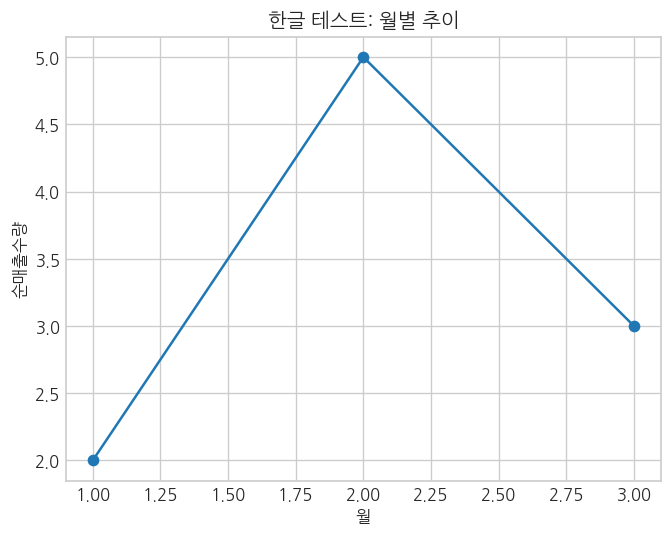

In [ ]:
# -*- coding: utf-8 -*-
# Colab 전용: 나눔/노토 폰트 설치 → Matplotlib에 전역 한글폰트 적용 → 테스트 플롯
import subprocess, sys, os, shutil, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def install_fonts_on_colab():
    # 1) apt로 한글 폰트 설치 (나눔 + 노토 CJK KR)
    cmds = [
        ["apt-get", "update", "-y"],
        ["apt-get", "install", "-y", "fonts-nanum", "fonts-noto-cjk"]
    ]
    for cmd in cmds:
        print(">>", " ".join(cmd))
        p = subprocess.run(["sudo"] + cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(p.stdout)
        if p.returncode != 0:
            print("STDERR:", p.stderr)
            raise RuntimeError(f"Command failed: {' '.join(cmd)}")

    # 2) 설치 경로 확인
    candidates = [
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansKR-Regular.otf",
    ]
    found = [p for p in candidates if os.path.exists(p) and os.path.getsize(p) > 50_000]
    if not found:
        raise FileNotFoundError("설치 후 나눔/노토 폰트 파일을 찾지 못했습니다. 경로를 확인해주세요.")
    print("✅ 설치된 폰트 파일:", found)
    return found

def register_and_set_font(font_paths):
    # 3) Matplotlib에 폰트 등록 + 캐시 리로드
    for p in font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception as e:
            print("addfont error:", e)

    # 캐시 새로고침
    try:
        fm._load_fontmanager(try_read_cache=False)  # mpl 3.6+
    except Exception:
        pass

    # 4) 실제 패밀리명 얻어서 rcParams 전역 설정
    family_names = []
    for p in font_paths:
        try:
            fam = fm.FontProperties(fname=p).get_name()
            if fam not in family_names:
                family_names.append(fam)
        except Exception:
            pass

    # 스타일이 폰트를 덮어쓰는 걸 방지: 스타일 먼저 적용 → 그 다음 폰트 지정
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        try:
            plt.style.use("seaborn-whitegrid")
        except Exception:
            pass

    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.sans-serif"] = family_names + [
        "NanumGothic", "Noto Sans CJK KR", "Apple SD Gothic Neo", "Malgun Gothic", "DejaVu Sans"
    ]
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["figure.dpi"] = 120
    mpl.rcParams["savefig.dpi"] = 320

    print("✅ 적용된 font.sans-serif =", mpl.rcParams["font.sans-serif"])

def korean_smoke_test():
    plt.figure()
    plt.plot([1,2,3],[2,5,3], marker="o")
    plt.title("한글 테스트: 월별 추이")
    plt.xlabel("월")
    plt.ylabel("순매출수량")
    plt.show()

# === 실행 순서 ===
paths = install_fonts_on_colab()
register_and_set_font(paths)
korean_smoke_test()


>> apt-get update -y
Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 133 kB in 2s (70.2 kB/s)
Reading package lists...

>> apt-get install -y fonts-nanum fonts-noto-cjk
Reading package lists...
Building dependency tree...
Reading state information...
fon

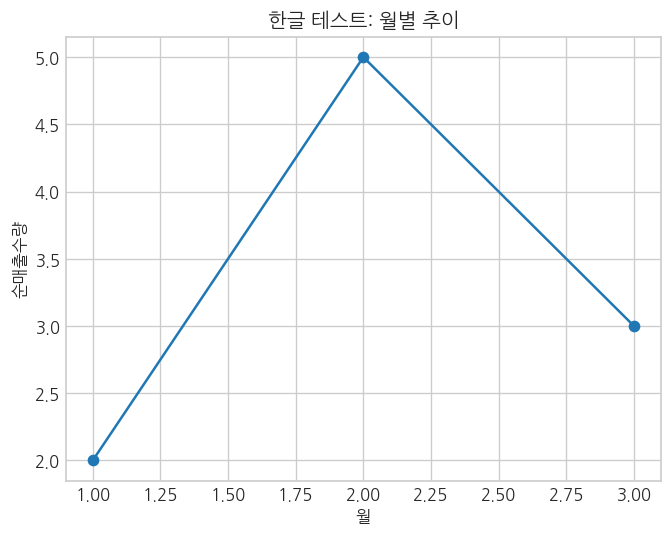

In [ ]:
# -*- coding: utf-8 -*-
# Colab 전용: 나눔/노토 폰트 설치 → Matplotlib에 전역 한글폰트 적용 → 테스트 플롯
import subprocess, sys, os, shutil, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def install_fonts_on_colab():
    # 1) apt로 한글 폰트 설치 (나눔 + 노토 CJK KR)
    cmds = [
        ["apt-get", "update", "-y"],
        ["apt-get", "install", "-y", "fonts-nanum", "fonts-noto-cjk"]
    ]
    for cmd in cmds:
        print(">>", " ".join(cmd))
        p = subprocess.run(["sudo"] + cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(p.stdout)
        if p.returncode != 0:
            print("STDERR:", p.stderr)
            raise RuntimeError(f"Command failed: {' '.join(cmd)}")

    # 2) 설치 경로 확인
    candidates = [
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansKR-Regular.otf",
    ]
    found = [p for p in candidates if os.path.exists(p) and os.path.getsize(p) > 50_000]
    if not found:
        raise FileNotFoundError("설치 후 나눔/노토 폰트 파일을 찾지 못했습니다. 경로를 확인해주세요.")
    print("✅ 설치된 폰트 파일:", found)
    return found

def register_and_set_font(font_paths):
    # 3) Matplotlib에 폰트 등록 + 캐시 리로드
    for p in font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception as e:
            print("addfont error:", e)

    # 캐시 새로고침
    try:
        fm._load_fontmanager(try_read_cache=False)  # mpl 3.6+
    except Exception:
        pass

    # 4) 실제 패밀리명 얻어서 rcParams 전역 설정
    family_names = []
    for p in font_paths:
        try:
            fam = fm.FontProperties(fname=p).get_name()
            if fam not in family_names:
                family_names.append(fam)
        except Exception:
            pass

    # 스타일이 폰트를 덮어쓰는 걸 방지: 스타일 먼저 적용 → 그 다음 폰트 지정
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        try:
            plt.style.use("seaborn-whitegrid")
        except Exception:
            pass

    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.sans-serif"] = family_names + [
        "NanumGothic", "Noto Sans CJK KR", "Apple SD Gothic Neo", "Malgun Gothic", "DejaVu Sans"
    ]
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["figure.dpi"] = 120
    mpl.rcParams["savefig.dpi"] = 320

    print("✅ 적용된 font.sans-serif =", mpl.rcParams["font.sans-serif"])

def korean_smoke_test():
    plt.figure()
    plt.plot([1,2,3],[2,5,3], marker="o")
    plt.title("한글 테스트: 월별 추이")
    plt.xlabel("월")
    plt.ylabel("순매출수량")
    plt.show()

# === 실행 순서 ===
paths = install_fonts_on_colab()
register_and_set_font(paths)
korean_smoke_test()


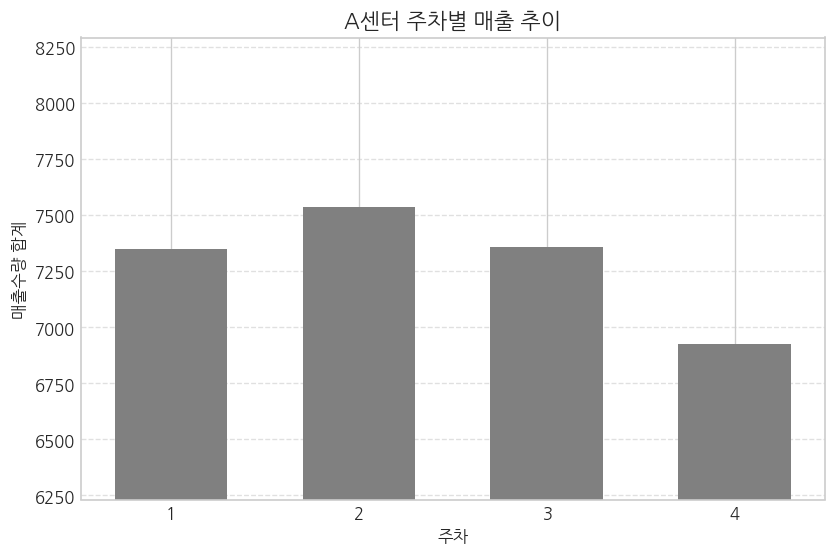

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 2021년 2월 데이터만 필터링
df_21_02 = combined[(combined['연도'] == 2021) & (combined['월'] == 2)]

# 2️⃣ 주차별 매출수량 합계 계산 (1~5주만)
weekly_sales = (
    df_21_02
    .groupby('주차', as_index=False)['매출수량']
    .sum()
)
weekly_sales = weekly_sales[(weekly_sales['주차'] >= 1) & (weekly_sales['주차'] <= 5)]
weekly_sales = weekly_sales.sort_values('주차')

# 3️⃣ 막대그래프 시각화
plt.figure(figsize=(8, 5))
plt.bar(weekly_sales['주차'], weekly_sales['매출수량'], color='gray', width=0.6)

# Y축 스케일 완화 (차이 완화 효과)
y_min = weekly_sales['매출수량'].min() * 0.9
y_max = weekly_sales['매출수량'].max() * 1.1
plt.ylim(y_min, y_max)

# X축 눈금 1~5 고정
plt.xticks([1, 2, 3, 4, ])

# 4️⃣ 그래프 스타일 설정
plt.title("A센터 주차별 매출 추이", fontsize=13)
plt.xlabel("주차")
plt.ylabel("매출수량 합계")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


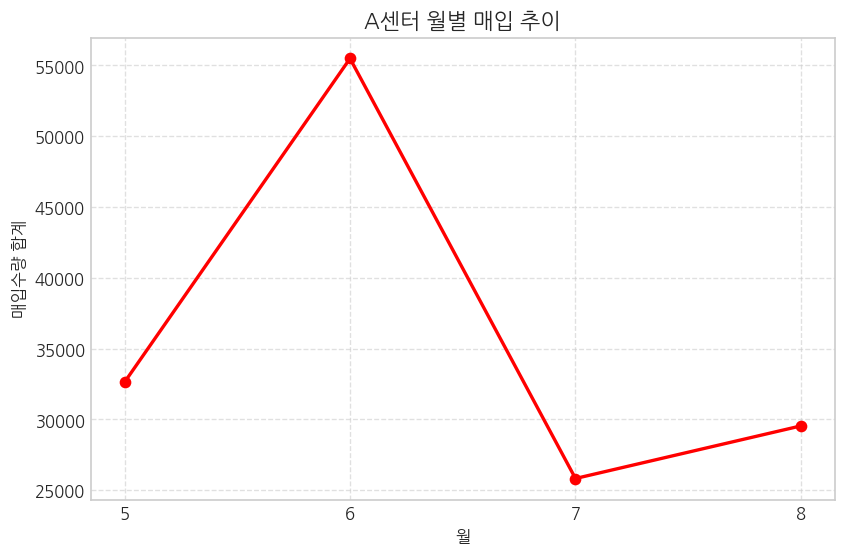

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 2023년 5~8월 데이터 필터링
df_23_summer = combined[
    (combined['연도'] == 2023) &
    (combined['월'].isin([5, 6, 7, 8]))
]

# 2️⃣ 월별 매입수량 합계 계산
monthly_buy = (
    df_23_summer
    .groupby('월', as_index=False)['매입수량']
    .sum()
    .sort_values('월')
)

# 3️⃣ 꺾은선그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(
    monthly_buy['월'],
    monthly_buy['매입수량'],
    color='red',
    marker='o',
    linewidth=2
)

# 4️⃣ 그래프 스타일 설정
plt.title("A센터 월별 매입 추이", fontsize=13)
plt.xlabel("월")
plt.ylabel("매입수량 합계")
plt.xticks([5, 6, 7, 8])
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


#지수 테이블 생성

In [ ]:
combined

,일자,구분,옵션 코드,바코드,상품명,매입수량,매출수량,중분류,공급금액,판매금액,부가세(과세),출처,연도,월,주차,풀필먼트
0,2021-01-04,매출,CS,8809274240219.000000,가야산천년수<2L>,NaN,10,"생수,음료,건강",17300,NaN,1730,매출,2021,1,1,0
1,2021-01-04,매출,CS,8809274240219.000000,가야산천년수<2L>,NaN,15,"생수,음료,건강",25900,NaN,2590,매출,2021,1,1,0
2,2021-01-04,매출,CS,8809274240219.000000,가야산천년수<2L>,NaN,6,"생수,음료,건강",10300,NaN,1030,매출,2021,1,1,0
3,2021-01-04,매출,CS,8809274240219.000000,가야산천년수<2L>,NaN,3,"생수,음료,건강",5100,NaN,510,매출,2021,1,1,0
4,2021-01-04,매출,CS,8809274240219.000000,가야산천년수<2L>,NaN,5,"생수,음료,건강",8400,NaN,840,매출,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319177,2024-12-31,매출,EA,8801066511002,하회]크라비아<90g>면세,NaN,2,신선식품,2500,NaN,250,매출,2024,12,5,1
319178,2024-12-31,매출,EA,8801066511002,하회]크라비아<90g>면세,NaN,2,신선식품,2500,NaN,250,매출,2024,12,5,1
319179,2024-12-31,매출,EA,8801066511002,하회]크라비아<90g>면세,NaN,2,신선식품,2500,NaN,250,매출,2024,12,5,1
319180,2024-12-31,매출,EA,8801066511002,하회]크라비아<90g>면세,NaN,4,신선식품,5000,NaN,500,매출,2024,12,5,1


In [ ]:
import pandas as pd

# 가정: combined 데이터프레임이 이미 존재
# 출처 컬럼 기준으로 분리
매출_df = combined[combined['출처'] == '매출'].copy()
매입_df = combined[combined['출처'] == '매입'].copy()

# 인덱스 재설정 (선택)
매출_df.reset_index(drop=True, inplace=True)
매입_df.reset_index(drop=True, inplace=True)

# 결과 확인
print("매출 데이터:", 매출_df.shape)
print("매입 데이터:", 매입_df.shape)

매출 데이터: (288402, 16)
매입 데이터: (30780, 16)


In [ ]:
import pandas as pd

# combined 데이터프레임 기준
# 구분별 출처의 고유값 확인
구분_출처_mapping = combined.groupby('구분')['출처'].unique().reset_index()

# 보기 좋게 문자열로 변환
구분_출처_mapping['출처'] = 구분_출처_mapping['출처'].apply(lambda x: ', '.join(x))

# 결과 출력
print(구분_출처_mapping)


   구분  출처
0  매출  매출
1  반출  매입
2  반품  매출
3  입고  매입


#재고회전율

In [ ]:
import pandas as pd
import numpy as np

# 1) 필요한 컬럼만 남기기
cols_to_keep = ['일자','구분','옵션 코드','매입수량','매출수량','중분류','공급금액','판매금액','부가세(과세)','출처','연도','월','주차']
combined_trimmed = combined[cols_to_keep].copy()

# 2) 2025년도 1~3월 데이터 만들기 (값은 NaN)
# 25년도 1~3월, 주차는 1~5로 가정
months_25 = [1,2,3]
weeks = [1,2,3,4,5]

# 모든 조합 생성
new_rows = []
for month in months_25:
    for week in weeks:
        new_rows.append({
            '일자': pd.NaT,
            '구분': np.nan,
            '옵션 코드': np.nan,
            '매입수량': np.nan,
            '매출수량': np.nan,
            '중분류': np.nan,
            '공급금액': np.nan,
            '판매금액': np.nan,
            '부가세(과세)': np.nan,
            '출처': np.nan,
            '연도': 2025,
            '월': month,
            '주차': week
        })

df_25 = pd.DataFrame(new_rows)

# 3) 기존 combined_trimmed + 2025년도 데이터 합치기
combined_all = pd.concat([combined_trimmed, df_25], ignore_index=True)

print(combined_all.tail(10))

        일자   구분 옵션 코드  매입수량 매출수량  중분류 공급금액  판매금액 부가세(과세)   출처    연도  월  주차
319187 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  2   1
319188 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  2   2
319189 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  2   3
319190 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  2   4
319191 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  2   5
319192 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  3   1
319193 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  3   2
319194 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  3   3
319195 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  3   4
319196 NaT  NaN   NaN   NaN  NaN  NaN  NaN   NaN     NaN  NaN  2025  3   5


In [ ]:
# 1) 중분류별 데이터프레임 분리
df_생수 = combined_all[combined_all['중분류'] == '생수,음료,건강'].copy()
df_신선식품 = combined_all[combined_all['중분류'] == '신선식품'].copy()

# 2) 월별 입고, 반출 합계 계산 준비
# 구분 컬럼 기준:
# - 입고: '입고'
# - 반출: '반출'
# - 매출: '매출' (ITR 분자용)
# - 반품: '반품' (필요 시 반영 가능)

# 생수,음료,건강 월별 입고/반출 합계
agg_생수 = df_생수.groupby(['연도','월','구분']).agg({
    '매출수량':'sum',
    '매입수량':'sum'
}).reset_index()

# 반출은 절대값 적용
agg_생수['매출수량'] = agg_생수.apply(
    lambda x: abs(x['매출수량']) if x['구분']=='반출' else x['매출수량'], axis=1
)

# 신선식품 월별 입고/반출 합계
agg_신선 = df_신선식품.groupby(['연도','월','구분']).agg({
    '매출수량':'sum',
    '매입수량':'sum'
}).reset_index()

agg_신선['매출수량'] = agg_신선.apply(
    lambda x: abs(x['매출수량']) if x['구분']=='반출' else x['매출수량'], axis=1
)

# 확인
print("생수,음료,건강 월별 집계")
print(agg_생수.head(10))
print("\n신선식품 월별 집계")
print(agg_신선.head(10))


생수,음료,건강 월별 집계
     연도  월  구분   매출수량         매입수량
0  2021  1  매출  22680     0.000000
1  2021  1  반출      0   -99.000000
2  2021  1  반품   -743     0.000000
3  2021  1  입고      0  8794.000000
4  2021  2  매출  28856     0.000000
5  2021  2  반출      0  -201.000000
6  2021  2  반품   -206     0.000000
7  2021  2  입고      0 11330.000000
8  2021  3  매출  29943     0.000000
9  2021  3  반출      0 -1125.000000

신선식품 월별 집계
     연도  월  구분  매출수량        매입수량
0  2021  1  매출   643    0.000000
1  2021  1  반출     0 -138.000000
2  2021  1  반품   -15    0.000000
3  2021  1  입고     0  655.000000
4  2021  2  매출   527    0.000000
5  2021  2  반출     0  -10.000000
6  2021  2  반품    -8    0.000000
7  2021  2  입고     0  514.000000
8  2021  3  매출  1921    0.000000
9  2021  3  반출     0 -255.000000


In [ ]:
# -------------------------------
# 1) 생수,음료,건강 ITR 계산
# -------------------------------

# 월별 입고 합계
입고_합_생수 = agg_생수[agg_생수['구분']=='입고'].groupby(['연도','월'])['매입수량'].sum().reset_index(name='입고합')
# 월별 반출 합계 (절대값)
반출_합_생수 = agg_생수[agg_생수['구분']=='반출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='반출합')
# 월별 매출 합계 (ITR 분자)
매출_합_생수 = agg_생수[agg_생수['구분']=='매출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='매출합')

# 3) 합치기
itr_생수 = pd.merge(매출_합_생수, 입고_합_생수, on=['연도','월'], how='left')
itr_생수 = pd.merge(itr_생수, 반출_합_생수, on=['연도','월'], how='left')

# 4) 평균재고 계산
itr_생수['평균재고'] = (itr_생수['입고합'] - itr_생수['반출합']) / 2

# 5) ITR 계산
itr_생수['ITR'] = itr_생수['매출합'] / itr_생수['평균재고']

# 6) 결과 확인
print("생수,음료,건강 ITR")
print(itr_생수)


생수,음료,건강 ITR
      연도   월    매출합          입고합  반출합         평균재고      ITR
0   2021   1  22680  8794.000000    0  4397.000000 5.158062
1   2021   2  28856 11330.000000    0  5665.000000 5.093733
2   2021   3  29943 18936.000000    0  9468.000000 3.162548
3   2021   4  30574 16019.000000    0  8009.500000 3.817217
4   2021   5  38328 17707.000000    0  8853.500000 4.329135
5   2021   6  43980 20598.000000    0 10299.000000 4.270318
6   2021   7  44450 20884.000000    0 10442.000000 4.256847
7   2021   8  38531 21104.000000    0 10552.000000 3.651535
8   2021   9  29594 16765.000000    0  8382.500000 3.530450
9   2021  10  40952 14974.000000    0  7487.000000 5.469748
10  2021  11  39583 12400.000000    0  6200.000000 6.384355
11  2021  12  39661 12880.000000    0  6440.000000 6.158540
12  2022   1  42025 12694.000000    0  6347.000000 6.621238
13  2022   2  33886 13129.000000    0  6564.500000 5.162008
14  2022   3  40987 15317.000000    0  7658.500000 5.351831
15  2022   4  55377 18444.0

In [ ]:
# -------------------------------
# 2) 신선식품 ITR 계산
# -------------------------------

입고_합_신선 = agg_신선[agg_신선['구분']=='입고'].groupby(['연도','월'])['매입수량'].sum().reset_index(name='입고합')
반출_합_신선 = agg_신선[agg_신선['구분']=='반출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='반출합')
매출_합_신선 = agg_신선[agg_신선['구분']=='매출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='매출합')

itr_신선 = pd.merge(매출_합_신선, 입고_합_신선, on=['연도','월'], how='left')
itr_신선 = pd.merge(itr_신선, 반출_합_신선, on=['연도','월'], how='left')

itr_신선['평균재고'] = (itr_신선['입고합'] - itr_신선['반출합']) / 2
itr_신선['ITR'] = itr_신선['매출합'] / itr_신선['평균재고']

print("\n신선식품 ITR")
print(itr_신선)


신선식품 ITR
      연도   월   매출합         입고합  반출합        평균재고      ITR
0   2021   1   643  655.000000    0  327.500000 1.963359
1   2021   2   527  514.000000    0  257.000000 2.050584
2   2021   3  1921 5696.000000    0 2848.000000 0.674508
3   2021   4  2083 2031.000000    0 1015.500000 2.051206
4   2021   5  2088 2030.000000    0 1015.000000 2.057143
5   2021   6  2463 2760.000000    0 1380.000000 1.784783
6   2021   7  3302 3627.000000    0 1813.500000 1.820789
7   2021   8  3084 3685.000000    0 1842.500000 1.673813
8   2021   9  2471 2211.000000    0 1105.500000 2.235188
9   2021  10  2055 2215.000000    0 1107.500000 1.855530
10  2021  11  1682 1843.000000    0  921.500000 1.825285
11  2021  12  2065 2044.000000    0 1022.000000 2.020548
12  2022   1  2181 2152.000000    0 1076.000000 2.026952
13  2022   2  1306 1348.000000    0  674.000000 1.937685
14  2022   3  1636 2335.000000    0 1167.500000 1.401285
15  2022   4  1818 1712.000000    0  856.000000 2.123832
16  2022   5  2165 30

In [ ]:
# -------------------------------
# 1) 생수,음료,건강 2025년도 ITR 포함
# -------------------------------

# 2025년도 1~3월 기본 프레임
months_25 = [1,2,3]
df_25_생수 = pd.DataFrame({'연도':2025, '월':months_25})
# 평균재고, 매출합, 입고합, 반출합은 NaN
df_25_생수['매출합'] = np.nan
df_25_생수['입고합'] = np.nan
df_25_생수['반출합'] = np.nan
df_25_생수['평균재고'] = np.nan
df_25_생수['ITR'] = np.nan

# 기존 itr_생수와 합치기
itr_생수_full = pd.concat([itr_생수, df_25_생수], ignore_index=True)
itr_생수_full = itr_생수_full.sort_values(['연도','월']).reset_index(drop=True)

# -------------------------------
# 2) 신선식품 2025년도 ITR 포함
# -------------------------------

df_25_신선 = pd.DataFrame({'연도':2025, '월':months_25})
df_25_신선['매출합'] = np.nan
df_25_신선['입고합'] = np.nan
df_25_신선['반출합'] = np.nan
df_25_신선['평균재고'] = np.nan
df_25_신선['ITR'] = np.nan

itr_신선_full = pd.concat([itr_신선, df_25_신선], ignore_index=True)
itr_신선_full = itr_신선_full.sort_values(['연도','월']).reset_index(drop=True)

# -------------------------------
# 3) 결과 확인
# -------------------------------
print("생수,음료,건강 ITR (2021~2025)")
print(itr_생수_full.tail(10))
print("\n신선식품 ITR (2021~2025)")
print(itr_신선_full.tail(10))



생수,음료,건강 ITR (2021~2025)
      연도   월          매출합          입고합      반출합         평균재고      ITR
41  2024   6 47698.000000 43028.000000 0.000000 21514.000000 2.217068
42  2024   7 44255.000000 35002.000000 0.000000 17501.000000 2.528713
43  2024   8 44127.000000 38219.000000 0.000000 19109.500000 2.309166
44  2024   9 38350.000000 45910.000000 0.000000 22955.000000 1.670660
45  2024  10 32926.000000 32034.000000 0.000000 16017.000000 2.055691
46  2024  11 29595.000000 19669.000000 0.000000  9834.500000 3.009304
47  2024  12 26683.000000 14059.000000 0.000000  7029.500000 3.795860
48  2025   1          NaN          NaN      NaN          NaN      NaN
49  2025   2          NaN          NaN      NaN          NaN      NaN
50  2025   3          NaN          NaN      NaN          NaN      NaN

신선식품 ITR (2021~2025)
      연도   월         매출합         입고합      반출합        평균재고      ITR
41  2024   6 3054.000000 3076.000000 0.000000 1538.000000 1.985696
42  2024   7 6243.000000 5867.000000 0.000000 293

In [ ]:
def calculate_ITR(df, 중분류_name):
    """
    df: combined_all 데이터프레임 (바코드, 상품명, 풀필먼트 제외 상태)
    중분류_name: '생수,음료,건강' 또는 '신선식품'

    반환: 월별 ITR 계산 데이터프레임
    """
    import pandas as pd
    import numpy as np

    # 1) 중분류 필터링
    df_sub = df[df['중분류']==중분류_name].copy()

    # 2) 월별 집계
    agg = df_sub.groupby(['연도','월','구분']).agg({
        '매출수량':'sum',
        '매입수량':'sum'
    }).reset_index()

    # 3) 반출 절대값 처리
    agg['매출수량'] = agg.apply(lambda x: abs(x['매출수량']) if x['구분']=='반출' else x['매출수량'], axis=1)

    # 4) 입고합, 반출합, 매출합 계산
    입고 = agg[agg['구분']=='입고'].groupby(['연도','월'])['매입수량'].sum().reset_index(name='입고합')
    반출 = agg[agg['구분']=='반출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='반출합')
    매출 = agg[agg['구분']=='매출'].groupby(['연도','월'])['매출수량'].sum().reset_index(name='매출합')

    # 5) 합치기
    itr_df = pd.merge(매출, 입고, on=['연도','월'], how='left')
    itr_df = pd.merge(itr_df, 반출, on=['연도','월'], how='left')

    # 6) 평균재고 계산
    itr_df['평균재고'] = (itr_df['입고합'] - itr_df['반출합']) / 2

    # 7) ITR 계산
    itr_df['ITR'] = itr_df['매출합'] / itr_df['평균재고']

    # 8) 2025년도 1~3월 NaN 포함
    months_25 = [1,2,3]
    df_25 = pd.DataFrame({'연도':2025, '월':months_25})
    df_25['매출합'] = np.nan
    df_25['입고합'] = np.nan
    df_25['반출합'] = np.nan
    df_25['평균재고'] = np.nan
    df_25['ITR'] = np.nan

    itr_df = pd.concat([itr_df, df_25], ignore_index=True)
    itr_df = itr_df.sort_values(['연도','월']).reset_index(drop=True)

    return itr_df


In [ ]:
itr_생수_full = calculate_ITR(combined_all, '생수,음료,건강')
itr_신선_full = calculate_ITR(combined_all, '신선식품')

print(itr_생수_full.tail(10))
print(itr_신선_full.tail(10))


      연도   월          매출합          입고합      반출합         평균재고      ITR
41  2024   6 47698.000000 43028.000000 0.000000 21514.000000 2.217068
42  2024   7 44255.000000 35002.000000 0.000000 17501.000000 2.528713
43  2024   8 44127.000000 38219.000000 0.000000 19109.500000 2.309166
44  2024   9 38350.000000 45910.000000 0.000000 22955.000000 1.670660
45  2024  10 32926.000000 32034.000000 0.000000 16017.000000 2.055691
46  2024  11 29595.000000 19669.000000 0.000000  9834.500000 3.009304
47  2024  12 26683.000000 14059.000000 0.000000  7029.500000 3.795860
48  2025   1          NaN          NaN      NaN          NaN      NaN
49  2025   2          NaN          NaN      NaN          NaN      NaN
50  2025   3          NaN          NaN      NaN          NaN      NaN
      연도   월         매출합         입고합      반출합        평균재고      ITR
41  2024   6 3054.000000 3076.000000 0.000000 1538.000000 1.985696
42  2024   7 6243.000000 5867.000000 0.000000 2933.500000 2.128175
43  2024   8 6669.000000 4323

#EOQ

In [ ]:
import pandas as pd
import numpy as np

# 1) combined 안전하게 복사
df = combined.copy()

# 2) 불필요 컬럼 제거: 바코드, 상품명, 풀필먼트
df = df.drop(columns=['바코드','상품명','풀필먼트'])

# 3) 제거 후 확인
print(df.head())
print(df.columns)



          일자  구분 옵션 코드  매입수량 매출수량       중분류   공급금액  판매금액 부가세(과세)  출처    연도  월  \
0 2021-01-04  매출    CS   NaN   10  생수,음료,건강  17300   NaN    1730  매출  2021  1   
1 2021-01-04  매출    CS   NaN   15  생수,음료,건강  25900   NaN    2590  매출  2021  1   
2 2021-01-04  매출    CS   NaN    6  생수,음료,건강  10300   NaN    1030  매출  2021  1   
3 2021-01-04  매출    CS   NaN    3  생수,음료,건강   5100   NaN     510  매출  2021  1   
4 2021-01-04  매출    CS   NaN    5  생수,음료,건강   8400   NaN     840  매출  2021  1   

   주차  
0   1  
1   1  
2   1  
3   1  
4   1  
Index(['일자', '구분', '옵션 코드', '매입수량', '매출수량', '중분류', '공급금액', '판매금액', '부가세(과세)',
       '출처', '연도', '월', '주차'],
      dtype='object')


In [ ]:
# 25년도 1~3월 데이터 생성
years = [2025]
months = [1, 2, 3]

# 기존 df의 컬럼 중 연도, 월, 주차만 유지, 나머지는 NaN
cols_to_keep = ['연도', '월', '주차']
other_cols = [col for col in df.columns if col not in cols_to_keep]

# 주차는 1~5주로 생성 (대략)
weeks = [1,2,3,4,5]

# 25년도 모든 조합 만들기
data_25 = []
for y in years:
    for m in months:
        for w in weeks:
            row = {col: np.nan for col in other_cols}  # 나머지 NaN
            row.update({'연도': y, '월': m, '주차': w})
            data_25.append(row)

df_25 = pd.DataFrame(data_25)

# 25년도 데이터 확인
print(df_25)


    일자  구분  옵션 코드  매입수량  매출수량  중분류  공급금액  판매금액  부가세(과세)  출처    연도  월  주차
0  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  1   1
1  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  1   2
2  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  1   3
3  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  1   4
4  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  1   5
5  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  2   1
6  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  2   2
7  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  2   3
8  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  2   4
9  NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  2   5
10 NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  3   1
11 NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN      NaN NaN  2025  3   2
12 NaN NaN    NaN   NaN   NaN  NaN   NaN   NaN     

In [ ]:
# 기존 데이터 + 25년도 데이터 합치기
df_full = pd.concat([df, df_25], ignore_index=True)

# NaN이 있는 25년도 데이터는 중분류도 NaN, 필요 시 임시로 값 넣기
# 일단 기존 중분류 값 기준으로 분리
df_health = df_full[df_full['중분류'] == '생수,음료,건강'].copy()
df_fresh = df_full[df_full['중분류'] == '신선식품'].copy()

# 확인
print("생수,음료,건강 데이터 shape:", df_health.shape)
print("신선식품 데이터 shape:", df_fresh.shape)



/tmp/ipython-input-4078924392.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full = pd.concat([df, df_25], ignore_index=True)


생수,음료,건강 데이터 shape: (271821, 13)
신선식품 데이터 shape: (47361, 13)


In [ ]:
# 순단가 계산: 공급금액 / 매출수량
# 매출수량이 0 또는 NaN이면 NaN 처리
for df_sub in [df_health, df_fresh]:
    df_sub['순단가'] = df_sub.apply(
        lambda x: x['공급금액']/x['매출수량'] if pd.notna(x['공급금액']) and x['매출수량'] > 0 else np.nan,
        axis=1
    )

    # 보유율 계산
    def 보유율(row):
        if row['연도'] in [2021,2022]:
            return 0.193
        elif row['연도'] in [2023,2024]:
            return 0.188
        elif row['연도'] == 2025:
            return (0.193+0.188)/2
        else:
            return np.nan

    df_sub['보유율'] = df_sub.apply(보유율, axis=1)

# 확인
print(df_health[['연도','순단가','보유율','매출수량','공급금액']].head(10))
print(df_fresh[['연도','순단가','보유율','매출수량','공급금액']].head(10))


     연도         순단가      보유율 매출수량    공급금액
0  2021 1730.000000 0.193000   10   17300
1  2021 1726.666667 0.193000   15   25900
2  2021 1716.666667 0.193000    6   10300
3  2021 1700.000000 0.193000    3    5100
4  2021 1680.000000 0.193000    5    8400
5  2021 1683.333333 0.193000    6   10100
6  2021 1690.000000 0.193000   10   16900
7  2021 1680.000000 0.193000    5    8400
8  2021 1698.750000 0.193000  160  271800
9  2021 1680.000000 0.193000    5    8400
       연도          순단가      보유율 매출수량   공급금액
277  2021  6780.000000 0.193000    5  33900
278  2021 15100.000000 0.193000    1  15100
279  2021  3650.000000 0.193000    2   7300
280  2021  3650.000000 0.193000    2   7300
281  2021  3650.000000 0.193000    2   7300
282  2021 21900.000000 0.193000    1  21900
283  2021  4100.000000 0.193000    3  12300
284  2021  4483.333333 0.193000    6  26900
285  2021  4116.666667 0.193000    6  24700
286  2021 14200.000000 0.193000    1  14200


In [ ]:
import calendar

def calculate_D(df_sub):
    # 구분이 매출 또는 반출인 데이터만 사용
    df_filtered = df_sub[df_sub['구분'].isin(['매출','반출'])].copy()

    # 일자 컬럼이 datetime 형식인지 확인
    if not np.issubdtype(df_filtered['일자'].dtype, np.datetime64):
        df_filtered['일자'] = pd.to_datetime(df_filtered['일자'])

    # 월별 관측일수 계산
    df_filtered['일수'] = df_filtered['일자'].dt.day  # 나중에 unique count로 월 일수 확인
    D_list = []

    # 연도, 월 기준 그룹
    grouped = df_filtered.groupby(['연도','월'])
    for (year, month), group in grouped:
        # 해당 월 관측일수 = unique 일자 수
        관측일수 = group['일자'].nunique()

        # 월간 수량 합계(절대값)
        월합계 = group['매출수량'].abs().sum()

        # D 계산: 월합계 * (365 / 관측일수)
        D = 월합계 * (365 / 관측일수) if 관측일수 > 0 else np.nan

        D_list.append({'연도': year, '월': month, 'D': D})

    return pd.DataFrame(D_list)

# 계산 적용
D_health = calculate_D(df_health)
D_fresh = calculate_D(df_fresh)

# 확인
print(D_health.head())
print(D_fresh.head())


     연도  월             D
0  2021  1 413910.000000
1  2021  2 585135.555556
2  2021  3 475182.391304
3  2021  4 507250.454545
4  2021  5 666177.142857
     연도  월            D
0  2021  1 11734.750000
1  2021  2 10686.388889
2  2021  3 30485.434783
3  2021  4 34558.863636
4  2021  5 36291.428571


In [ ]:
import numpy as np

S = 15000  # 고정 발주비용

def calculate_EOQ(df_sub, D_df):
    # 연도-월 기준으로 D 합치기
    df = df_sub.copy()
    df = df.merge(D_df, on=['연도','월'], how='left')

    # H 계산: 순단가 * 보유율
    df['H'] = df['순단가'] * df['보유율']

    # EOQ 계산: sqrt(2DS/H)
    # H가 0이나 NaN인 경우 NaN 처리
    df['EOQ'] = df.apply(lambda x: np.sqrt(2*S*x['D']/x['H']) if pd.notna(x['D']) and pd.notna(x['H']) and x['H']>0 else np.nan, axis=1)

    return df

# 적용
df_health_EOQ = calculate_EOQ(df_health, D_health)
df_fresh_EOQ = calculate_EOQ(df_fresh, D_fresh)

# 확인
print(df_health_EOQ[['연도','월','D','순단가','보유율','H','EOQ']].head(10))
print(df_fresh_EOQ[['연도','월','D','순단가','보유율','H','EOQ']].head(10))



     연도  월             D         순단가      보유율          H         EOQ
0  2021  1 413910.000000 1730.000000 0.193000 333.890000 6098.343467
1  2021  1 413910.000000 1726.666667 0.193000 333.246667 6104.227061
2  2021  1 413910.000000 1716.666667 0.193000 331.316667 6121.980546
3  2021  1 413910.000000 1700.000000 0.193000 328.100000 6151.917060
4  2021  1 413910.000000 1680.000000 0.193000 324.240000 6188.427274
5  2021  1 413910.000000 1683.333333 0.193000 324.883333 6182.297082
6  2021  1 413910.000000 1690.000000 0.193000 326.170000 6170.091153
7  2021  1 413910.000000 1680.000000 0.193000 324.240000 6188.427274
8  2021  1 413910.000000 1698.750000 0.193000 327.858750 6154.180042
9  2021  1 413910.000000 1680.000000 0.193000 324.240000 6188.427274
     연도  월            D          순단가      보유율           H        EOQ
0  2021  1 11734.750000  6780.000000 0.193000 1308.540000 518.685428
1  2021  1 11734.750000 15100.000000 0.193000 2914.300000 347.560505
2  2021  1 11734.750000  3650.0000

In [ ]:
df_health_EOQ.groupby(['연도','월'])['EOQ'].mean()
df_fresh_EOQ.groupby(['연도','월'])['EOQ'].mean()


연도    월 
2021  1     531.134078
      2     563.190566
      3    1523.083672
      4    1646.095349
      5    1614.585541
      6    1703.002539
      7    1899.153422
      8    1789.332079
      9    1812.204705
      10   1634.260788
      11   1495.148102
      12   1586.367222
2022  1    1598.008411
      2    1453.113906
      3    1464.343569
      4    1477.592532
      5    1476.958047
      6    1538.495292
      7    1549.139493
      8    1605.140727
      9    1326.659100
      10   1144.387420
      11   1196.979778
      12   1298.836723
2023  1    1283.655354
      2    1200.919444
      3    1202.357517
      4    1204.939088
      5    1350.490479
      6    1586.643696
      7    1628.838115
      8    1595.830858
      9    1551.011861
      10   1492.230841
      11   1341.573090
      12   1530.941231
2024  1    1943.157716
      2    2220.207706
      3    2101.745991
      4    1955.488595
      5    1993.929293
      6    1845.720838
      7    2326.654897
      8    2543.561998
      9    2383.490506
      10   2482.255048
      11   2367.728248
      12   2278.233411
Name: EOQ, dtype: float64

In [ ]:
# 생수,음료,건강 월별 EOQ 평균
EOQ_health_summary = df_health_EOQ.groupby(['연도','월'])['EOQ'].mean().reset_index()
EOQ_health_summary['중분류'] = '생수,음료,건강'

# 신선식품 월별 EOQ 평균
EOQ_fresh_summary = df_fresh_EOQ.groupby(['연도','월'])['EOQ'].mean().reset_index()
EOQ_fresh_summary['중분류'] = '신선식품'

# 두 개 합치기
EOQ_summary = pd.concat([EOQ_health_summary, EOQ_fresh_summary], ignore_index=True)

# 25년도 1~3월 포함 (이미 NaN 상태)
years_25 = [2025]
months_25 = [1,2,3]
for mid in ['생수,음료,건강','신선식품']:
    for y in years_25:
        for m in months_25:
            if not ((EOQ_summary['연도']==y) & (EOQ_summary['월']==m) & (EOQ_summary['중분류']==mid)).any():
                EOQ_summary = pd.concat([EOQ_summary, pd.DataFrame({'연도':[y],'월':[m],'EOQ':[np.nan],'중분류':[mid]})], ignore_index=True)

# 확인
EOQ_summary.sort_values(['중분류','연도','월'], inplace=True)
print(EOQ_summary)


       연도   월         EOQ       중분류
0    2021   1 3532.060644  생수,음료,건강
1    2021   2 4334.335313  생수,음료,건강
2    2021   3 3891.325582  생수,음료,건강
3    2021   4 3853.174395  생수,음료,건강
4    2021   5 4695.896313  생수,음료,건강
..    ...  ..         ...       ...
94   2024  11 2367.728248      신선식품
95   2024  12 2278.233411      신선식품
99   2025   1         NaN      신선식품
100  2025   2         NaN      신선식품
101  2025   3         NaN      신선식품

[102 rows x 4 columns]


#ROP

###리드타임 테이블 형성

In [ ]:
import pandas as pd

# combined 예시
combined["일자"] = pd.to_datetime(combined["일자"])

# 입고/반출 데이터만 추출
in_data = combined[combined["구분"] == "입고"].copy()
out_data = combined[combined["구분"] == "반출"].copy()

# 옵션 코드, 중분류별로 매칭
lead_times = []

for opt in combined["옵션 코드"].unique():
    for cat in combined["중분류"].unique():
        # 해당 옵션+중분류
        in_dates = in_data[(in_data["옵션 코드"]==opt) & (in_data["중분류"]==cat)]["일자"].sort_values().tolist()
        out_dates = out_data[(out_data["옵션 코드"]==opt) & (out_data["중분류"]==cat)]["일자"].sort_values().tolist()

        for out_date in out_dates:
            # 과거 입고일 중 가장 최근
            past_in_dates = [d for d in in_dates if d <= out_date]
            if past_in_dates:
                in_date = max(past_in_dates)
                lead_time = abs((out_date - in_date).days)  # 절대값 사용
                lead_times.append({
                    "옵션 코드": opt,
                    "중분류": cat,
                    "반출일": out_date,
                    "입고일": in_date,
                    "lead_time": lead_time,
                    "연도": out_date.year,
                    "월": out_date.month
                })
            else:
                lead_times.append({
                    "옵션 코드": opt,
                    "중분류": cat,
                    "반출일": out_date,
                    "입고일": None,
                    "lead_time": None,
                    "연도": out_date.year,
                    "월": out_date.month
                })

lead_time_df = pd.DataFrame(lead_times)

# 확인
print(lead_time_df.head(50))
print(lead_time_df["lead_time"].describe())


   옵션 코드       중분류        반출일        입고일  lead_time    연도   월
0     CS  생수,음료,건강 2021-02-10 2021-02-09   1.000000  2021   2
1     CS  생수,음료,건강 2021-03-17 2021-03-17   0.000000  2021   3
2     CS  생수,음료,건강 2021-03-22 2021-03-19   3.000000  2021   3
3     CS  생수,음료,건강 2021-04-23 2021-04-23   0.000000  2021   4
4     CS  생수,음료,건강 2021-04-27 2021-04-23   4.000000  2021   4
5     CS  생수,음료,건강 2021-05-10 2021-05-10   0.000000  2021   5
6     CS  생수,음료,건강 2021-05-21 2021-05-21   0.000000  2021   5
7     CS  생수,음료,건강 2021-05-26 2021-05-25   1.000000  2021   5
8     CS  생수,음료,건강 2021-06-07 2021-06-07   0.000000  2021   6
9     CS  생수,음료,건강 2021-06-07 2021-06-07   0.000000  2021   6
10    CS  생수,음료,건강 2021-06-09 2021-06-09   0.000000  2021   6
11    CS  생수,음료,건강 2021-06-10 2021-06-10   0.000000  2021   6
12    CS  생수,음료,건강 2021-06-25 2021-06-25   0.000000  2021   6
13    CS  생수,음료,건강 2021-07-13 2021-07-13   0.000000  2021   7
14    CS  생수,음료,건강 2021-07-22 2021-07-22   0.000000  2021   7
15    CS

In [ ]:
# 1) 0일 이상이 아니라, 실제로 간격이 있는 것만 필터링
valid_lead_time_df = lead_time_df[lead_time_df["lead_time"] > 0].copy()

# 2) 옵션 코드 + 중분류 + 연도별 평균 리드타임
avg_lead_time = (
    valid_lead_time_df
    .groupby(["옵션 코드", "중분류", "연도"])["lead_time"]
    .mean()
    .reset_index()
)

# 3) 전체 평균만 보고 싶으면 이렇게
overall_avg = valid_lead_time_df["lead_time"].mean()

print("📌 연도/옵션코드/중분류별 평균 리드타임")
print(avg_lead_time.head(20))

print("\n📌 전체 평균 리드타임(0일 제외):", overall_avg)


📌 연도/옵션코드/중분류별 평균 리드타임
   옵션 코드       중분류    연도  lead_time
0    BOX  생수,음료,건강  2023  19.000000
1    BOX  생수,음료,건강  2024  26.000000
2     BX  생수,음료,건강  2021   1.000000
3     BX  생수,음료,건강  2022   1.000000
4     BX  생수,음료,건강  2023   3.000000
5     BX  생수,음료,건강  2024   1.000000
6     BX      신선식품  2022  19.000000
7     BX      신선식품  2024   1.000000
8     CS  생수,음료,건강  2021   3.166667
9     CS  생수,음료,건강  2022   1.000000
10    CS  생수,음료,건강  2024   2.888889
11    CS      신선식품  2022  31.000000
12    EA  생수,음료,건강  2021   9.549419
13    EA  생수,음료,건강  2022   3.007968
14    EA  생수,음료,건강  2023   3.068182
15    EA  생수,음료,건강  2024   1.075472
16    EA      신선식품  2021   1.444444
17    EA      신선식품  2022   4.271845
18    EA      신선식품  2023   1.000000
19    EA      신선식품  2024   1.000000

📌 전체 평균 리드타임(0일 제외): 5.2015281757402105


In [ ]:
# 남길 컬럼 정의
keep_cols = ["구분", "연도", "월", "주차", "옵션 코드", "중분류", "판매금액", "부가세(과세)", "매입수량", "매출수량"]

# 필요한 컬럼만 선택
combined_filtered = combined[keep_cols].copy()

# 확인
print(combined_filtered.head())
print(combined_filtered.shape)


   구분    연도  월  주차 옵션 코드       중분류  판매금액 부가세(과세)  매입수량 매출수량
0  매출  2021  1   1    CS  생수,음료,건강   NaN    1730   NaN   10
1  매출  2021  1   1    CS  생수,음료,건강   NaN    2590   NaN   15
2  매출  2021  1   1    CS  생수,음료,건강   NaN    1030   NaN    6
3  매출  2021  1   1    CS  생수,음료,건강   NaN     510   NaN    3
4  매출  2021  1   1    CS  생수,음료,건강   NaN     840   NaN    5
(319182, 10)


In [ ]:
combined_filtered

,구분,연도,월,주차,옵션 코드,중분류,판매금액,부가세(과세),매입수량,매출수량
0,매출,2021,1,1,CS,"생수,음료,건강",NaN,1730,NaN,10
1,매출,2021,1,1,CS,"생수,음료,건강",NaN,2590,NaN,15
2,매출,2021,1,1,CS,"생수,음료,건강",NaN,1030,NaN,6
3,매출,2021,1,1,CS,"생수,음료,건강",NaN,510,NaN,3
4,매출,2021,1,1,CS,"생수,음료,건강",NaN,840,NaN,5
...,...,...,...,...,...,...,...,...,...,...
319177,매출,2024,12,5,EA,신선식품,NaN,250,NaN,2
319178,매출,2024,12,5,EA,신선식품,NaN,250,NaN,2
319179,매출,2024,12,5,EA,신선식품,NaN,250,NaN,2
319180,매출,2024,12,5,EA,신선식품,NaN,500,NaN,4


In [ ]:
# ===== ROP(월·옵션코드 리드타임 반영) + ITR + EOQ 한 셀 =====
import pandas as pd
import numpy as np

# ---------------------------------------------
# 0) 준비: 원본/타 테이블 정리
#    - combined, itr_생수_full, itr_신선_full, EOQ_summary, lead_time_df 가 이미 존재한다고 가정
# ---------------------------------------------
df = combined.drop(columns=['바코드','상품명','풀필먼트']).copy()
df['일자'] = pd.to_datetime(df['일자'], errors='coerce')

# 2025 Q1 placeholder(주차 1~5)
placeholder_25 = []
for m in [1,2,3]:
    for w in range(1,6):
        placeholder_25.append({
            '연도': 2025, '월': m, '주차': w, '일자': pd.NaT,
            '구분': np.nan, '옵션 코드': np.nan,
            '매입수량': np.nan, '매출수량': np.nan,
            '중분류': np.nan, '공급금액': np.nan,
            '판매금액': np.nan, '부가세(과세)': np.nan, '출처': np.nan
        })
df_full = pd.concat([df, pd.DataFrame(placeholder_25)], ignore_index=True)

df_beverage = df_full[df_full['중분류']=='생수,음료,건강'].copy()
df_fresh    = df_full[df_full['중분류']=='신선식품'].copy()

# ---------------------------------------------
# 1) 네가 만든 리드타임 결과에서 월·옵션코드 평균 L 만들기
#    - lead_time > 0 인 것만 사용
# ---------------------------------------------
valid_lead_time_df = lead_time_df[lead_time_df['lead_time'] > 0].copy()

monthly_L = (
    valid_lead_time_df
      .groupby(['연도','월','옵션 코드','중분류'], as_index=False)['lead_time']
      .agg(L_mean='mean', L_std='std')   # 평균 L, 표준편차(안전재고에 사용)
)

# 빠른 lookup을 위해 인덱스화
monthly_L_idx = monthly_L.set_index(['연도','월','옵션 코드','중분류'])

# ---------------------------------------------
# 2) ROP 계산 (옵션코드×월×중분류)
#    - L: 위 monthly_L에서 가져오고, 없으면 입고 간격 평균으로 대체
#    - d: (출처=='매입') 일자별 평균 매입량의 평균  (기존 방식 유지)
#    - SS: Z * sqrt(L*sigma_d^2 + d^2*sigma_L^2), Z=1.65
# ---------------------------------------------
def calculate_rop_by_month(group):
    # key
    y  = int(group['연도'].iloc[0])
    m  = int(group['월'].iloc[0])
    op = group['옵션 코드'].iloc[0]
    cat= group['중분류'].iloc[0]

    # 25년 placeholder 제외한 과거만 사용
    hist = group[group['연도'] != 2025].copy()

    # d 계산: 출처==매입, 일자별 평균 후 평균
    d_per_day = (
        hist[hist['출처']=='매입']
        .groupby('일자', dropna=True)['매입수량']
        .apply(lambda x: np.abs(x).sum()/len(x))
    )
    d = d_per_day.mean() if not d_per_day.empty else 0.0
    sigma_d = d_per_day.std() if not d_per_day.empty else 0.0

    # L: 리드타임 테이블에서 우선 조회
    try:
        L_mean = monthly_L_idx.loc[(y, m, op, cat), 'L_mean']
        L_std  = monthly_L_idx.loc[(y, m, op, cat), 'L_std']
        L = float(L_mean) if pd.notna(L_mean) else np.nan
        sigma_L = float(L_std) if pd.notna(L_std) else np.nan
    except KeyError:
        L = np.nan
        sigma_L = np.nan

    # fallback: 월 내 '입고' 간격 평균
    if pd.isna(L):
        in_data = hist[hist['구분']=='입고'].sort_values('일자')
        L = in_data['일자'].diff().dt.days.abs().mean() if len(in_data) > 1 else 0.0
    if pd.isna(sigma_L):
        sigma_L = L  # 정보 없으면 보수적으로 L 사용

    Z = 1.65
    SS = Z * np.sqrt(max(L,0)*(sigma_d**2) + (d**2)*(sigma_L**2))
    ROP = d*max(L,0) + SS

    return pd.Series({'d': d, 'L': L, 'SS': SS, 'ROP': ROP})

# 21~24년 옵션코드×월×중분류 ROP
rop_beverage_monthly = (
    df_beverage[df_beverage['연도'] < 2025]
    .groupby(['연도','월','옵션 코드','중분류'])
    .apply(calculate_rop_by_month)
    .reset_index()
)
rop_fresh_monthly = (
    df_fresh[df_fresh['연도'] < 2025]
    .groupby(['연도','월','옵션 코드','중분류'])
    .apply(calculate_rop_by_month)
    .reset_index()
)

# 25년 placeholder에 위 결과 매핑
df_25_bev = df_beverage[df_beverage['연도']==2025].copy()
df_25_fr  = df_fresh[df_fresh['연도']==2025].copy()

df_25_bev = df_25_bev.merge(
    rop_beverage_monthly[['연도','월','옵션 코드','중분류','d','L','SS','ROP']],
    on=['연도','월','옵션 코드','중분류'], how='left'
)
df_25_fr  = df_25_fr.merge(
    rop_fresh_monthly[['연도','월','옵션 코드','중분류','d','L','SS','ROP']],
    on=['연도','월','옵션 코드','중분류'], how='left'
)

# 21~24 + 25 합치기(옵션코드 단위)
rop_beverage_with_25 = pd.concat(
    [rop_beverage_monthly, df_25_bev[['연도','월','옵션 코드','중분류','d','L','SS','ROP']]],
    ignore_index=True
)
rop_fresh_with_25 = pd.concat(
    [rop_fresh_monthly, df_25_fr[['연도','월','옵션 코드','중분류','d','L','SS','ROP']]],
    ignore_index=True
)

# ---------------------------------------------
# 3) 옵션코드 → 월·중분류 평균으로 축약(중복 제거)
# ---------------------------------------------
rop_beverage_m = (
    rop_beverage_with_25
      .groupby(['연도','월','중분류'], as_index=False)
      .agg({'ROP':'mean','d':'mean','L':'mean','SS':'mean'})
)
rop_fresh_m = (
    rop_fresh_with_25
      .groupby(['연도','월','중분류'], as_index=False)
      .agg({'ROP':'mean','d':'mean','L':'mean','SS':'mean'})
)

# sanity: 월·중분류당 1행
assert rop_beverage_m.groupby(['연도','월','중분류']).size().max() == 1
assert rop_fresh_m.groupby(['연도','월','중분류']).size().max() == 1

# ---------------------------------------------
# 4) ITR/EOQ와 m:1로 조인해 최종 월 테이블 생성
# ---------------------------------------------
itr_생수_full = itr_생수_full.assign(중분류='생수,음료,건강')
itr_신선_full = itr_신선_full.assign(중분류='신선식품')

beverage_final = (
    itr_생수_full
      .merge(EOQ_summary.query("중분류=='생수,음료,건강'"),
             on=['연도','월','중분류'], how='left', validate='m:1')
      .merge(rop_beverage_m,
             on=['연도','월','중분류'], how='left', validate='m:1')
      .sort_values(['연도','월'])
      .reset_index(drop=True)
)

fresh_final = (
    itr_신선_full
      .merge(EOQ_summary.query("중분류=='신선식품'"),
             on=['연도','월','중분류'], how='left', validate='m:1')
      .merge(rop_fresh_m,
             on=['연도','월','중분류'], how='left', validate='m:1')
      .sort_values(['연도','월'])
      .reset_index(drop=True)
)

print("✅ 생수,음료,건강 최종:", beverage_final.shape)
print("✅ 신선식품 최종:", fresh_final.shape)
display(beverage_final.head(12))
display(fresh_final.head(12))
# ===== 끝 =====


/tmp/ipython-input-2736084644.py:95: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_rop_by_month)


✅ 생수,음료,건강 최종: (51, 13)
✅ 신선식품 최종: (51, 13)


/tmp/ipython-input-2736084644.py:101: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_rop_by_month)


,연도,월,매출합,입고합,반출합,평균재고,ITR,중분류,EOQ,ROP,d,L,SS
0,2021,1,22680.000000,8794.000000,0.000000,4397.000000,5.158062,"생수,음료,건강",3532.060644,2077.431716,134.471353,4.422716,1390.959859
1,2021,2,28856.000000,11330.000000,0.000000,5665.000000,5.093733,"생수,음료,건강",4334.335313,452.362603,125.062247,2.704403,289.625997
2,2021,3,29943.000000,18936.000000,0.000000,9468.000000,3.162548,"생수,음료,건강",3891.325582,784.671968,91.138256,3.698675,501.409571
3,2021,4,30574.000000,16019.000000,0.000000,8009.500000,3.817217,"생수,음료,건강",3853.174395,1204.041606,108.590864,2.390023,793.292077
4,2021,5,38328.000000,17707.000000,0.000000,8853.500000,4.329135,"생수,음료,건강",4695.896313,852.532036,127.913798,2.521280,482.161134
5,2021,6,43980.000000,20598.000000,0.000000,10299.000000,4.270318,"생수,음료,건강",5120.212617,614.885289,93.504714,5.401315,312.354459
6,2021,7,44450.000000,20884.000000,0.000000,10442.000000,4.256847,"생수,음료,건강",4829.583696,211.830785,87.356339,1.259152,146.612368
7,2021,8,38531.000000,21104.000000,0.000000,10552.000000,3.651535,"생수,음료,건강",4328.745568,584.121519,95.847298,3.932967,360.792891
8,2021,9,29594.000000,16765.000000,0.000000,8382.500000,3.530450,"생수,음료,건강",3780.878886,446.943225,68.619543,5.688118,240.678896
9,2021,10,40952.000000,14974.000000,0.000000,7487.000000,5.469748,"생수,음료,건강",5161.760727,681.867574,76.470122,2.560606,379.329239


,연도,월,매출합,입고합,반출합,평균재고,ITR,중분류,EOQ,ROP,d,L,SS
0,2021,1,643.000000,655.000000,0.000000,327.500000,1.963359,신선식품,531.134078,82.169294,16.435714,1.846154,50.092737
1,2021,2,527.000000,514.000000,0.000000,257.000000,2.050584,신선식품,563.190566,105.145439,15.423214,2.000000,28.259725
2,2021,3,1921.000000,5696.000000,0.000000,2848.000000,0.674508,신선식품,1523.083672,4.385659,66.365652,0.039084,3.390489
3,2021,4,2083.000000,2031.000000,0.000000,1015.500000,2.051206,신선식품,1646.095349,11.635665,6.796640,0.092357,9.309517
4,2021,5,2088.000000,2030.000000,0.000000,1015.000000,2.057143,신선식품,1614.585541,203.882639,25.079162,2.015957,129.842096
5,2021,6,2463.000000,2760.000000,0.000000,1380.000000,1.784783,신선식품,1703.002539,725.464773,52.867614,3.400000,469.557159
6,2021,7,3302.000000,3627.000000,0.000000,1813.500000,1.820789,신선식품,1899.153422,429.404833,46.137599,2.700000,286.027234
7,2021,8,3084.000000,3685.000000,0.000000,1842.500000,1.673813,신선식품,1789.332079,2654.947154,109.019303,5.572864,1662.175496
8,2021,9,2471.000000,2211.000000,0.000000,1105.500000,2.235188,신선식품,1812.204705,3.455537,6.123507,0.079670,2.479813
9,2021,10,2055.000000,2215.000000,0.000000,1107.500000,1.855530,신선식품,1634.260788,376.496467,29.652267,3.250000,234.344200


# weeklt_all

In [ ]:
import os, glob
import pandas as pd
weekly_A = pd.read_csv('/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/weekly_A_final.csv')
print(weekly_A.head())




   풀필먼트    연도  월  주차       중분류  공휴일여부        CPI       순매출수량       순매입수량  \
0     0  2021  1   1  생수,음료,건강      1 101.040000 4471.000000 1447.000000   
1     0  2021  1   1      신선식품      1 101.040000  186.000000    3.000000   
2     0  2021  1   2  생수,음료,건강      0 101.040000 5883.000000 1128.000000   
3     0  2021  1   2      신선식품      0 101.040000  159.000000   10.000000   
4     0  2021  1   3  생수,음료,건강      0 101.040000 6333.000000 2630.000000   

       평균기온      주총강수량  주강한비_발생여부     주최대적설  
0 -3.566422 299.700000          0 43.300000  
1 -3.566422 299.700000          0 43.300000  
2 -4.155219 200.200000          0 70.800000  
3 -4.155219 200.200000          0 70.800000  
4  0.226641 489.300000          0 43.700000  


In [ ]:
import pandas as pd
files = [
    "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/25년도 날씨 시간당.xlsx"
]
dfs = []
for f in files:
    df_year = pd.read_excel(f, parse_dates=['일시'])  # '일시' 컬럼 기준
    dfs.append(df_year)
# 합치기 (전국 단위, 지역 무시)
df = pd.concat(dfs, ignore_index=True)
df = df.sort_values('일시')
print(df.head())
df = df.drop(columns=['지점','지점명'])
# 기온 결측 처리 (전후 3시간 이동평균)
df['기온(°C)'] = df['기온(°C)'].interpolate(limit=3, limit_direction='both').fillna(method='ffill').fillna(method='bfill')
# 처리 후 결측치 수
missing_after = df['기온(°C)'].isna().sum()
print(f"기온 결측치 처리 후: {missing_after}개")
# KMA 기준 이벤트 생성
df['rain_heavy_hour'] = (df['강수량(mm)'] >= 15).astype(int)
df['rain_moderate_hour'] = ((df['강수량(mm)'] >= 3) & (df['강수량(mm)'] < 15)).astype(int)
df['snow_hour'] = (df['적설(cm)'] >= 1).astype(int)
df['snow_3h_event'] = (df['3시간신적설(cm)'] >= 1).astype(int)
# 1) df에서 weekly_weather 생성용 컬럼 생성
df['평균기온'] = df['기온(°C)']
df['주총강수량'] = df['강수량(mm)']
df['주강한비_발생여부'] = (df['강수량(mm)'] >= 15).astype(int)
df['주최대적설'] = df['적설(cm)']
# 2) 연도, 월, 월 내 주차 계산
df['연도'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month
df['주차'] = (df['일시'].dt.day - 1)//7 + 1  # 월 내 주차 계산
# 3) 주차 단위로 집계
weekly_weather = df.groupby(['연도','월','주차'], as_index=False).agg({
    '평균기온':'mean',
    '주총강수량':'sum',
    '주강한비_발생여부':'max',
    '주최대적설':'max'
})
# '주최대적설' 결측치를 0으로 대체
weekly_weather['주최대적설'] = weekly_weather['주최대적설'].fillna(0)
# 변경 확인
print(weekly_weather.isna().sum())
print(weekly_weather)

         지점  지점명         일시    기온(°C)  강수량(mm)  적설(cm)  3시간신적설(cm)
0        90   속초 2025-01-01  0.100000      NaN     NaN         NaN
159531  260   장흥 2025-01-01 -2.200000      NaN     NaN         NaN
112141  216   태백 2025-01-01 -5.200000      NaN     NaN         NaN
103631  202   양평 2025-01-01 -3.900000      NaN     NaN         NaN
144500  252  영광군 2025-01-01 -3.000000      NaN     NaN         NaN
기온 결측치 처리 후: 0개
연도           0
월            0
주차           0
평균기온         0
주총강수량        0
주강한비_발생여부    0
주최대적설        0
dtype: int64
      연도  월  주차      평균기온       주총강수량  주강한비_발생여부     주최대적설
0   2025  1   1  0.843845  389.400000          0 15.300000
1   2025  1   2 -2.365370  261.500000          0 26.500000
2   2025  1   3  0.897558   10.000000          0  7.800000
3   2025  1   4  2.074980  885.000000          0 36.400000
4   2025  1   5 -0.906944  127.800000          0 37.900000
5   2025  2   1 -2.225350 1255.300000          1 25.400000
6   2025  2   2 -1.081731  711.600000          1 29

/tmp/ipython-input-497810275.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['기온(°C)'] = df['기온(°C)'].interpolate(limit=3, limit_direction='both').fillna(method='ffill').fillna(method='bfill')


In [ ]:
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta

# --------------------------
# ✅ 한 주(월~토)에 공휴일이 하나라도 있으면 1
#    - 주의: '일요일 제외' 규칙 준수 (Mon~Sat만 검사)
# --------------------------
def has_holiday_in_week(kr_holidays, week_end_sat: pd.Timestamp) -> int:
    week_start = week_end_sat - timedelta(days=5)  # 월요일~토요일
    days = pd.date_range(week_start, week_end_sat, freq="D")
    return int(any(d.date() in kr_holidays for d in days))

# --------------------------
# ✅ 2025년 1~3월 외생변수(일요일 제외, 토요일 주차 기준)
#    - CPI는 인자로 받은 월별 값을 월 내 모든 주차에 복제
#    - 공휴일여부는 월~토 중 하루라도 공휴일이면 1
#    - 나머지 외생변수(평균기온/주총강수량/주강한비_발생여부/주최대적설)는 일단 NaN (추후 예측/보간 시 채움)
# --------------------------
def build_future_exog_2025_q1(cpi_2025_dict: dict) -> pd.DataFrame:
    """
    cpi_2025_dict 예:
        {"2025-01": 115.71, "2025-02": 116.08, "2025-03": 116.29}
    반환: 2025년 1~3월 '주' 단위 외생변수 프레임 (중분류 2개로 복제)
    """
    rows = []
    kr_holidays = holidays.KR(years=[2025])  # Python-holidays

    # 2025-01 ~ 2025-03 순회
    for ym, cpi in sorted(cpi_2025_dict.items()):
        y, m = map(int, ym.split("-"))

        # 📌 월의 모든 토요일 구하기 (W-SAT) → 우리 주단위 집계의 '기준일'
        month_start = pd.Timestamp(f"{y}-{m:02d}-01")
        month_end   = month_start + pd.offsets.MonthEnd(0)
        week_ends = pd.date_range(month_start, month_end, freq="W-SAT")

        # 주차 = (토요일 날짜-1)//7 + 1  (월내 주차 1~5)
        for we in week_ends:
            week_in_month = int((we.day - 1) // 7 + 1)
            hol = has_holiday_in_week(kr_holidays, we)

            rows.append({
                "풀필먼트": 1,                 # 2025년 이후 1 고정
                "연도": y,
                "월": m,
                "주차": week_in_month,
                "중분류": "생수,음료,건강",     # 기본값 (아래에서 복제)
                "공휴일여부": int(hol),
                "CPI": float(cpi),
                "순매출수량": np.nan,         # 타깃 → 비워둠(학습/예측 단계에서 사용)
                "순매입수량": np.nan,
                "평균기온": np.nan,           # 외생변수(추후 보간/예측)
                "주총강수량": np.nan,
                "주강한비_발생여부": np.nan,
                "주최대적설": np.nan,
            })

    base = pd.DataFrame(rows)

    # 타입 정리(모델 학습시 안전)
    base["연도"] = base["연도"].astype(int)
    base["월"]   = base["월"].astype(int)
    base["주차"] = base["주차"].astype(int)
    base["공휴일여부"] = base["공휴일여부"].astype(int)
    base["CPI"]  = base["CPI"].astype(float)

    # 📌 중분류 2개(생수,음료,건강 / 신선식품)로 복제
    df_future = pd.concat([
        base.assign(중분류="생수,음료,건강"),
        base.assign(중분류="신선식품")
    ], ignore_index=True)

    # 최종 컬럼 순서
    cols = [
        "풀필먼트","연도","월","주차","중분류","공휴일여부","CPI",
        "순매출수량","순매입수량","평균기온","주총강수량","주강한비_발생여부","주최대적설"
    ]
    df_future = df_future[cols].sort_values(["중분류","연도","월","주차"]).reset_index(drop=True)
    return df_future

# --------------------------
# 🚀 실행 예시
# --------------------------
cpi_2025 = {"2025-01": 115.71, "2025-02": 116.08, "2025-03": 116.29}
future_2025_q1 = build_future_exog_2025_q1(cpi_2025)

# 확인
print("✅ 2025년 1~3월 생성 행수:", future_2025_q1.shape)
print(future_2025_q1.head(12))   # 생수,음료,건강 1~3월 초반부
print(future_2025_q1.tail(12))   # 신선식품 3월 말부


✅ 2025년 1~3월 생성 행수: (26, 13)
    풀필먼트    연도  월  주차       중분류  공휴일여부        CPI  순매출수량  순매입수량  평균기온  주총강수량  \
0      1  2025  1   1  생수,음료,건강      1 115.710000    NaN    NaN   NaN    NaN   
1      1  2025  1   2  생수,음료,건강      0 115.710000    NaN    NaN   NaN    NaN   
2      1  2025  1   3  생수,음료,건강      0 115.710000    NaN    NaN   NaN    NaN   
3      1  2025  1   4  생수,음료,건강      0 115.710000    NaN    NaN   NaN    NaN   
4      1  2025  2   1  생수,음료,건강      1 116.080000    NaN    NaN   NaN    NaN   
5      1  2025  2   2  생수,음료,건강      0 116.080000    NaN    NaN   NaN    NaN   
6      1  2025  2   3  생수,음료,건강      0 116.080000    NaN    NaN   NaN    NaN   
7      1  2025  2   4  생수,음료,건강      0 116.080000    NaN    NaN   NaN    NaN   
8      1  2025  3   1  생수,음료,건강      1 116.290000    NaN    NaN   NaN    NaN   
9      1  2025  3   2  생수,음료,건강      1 116.290000    NaN    NaN   NaN    NaN   
10     1  2025  3   3  생수,음료,건강      0 116.290000    NaN    NaN   NaN    NaN   
11     1  2

In [ ]:
# ------------------------------------------------------------------
# 1) 준비: 컬럼/타입 정리  (weekly_weather를 안전하게 m:1로 만들기)
# ------------------------------------------------------------------
weather_cols = ["평균기온", "주총강수량", "주강한비_발생여부", "주최대적설"]

# 혹시라도 중복이 있으면 월내 주차 기준으로 한 번 더 집계해서 유일화
weekly_weather_uniq = (
    weekly_weather
    .groupby(["연도","월","주차"], as_index=False)[weather_cols]
    .agg({
        "평균기온": "mean",      # 평균
        "주총강수량": "sum",     # 합계(주 누적)
        "주강한비_발생여부": "max", # 주중 한 번이라도 1이면 1
        "주최대적설": "max"      # 주중 최대 적설
    })
)

# 2025년 1~3월만 쓰고 싶으면 필터링(선택)
weekly_weather_uniq_q1_2025 = weekly_weather_uniq.query("연도 == 2025 and 월 in [1,2,3]").copy()

# ------------------------------------------------------------------
# 2) future_2025_q1 에 기상변수 붙이기 (왼쪽조인)
# ------------------------------------------------------------------
cols_before = [c for c in future_2025_q1.columns]

# 혹시 future_2025_q1에 기상 컬럼이 NaN placeholder 로 있다면 일단 제거 후 조인
future_2025_q1_no_weather = future_2025_q1.drop(columns=[c for c in weather_cols if c in future_2025_q1.columns], errors="ignore")

future_2025_q1_joined = future_2025_q1_no_weather.merge(
    weekly_weather_uniq_q1_2025[["연도","월","주차"] + weather_cols],
    on=["연도","월","주차"],
    how="left",
    validate="m:1"     # m:1 보장 (여기서 에러나면 weekly_weather에 중복 존재)
)

# ------------------------------------------------------------------
# 3) 체크: 조인 결과/결측 확인
# ------------------------------------------------------------------
print("✅ 붙이기 완료 shape:", future_2025_q1_joined.shape)
print(future_2025_q1_joined.head(12))
print(future_2025_q1_joined.tail(12))

# 각 중분류·월별 주차 카운트(형상 확인)
print("\n📌 중분류·월별 주차 카운트:")
print(future_2025_q1_joined.groupby(["중분류","월"])["주차"].nunique())

# 기상 변수 결측치가 남았는지 확인 (날씨 파일에 값이 없던 주차가 있으면 NaN일 수 있음)
print("\n❓ 기상 변수 결측치 개수:")
print(future_2025_q1_joined[weather_cols].isna().sum())


✅ 붙이기 완료 shape: (26, 13)
    풀필먼트    연도  월  주차       중분류  공휴일여부        CPI  순매출수량  순매입수량      평균기온  \
0      1  2025  1   1  생수,음료,건강      1 115.710000    NaN    NaN  0.843845   
1      1  2025  1   2  생수,음료,건강      0 115.710000    NaN    NaN -2.365370   
2      1  2025  1   3  생수,음료,건강      0 115.710000    NaN    NaN  0.897558   
3      1  2025  1   4  생수,음료,건강      0 115.710000    NaN    NaN  2.074980   
4      1  2025  2   1  생수,음료,건강      1 116.080000    NaN    NaN -2.225350   
5      1  2025  2   2  생수,음료,건강      0 116.080000    NaN    NaN -1.081731   
6      1  2025  2   3  생수,음료,건강      0 116.080000    NaN    NaN  0.582432   
7      1  2025  2   4  생수,음료,건강      0 116.080000    NaN    NaN  2.209178   
8      1  2025  3   1  생수,음료,건강      1 116.290000    NaN    NaN  5.148420   
9      1  2025  3   2  생수,음료,건강      1 116.290000    NaN    NaN  7.766256   
10     1  2025  3   3  생수,음료,건강      0 116.290000    NaN    NaN  5.611931   
11     1  2025  3   4  생수,음료,건강      0 116.290000  

In [ ]:
future_2025_q1_joined.head()

,풀필먼트,연도,월,주차,중분류,공휴일여부,CPI,순매출수량,순매입수량,평균기온,주총강수량,주강한비_발생여부,주최대적설
0,1,2025,1,1,"생수,음료,건강",1,115.710000,NaN,NaN,0.843845,389.400000,0,15.300000
1,1,2025,1,2,"생수,음료,건강",0,115.710000,NaN,NaN,-2.365370,261.500000,0,26.500000
2,1,2025,1,3,"생수,음료,건강",0,115.710000,NaN,NaN,0.897558,10.000000,0,7.800000
3,1,2025,1,4,"생수,음료,건강",0,115.710000,NaN,NaN,2.074980,885.000000,0,36.400000
4,1,2025,2,1,"생수,음료,건강",1,116.080000,NaN,NaN,-2.225350,1255.300000,1,25.400000


In [ ]:
# 1) weekly_A랑 future_2025_q1_joined 컬럼 맞추기
common_cols = [c for c in weekly_A.columns if c in future_2025_q1_joined.columns]

# 혹시 weekly_A에는 있고 future에는 없는 타깃(순매출/순매입) → 이미 NaN으로 있음
print("📌 공통 컬럼:", common_cols)

# 2) concat으로 이어붙이기
weekly_all = pd.concat([
    weekly_A[common_cols],
    future_2025_q1_joined[common_cols]
], ignore_index=True)

print("✅ 합친 데이터 shape:", weekly_all.shape)
print(weekly_all.tail(36))


📌 공통 컬럼: ['풀필먼트', '연도', '월', '주차', '중분류', '공휴일여부', 'CPI', '순매출수량', '순매입수량', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설']
✅ 합친 데이터 shape: (494, 13)
     풀필먼트    연도   월  주차       중분류  공휴일여부        CPI       순매출수량       순매입수량  \
458     1  2024  12   1  생수,음료,건강      1 114.910000 5737.000000 1798.000000   
459     1  2024  12   1      신선식품      1 114.910000 1099.000000  615.000000   
460     1  2024  12   2  생수,음료,건강      0 114.910000 5135.000000 5591.000000   
461     1  2024  12   2      신선식품      0 114.910000  883.000000  390.000000   
462     1  2024  12   3  생수,음료,건강      0 114.910000 6553.000000 5604.000000   
463     1  2024  12   3      신선식품      0 114.910000  967.000000  383.000000   
464     1  2024  12   4  생수,음료,건강      0 114.910000 6068.000000  596.000000   
465     1  2024  12   4      신선식품      0 114.910000  774.000000  400.000000   
466     1  2024  12   5  생수,음료,건강      0 114.910000 2607.000000  -80.000000   
467     1  2024  12   5      신선식품      0 114.910000  584.000000  276.

In [ ]:
print(weekly_all.dtypes)  # DataFrame일 때
print(weekly_all.shape)

풀필먼트           int64
연도             int64
월              int64
주차             int64
중분류           object
공휴일여부          int64
CPI          float64
순매출수량        float64
순매입수량        float64
평균기온         float64
주총강수량        float64
주강한비_발생여부      int64
주최대적설        float64
dtype: object
(494, 13)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1) 스케일링할 수치형 컬럼 지정
num_cols = [ "CPI", "평균기온", "주총강수량", "주최대적설"]

# 2) 스케일러 선언
scaler = StandardScaler()

# 3) 변환 (fit_transform)
weekly_scaled = weekly_all.copy()
weekly_scaled[num_cols] = scaler.fit_transform(weekly_all[num_cols])

# 4) 결과 확인
print(weekly_scaled[num_cols].head())


        CPI      평균기온     주총강수량    주최대적설
0 -1.778151 -1.784283 -0.576391 2.146740
1 -1.778151 -1.784283 -0.576391 2.146740
2 -1.778151 -1.846610 -0.607084 3.862358
3 -1.778151 -1.846610 -0.607084 3.862358
4 -1.778151 -1.382767 -0.517905 2.171694


#지수 포함 시키기

##CPI 지수

###CPI 정규화값

In [ ]:
# -*- coding: utf-8 -*-
# 엑셀(복합 헤더) → 날짜, 총지수, 월평균, 월표준편차 추출 (라벨 '날짜' 유무 모두 대응)
import pandas as pd, re
from pathlib import Path

# 1) 파일 읽기 (헤더 없음)
path  = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/cpi.xlsx"
sheet = "생수, 음료, 건강"
raw   = pd.read_excel(path, sheet_name=sheet, header=None)

# 2) 유틸: 셀값을 'YYYY.MM' 문자열로 정규화
def to_ym_str(v):
    if pd.isna(v):
        return None
    if isinstance(v, (int, float)):
        y = int(v)
        m = int(round((v - y) * 100))
        if 1 <= m <= 12 and 1900 <= y <= 2100:
            return f"{y}.{m:02d}"
    s = str(v).strip()
    m = re.match(r"^\s*(\d{4})[.\-\/](\d{1,2})", s)
    if m:
        return f"{m.group(1)}.{int(m.group(2)):02d}"
    return None

# 3) 헤더 탐색: (A) '날짜' 라벨이 있으면 사용, (B) 없으면 YYYY.MM 패턴이 많은 행을 자동 인식
def find_month_header(raw, search_top_rows=15, min_months=3):
    # (A) '날짜' 라벨을 우선 검색
    for i in range(min(search_top_rows, raw.shape[0])):
        for j in range(min(search_top_rows, raw.shape[1])):
            if str(raw.iat[i, j]).strip() == "날짜":
                # 날짜 라벨 오른쪽에 월 라벨들이 있다고 가정
                month_cols, month_labels = [], []
                for cj in range(j + 1, raw.shape[1]):
                    ym = to_ym_str(raw.iat[i, cj])
                    if ym:
                        month_cols.append(cj)
                        month_labels.append(ym)
                if month_cols:
                    return i, j, month_cols, month_labels  # (행, '날짜'열, 월열들, 월라벨들)

    # (B) '날짜' 라벨이 없으면: 상단 몇 행에서 YYYY.MM 이 다수 있는 행을 찾기
    best_row, best_cols, best_labels = None, [], []
    for i in range(min(search_top_rows, raw.shape[0])):
        cols, labels = [], []
        for j in range(raw.shape[1]):
            ym = to_ym_str(raw.iat[i, j])
            if ym:
                cols.append(j)
                labels.append(ym)
        if len(cols) >= min_months:
            # 첫 번째로 조건 만족하는 행을 헤더로 채택
            best_row, best_cols, best_labels = i, cols, labels
            break

    if best_row is None:
        raise ValueError("YYYY.MM 형태의 월 헤더 행을 찾지 못했습니다.")
    # 라벨 열(c_label)은 관례적으로 월 헤더의 왼쪽에 있는 '지표명' 열로 추정 → 가장 왼쪽 월열의 바로 왼쪽 열 또는 0열
    c_label = max(0, min(best_cols) - 1)
    return best_row, c_label, best_cols, best_labels

r_header, c_label, month_cols, month_labels = find_month_header(raw)

# 4) '총지수/월 평균/월 표준편차' 행 찾기
def find_row_by_label(label):
    # 라벨 열(c_label)에서 해당 텍스트가 있는 행 탐색 (헤더 아래쪽 위주로)
    for i in range(r_header + 1, raw.shape[0]):
        cell = str(raw.iat[i, c_label]).strip()
        if cell == label or cell.replace(" ", "") == label.replace(" ", "") or cell.startswith(label):
            return i
    # 못찾으면 시트 전체를 스캔 (fallback)
    for i in range(raw.shape[0]):
        cell = str(raw.iat[i, c_label]).strip()
        if cell == label or cell.replace(" ", "") == label.replace(" ", "") or cell.startswith(label):
            return i
    raise ValueError(f"'{label}' 행을 찾지 못했습니다.")

r_total = find_row_by_label("총지수")
r_mean  = find_row_by_label("월 평균")
r_std   = find_row_by_label("월 표준편차")

# 5) 월별 값 추출(숫자화)
def row_vals(r):
    return pd.to_numeric([raw.iat[r, j] for j in month_cols], errors="coerce")

total_vals = row_vals(r_total)
mean_vals  = row_vals(r_mean)
std_vals   = row_vals(r_std)

# 6) 최종 테이블 생성
out = pd.DataFrame({
    "날짜": month_labels,
    "총지수": total_vals,
    "월평균": mean_vals,
    "월표준편차": std_vals,
})

# 7) 날짜 정렬 및 저장/확인
out["__ym"] = pd.to_datetime(out["날짜"], format="%Y.%m", errors="coerce")
out = out.sort_values("__ym").drop(columns="__ym").reset_index(drop=True)

print(out.head(12))
# 저장 원하면 주석 해제
# out.to_excel(Path(path).with_name("cpi_날짜_총지수_월평균_월표준편차.xlsx"), index=False)


         날짜        총지수        월평균    월표준편차
0   2021.01 101.040000 100.866000 1.478610
1   2021.02 101.580000 100.802000 2.177226
2   2021.03 101.840000 101.409000 2.534765
3   2021.04 101.980000 101.098000 3.542043
4   2021.05 102.050000 100.989000 2.775850
5   2021.06 102.050000 100.845000 3.828593
6   2021.07 102.260000 101.407000 2.855209
7   2021.08 102.750000 101.593000 3.177631
8   2021.09 103.170000 101.346000 3.182784
9   2021.10 103.350000 102.560000 3.062355
10  2021.11 103.870000 103.566000 3.526543
11  2021.12 104.040000 104.139000 3.675656


In [ ]:
import pandas as pd
import numpy as np

# out: 날짜, 총지수, 월평균, 월표준편차 가 들어있는 DataFrame
# 안전 변환(혹시 문자열로 들어왔을 수도 있으니)
for col in ["총지수", "월평균", "월표준편차"]:
    out[col] = pd.to_numeric(out[col], errors="coerce")

# 1) CPI_정규화 = (총지수 - 월평균) / 월표준편차
out["CPI_정규화"] = (out["총지수"] - out["월평균"]) / out["월표준편차"]

# 2) (선택) 연도/월 파생 → 다른 테이블과 병합하기 좋게
out["연도"] = pd.to_datetime(out["날짜"], format="%Y.%m").dt.year
out["월"]   = pd.to_datetime(out["날짜"], format="%Y.%m").dt.month

# 3) 확인
print(out.head(12))

# 4) (선택) 저장
# out.to_excel("cpi_norm_ready.xlsx", index=False)

# 5) (선택) 예시 병합: weekly_A에 붙이기
# weekly_A = weekly_A.merge(out[["연도","월","CPI_정규화"]], on=["연도","월"], how="left")


         날짜        총지수        월평균    월표준편차   CPI_정규화    연도   월
0   2021.01 101.040000 100.866000 1.478610  0.117678  2021   1
1   2021.02 101.580000 100.802000 2.177226  0.357335  2021   2
2   2021.03 101.840000 101.409000 2.534765  0.170036  2021   3
3   2021.04 101.980000 101.098000 3.542043  0.249009  2021   4
4   2021.05 102.050000 100.989000 2.775850  0.382225  2021   5
5   2021.06 102.050000 100.845000 3.828593  0.314737  2021   6
6   2021.07 102.260000 101.407000 2.855209  0.298752  2021   7
7   2021.08 102.750000 101.593000 3.177631  0.364108  2021   8
8   2021.09 103.170000 101.346000 3.182784  0.573083  2021   9
9   2021.10 103.350000 102.560000 3.062355  0.257971  2021  10
10  2021.11 103.870000 103.566000 3.526543  0.086203  2021  11
11  2021.12 104.040000 104.139000 3.675656 -0.026934  2021  12


In [ ]:
# -*- coding: utf-8 -*-
# 전제: out = [날짜, 총지수, 월평균, 월표준편차] (앞선 단계까지 완료)
import pandas as pd

# 1) 안전: 숫자형 변환 & 정규화 컬럼 만들기(없으면 생성)
for col in ["총지수", "월평균", "월표준편차"]:
    out[col] = pd.to_numeric(out[col], errors="coerce")

if "CPI_정규화" not in out.columns:
    out["CPI_정규화"] = (out["총지수"] - out["월평균"]) / out["월표준편차"]

# 2) 키 컬럼(연도, 월) 파생
out["연도"] = pd.to_datetime(out["날짜"], format="%Y.%m").dt.year
out["월"]   = pd.to_datetime(out["날짜"], format="%Y.%m").dt.month

# 3) 병합용 테이블 정리(중복 제거)
cpi_key = out[["연도", "월", "CPI_정규화"]].drop_duplicates()

# 4) weekly_all과 병합 (left join)
weekly_all_with_cpi = weekly_all.merge(cpi_key, on=["연도", "월"], how="left")

# 5) 확인
print(weekly_all_with_cpi.head())
print("결측률(%) =", weekly_all_with_cpi["CPI_정규화"].isna().mean()*100)

# (선택) 기존 CPI 컬럼이 필요 없으면 삭제:
# weekly_all_with_cpi = weekly_all_with_cpi.drop(columns=["CPI"])


   풀필먼트    연도  월  주차       중분류  공휴일여부        CPI       순매출수량       순매입수량  \
0     0  2021  1   1  생수,음료,건강      1 101.040000 4471.000000 1447.000000   
1     0  2021  1   1      신선식품      1 101.040000  186.000000    3.000000   
2     0  2021  1   2  생수,음료,건강      0 101.040000 5883.000000 1128.000000   
3     0  2021  1   2      신선식품      0 101.040000  159.000000   10.000000   
4     0  2021  1   3  생수,음료,건강      0 101.040000 6333.000000 2630.000000   

       평균기온      주총강수량  주강한비_발생여부     주최대적설  CPI_정규화  
0 -3.566422 299.700000          0 43.300000 0.117678  
1 -3.566422 299.700000          0 43.300000 0.117678  
2 -4.155219 200.200000          0 70.800000 0.117678  
3 -4.155219 200.200000          0 70.800000 0.117678  
4  0.226641 489.300000          0 43.700000 0.117678  
결측률(%) = 5.263157894736842


###판매탄력도

In [ ]:
import numpy as np
import pandas as pd

# 원본 유지 원하면: weekly_all = weekly_all.copy()

# 1) 숫자형 보장
for col in ["순매출수량","순매입수량","CPI"]:
    weekly_all[col] = pd.to_numeric(weekly_all[col], errors="coerce")

# 2) 로그 계산을 위한 안전 장치
#   - 판매량: 0일 수 있으니 +1 (count 성격)
#   - CPI: 0에 매우 가까울 일은 거의 없지만 방어적으로 +1e-6
EPS_COUNT = 1.0
EPS_CPI   = 1e-6

# 3) 지표 생성: log(판매량) - log(CPI)
weekly_all["log_sales_minus_log_cpi"] = (
    np.log(weekly_all["순매출수량"] + EPS_COUNT) - np.log(weekly_all["CPI"] + EPS_CPI)
)

weekly_all["log_buys_minus_log_cpi"] = (
    np.log(weekly_all["순매입수량"] + EPS_COUNT) - np.log(weekly_all["CPI"] + EPS_CPI)
)

# 4) 확인
print(weekly_all[["연도","월","주차","순매출수량","순매입수량","CPI",
                  "log_sales_minus_log_cpi","log_buys_minus_log_cpi"]].head(12).to_string(index=False))

# 값이 작아질수록(더 음수) “CPI가 오를 때 판매량이 상대적으로 덜 팔림(민감)”을 시사.
# 반대로 커질수록(덜 음수/양수) CPI 상승에도 “판매량이 잘 안 꺾임(비민감)”.

  연도  월  주차       순매출수량       순매입수량        CPI  log_sales_minus_log_cpi  log_buys_minus_log_cpi
2021  1   1 4471.000000 1447.000000 101.040000                 3.790075                2.662422
2021  1   1  186.000000    3.000000 101.040000                 0.615592               -3.229222
2021  1   2 5883.000000 1128.000000 101.040000                 4.064476                2.413571
2021  1   2  159.000000   10.000000 101.040000                 0.459657               -2.217621
2021  1   3 6333.000000 2630.000000 101.040000                 4.138171                3.259603
2021  1   3  154.000000  189.000000 101.040000                 0.427909                0.631508
2021  1   4 4619.000000 3443.000000 101.040000                 3.822633                3.528872
2021  1   4  101.000000  315.000000 101.040000                 0.009456                1.140226
2021  1   5  631.000000   47.000000 101.040000                 1.833373               -0.744315
2021  1   5   28.000000    0.000000 101.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import numpy as np
import pandas as pd

# 전제: weekly_all_with_cpi 가 이미 존재하고,
#       '순매출수량', '순매입수량', 'CPI' 컬럼이 포함되어 있음.

df = weekly_all_with_cpi.copy()

# 1) 숫자형 강제 (혹시 문자열 섞여있을 때 방어)
for col in ["순매출수량", "순매입수량", "CPI"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 2) 로그 차이 계산
#    log_sales_minus_log_cpi  = ln(순매출수량 + 1) - ln(CPI)
#    log_buys_minus_log_cpi   = ln(순매입수량 + 1) - ln(CPI)
#    (수량=0일 때도 ln(0+1)=0 이라 안전, CPI는 양수라 ln 가능)
ln_cpi = np.log(df["CPI"])
df["log_sales_minus_log_cpi"] = np.log1p(df["순매출수량"]) - ln_cpi
df["log_buys_minus_log_cpi"]  = np.log1p(df["순매입수량"]) - ln_cpi

# 3) 결과 확인
print(df.head(12))

# 최종 반영 (원본 변수명 유지 원하면 아래 한 줄로 교체)
weekly_all_with_cpi = df


    풀필먼트    연도  월  주차       중분류  공휴일여부        CPI       순매출수량       순매입수량  \
0      0  2021  1   1  생수,음료,건강      1 101.040000 4471.000000 1447.000000   
1      0  2021  1   1      신선식품      1 101.040000  186.000000    3.000000   
2      0  2021  1   2  생수,음료,건강      0 101.040000 5883.000000 1128.000000   
3      0  2021  1   2      신선식품      0 101.040000  159.000000   10.000000   
4      0  2021  1   3  생수,음료,건강      0 101.040000 6333.000000 2630.000000   
5      0  2021  1   3      신선식품      0 101.040000  154.000000  189.000000   
6      0  2021  1   4  생수,음료,건강      0 101.040000 4619.000000 3443.000000   
7      0  2021  1   4      신선식품      0 101.040000  101.000000  315.000000   
8      0  2021  1   5  생수,음료,건강      0 101.040000  631.000000   47.000000   
9      0  2021  1   5      신선식품      0 101.040000   28.000000    0.000000   
10     0  2021  2   1  생수,음료,건강      1 101.580000 7266.000000 4306.000000   
11     0  2021  2   1      신선식품      1 101.580000   82.000000  184.000000   

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import pandas as pd

# 파일 경로
file1 = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/품목별_소비자물가지수_2021~2023.xlsx"
file2 = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/품목별_소비자물가지수_2024.xlsx"



# 엑셀 읽기 (데이터 시트, 모든 컬럼 문자열로)
df1 = pd.read_excel(file1, header=None, sheet_name='데이터', dtype=str)
df2 = pd.read_excel(file2, header=None, sheet_name='데이터', dtype=str)

# 첫 행을 컬럼명으로 지정 (문자 그대로)
df1.columns = ['시도별','품목별'] + df1.iloc[0,2:].tolist()
df2.columns = ['시도별','품목별'] + df2.iloc[0,2:].tolist()

# 첫 행 제거
df1 = df1.drop(0).reset_index(drop=True)
df2 = df2.drop(0).reset_index(drop=True)

# 전국 총지수 선택
total_21_23 = df1[(df1['시도별']=='전국') & (df1['품목별']=='총지수')].drop(['시도별','품목별'], axis=1)
total_24 = df2[(df2['시도별']=='전국') & (df2['품목별']=='총지수')].drop(['시도별','품목별'], axis=1)

# 중복 컬럼 제거
total_21_23 = total_21_23.loc[:, ~total_21_23.columns.duplicated()]
total_24 = total_24.loc[:, ~total_24.columns.duplicated()]

# 합치기
total_index = pd.concat([total_21_23, total_24], axis=1)

# wide → long 변환
cpi_long = total_index.melt(var_name='year_month', value_name='CPI')

# 연도, 월 분리
cpi_long[['연도','월']] = cpi_long['year_month'].str.split('.', expand=True)
cpi_long['연도'] = cpi_long['연도'].astype(int)
cpi_long['월'] = cpi_long['월'].astype(int)  # 이제 10월, 11월, 12월 정상

cpi_long = cpi_long.drop('year_month', axis=1)

# 확인
pd.set_option('display.max_rows', None)
print(cpi_long)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


       CPI    연도   월
0   101.04  2021   1
1   101.58  2021   2
2   101.84  2021   3
3   101.98  2021   4
4   102.05  2021   5
5   102.05  2021   6
6   102.26  2021   7
7   102.75  2021   8
8   103.17  2021   9
9   103.35  2021  10
10  103.87  2021  11
11  104.04  2021  12
12  104.85  2022   1
13  105.42  2022   2
14   106.1  2022   3
15  106.83  2022   4
16   107.5  2022   5
17  108.21  2022   6
18  108.73  2022   7
19  108.63  2022   8
20  108.82  2022   9
21  109.16  2022  10
22  109.07  2022  11
23  109.26  2022  12
24  110.07  2023   1
25  110.33  2023   2
26  110.52  2023   3
27  110.77  2023   4
28  111.13  2023   5
29  111.16  2023   6
30  111.29  2023   7
31  112.28  2023   8
32  112.85  2023   9
33  113.27  2023  10
34  112.68  2023  11
35  112.73  2023  12
36  113.17  2024   1
37  113.78  2024   2
38  113.95  2024   3
39  114.01  2024   4
40   114.1  2024   5
41  113.84  2024   6
42  114.13  2024   7
43  114.54  2024   8
44  114.65  2024   9
45  114.69  2024  10
46   114.4  2

###CPI diff

In [ ]:
import pandas as pd, numpy as np, re

# ---------- 0) 총지수(cpi_long)로 MoM 파생 ----------
cpi_total = cpi_long.copy()
cpi_total['CPI'] = pd.to_numeric(cpi_total['CPI'], errors='coerce')
cpi_total = cpi_total.sort_values(['연도','월'])
cpi_total['CPI_MoM']     = cpi_total['CPI'].diff()
cpi_total['CPI_MoM_pct'] = cpi_total['CPI'].pct_change()*100
cpi_total = cpi_total.rename(columns={'CPI':'CPI_total'})

# ---------- 1) 라면 CPI 시트 robust 파서 ----------
def parse_ramen_cpi(path, sheet='봉지라면'):
    raw = pd.read_excel(path, sheet_name=sheet, header=None, dtype=str)
    raw = raw.applymap(lambda x: str(x).strip() if pd.notna(x) else x)

    # 헤더 행(YYYY.MM 최소 3개 이상 존재)을 찾음
    pat = re.compile(r'^\d{4}\.\d{2}$')
    header_idx = None
    for i in range(min(15, len(raw))):
        vals = [str(v).strip() for v in raw.iloc[i].tolist()]
        if sum(bool(pat.match(v)) for v in vals) >= 3:
            header_idx = i
            break
    if header_idx is None:
        raise ValueError("월(YYYY.MM) 헤더 행을 찾지 못했습니다.")

    # 헤더 구성: 헤더 행에서 첫 월이 나오는 열 위치(K)를 찾고,
    # 왼쪽은 메타(라벨) 열, 오른쪽은 월 열들로 나눔
    header_vals = [str(v).strip() for v in raw.iloc[header_idx].tolist()]
    first_month_idx = next(i for i,v in enumerate(header_vals) if pat.match(v))
    month_cols = header_vals[first_month_idx:]

    df = raw.iloc[header_idx+1:].reset_index(drop=True)
    df.columns = header_vals + [f'__x{i}' for i in range(len(df.columns)-len(header_vals))]
    df = df.iloc[:, :first_month_idx+len(month_cols)]  # 불필요 꼬리열 제거

    # 라벨열(왼쪽 first_month_idx개) 중 비어있지 않은 값을 행 라벨로 생성
    meta = df.iloc[:, :first_month_idx].replace('', np.nan)
    if meta.shape[1] == 0:
        # 정말로 라벨열이 0개면, 첫 열이 이미 라벨이라고 가정
        meta = df.iloc[:, :1].replace('', np.nan)
        first_month_idx = 1
    label = (meta.bfill(axis=1).ffill(axis=1).iloc[:, 0]
                  .astype(str)
                  .str.replace('\u3000','', regex=False)  # 전각공백 제거
                  .str.replace(r'\s+','', regex=True))    # 공백 제거

    values = df.iloc[:, first_month_idx:]  # 월별 값
    values.columns = month_cols
    # '라면' 행 찾기
    ramen_mask = label.str.contains('라면', na=False)
    if not ramen_mask.any():
        print("라벨 예시:", label.head(10).tolist())
        raise ValueError("라면 행을 찾지 못했습니다.")

    ramen_row = values.loc[ramen_mask].iloc[0]
    ramen_long = pd.DataFrame({
        'year_month': month_cols,
        'Ramen_CPI': pd.to_numeric(ramen_row.values, errors='coerce')
    })
    ramen_long[['연도','월']] = ramen_long['year_month'].str.split('.', expand=True)
    ramen_long['연도'] = pd.to_numeric(ramen_long['연도'], errors='coerce').astype('Int64')
    ramen_long['월']   = pd.to_numeric(ramen_long['월'],   errors='coerce').astype('Int64')
    ramen_long = ramen_long[['연도','월','Ramen_CPI']].dropna(subset=['연도','월'])
    return ramen_long.sort_values(['연도','월']).reset_index(drop=True)

ramen_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/cpi.xlsx"
ramen_long = parse_ramen_cpi(ramen_path, sheet='봉지라면')
print(ramen_long.head())  # 확인용

# ---------- 2) weekly_view에 병합 ----------
# 중복/충돌 방지 후 병합
weekly_view = weekly_view.drop(columns=['CPI','CPI_total','Ramen_CPI','CPI_MoM','CPI_MoM_pct'],
                               errors='ignore')

weekly_view = (weekly_view
    .merge(cpi_total[['연도','월','CPI_total','CPI_MoM','CPI_MoM_pct']],
           on=['연도','월'], how='left')
    .merge(ramen_long, on=['연도','월'], how='left')
)

# 봉지라면 → 라면CPI, 그 외(탄산음료 등) → 총지수
is_ramen = weekly_view['소분류'].astype(str).eq('봉지라면')
is_soda  = weekly_view['소분류'].astype(str).eq('탄산음료')

weekly_view['CPI'] = np.where(is_ramen, weekly_view['Ramen_CPI'], weekly_view['CPI_total'])
# MoM/ MoM%는 탄산음료에만 표시
weekly_view.loc[~is_soda, ['CPI_MoM','CPI_MoM_pct']] = np.nan

# 반올림
for c in ['CPI','Ramen_CPI','CPI_total','CPI_MoM','CPI_MoM_pct']:
    if c in weekly_view.columns:
        weekly_view[c] = pd.to_numeric(weekly_view[c], errors='coerce').round(2)

# 보기 좋은 컬럼 순서(존재할 때만)
preferred = ['연도','월','주차','소분류','CPI','CPI_MoM','CPI_MoM_pct']
front = [c for c in preferred if c in weekly_view.columns]
rest  = [c for c in weekly_view.columns if c not in front]
weekly_view = weekly_view.loc[:, front + rest]

from IPython.display import display, HTML
display(HTML(weekly_view.sort_values(['연도','월','주차','소분류'])
                      .head(12).to_html(index=False)))


     연도  월  Ramen_CPI
0  2021  1  99.930000
1  2021  2  99.790000
2  2021  3  99.950000
3  2021  4  99.300000
4  2021  5  99.970000


/tmp/ipython-input-2272577975.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  raw = raw.applymap(lambda x: str(x).strip() if pd.notna(x) else x)


NameError: name 'weekly_view' is not defined

In [ ]:
import pandas as pd
import numpy as np

# 0) 총지수 cpi_long에서 전월 대비 차이(CPI_t - CPI_{t-1}) 계산
cpi_base = cpi_long[['연도','월','CPI']].copy()
cpi_base['CPI'] = pd.to_numeric(cpi_base['CPI'], errors='coerce')
cpi_base = cpi_base.sort_values(['연도','월'])

# 전월 대비 변화량
cpi_base['CPI_diff'] = cpi_base['CPI'].diff()

# 1) weekly_view에 붙이기 (중복 컬럼 정리 후)
weekly_view = weekly_view.drop(columns=['CPI_diff'], errors='ignore')

weekly_view = weekly_view.merge(
    cpi_base[['연도','월','CPI_diff']],
    on=['연도','월'], how='left'
)

# 2) 반올림
weekly_view['CPI_diff'] = pd.to_numeric(weekly_view['CPI_diff'], errors='coerce').round(2)

# 3) 확인
weekly_view.head(10)


In [ ]:
import pandas as pd
import numpy as np

# 0) cpi_long: ['연도','월','CPI']가 있다고 가정
cpi_base = cpi_long[['연도','월','CPI']].copy()
cpi_base['CPI'] = pd.to_numeric(cpi_base['CPI'], errors='coerce')

# 1) 2020-12 = 100.24 선행값 추가 (있으면 최신값만 유지)
baseline = pd.DataFrame({'연도':[2020], '월':[12], 'CPI':[100.24]})
cpi_base = (
    pd.concat([baseline, cpi_base], ignore_index=True)
      .drop_duplicates(subset=['연도','월'], keep='last')
      .sort_values(['연도','월'])
      .reset_index(drop=True)
)

# 2) 전월 대비 차이: CPI_t - CPI_{t-1}
cpi_base['CPI_diff'] = cpi_base['CPI'] - cpi_base['CPI'].shift(1)

# (옵션) 전월 대비 증감률(%)도 필요하면 함께 계산
cpi_base['CPI_MoM_pct'] = cpi_base['CPI'].pct_change() * 100

# 3) weekly_view에 붙이기 (2021년 이후만 머지)
add_cols = cpi_base.loc[cpi_base['연도']>=2021, ['연도','월','CPI_diff','CPI_MoM_pct']]
weekly_view = weekly_view.drop(columns=['CPI_diff','CPI_MoM_pct'], errors='ignore')
weekly_view = weekly_view.merge(add_cols, on=['연도','월'], how='left')

# 4) 반올림
weekly_view['CPI_diff'] = weekly_view['CPI_diff'].round(2)
weekly_view['CPI_MoM_pct'] = weekly_view['CPI_MoM_pct'].round(2)

# 5) 확인: 2021-01은 101.04 - 100.24 = 0.80이어야 함
print(
    cpi_base.query('연도==2021 and 월==1')[['연도','월','CPI','CPI_diff']]
)


In [ ]:
weekly_all_with_cpi.head()

#최종

In [ ]:
# -----------------------------
# 1) 생수,음료,건강 붙이기
# -----------------------------
weekly_beverage = (
    weekly_all_with_cpi[weekly_all_with_cpi['중분류']=="생수,음료,건강"]
    .merge(
        beverage_final,
        on=["연도","월","중분류"],  # 월까지만 기준
        how="left"
    )
)

# -----------------------------
# 2) 신선식품 붙이기
# -----------------------------
weekly_fresh = (
    weekly_all_with_cpi[weekly_all_with_cpi['중분류']=="신선식품"]
    .merge(
        fresh_final,
        on=["연도","월","중분류"],  # 월까지만 기준
        how="left"
    )
)

# -----------------------------
# 3) 두 테이블 합치기
# -----------------------------
weekly_final = pd.concat([weekly_beverage, weekly_fresh], ignore_index=True)

# -----------------------------
# 4) 확인
# -----------------------------
print("Weekly + EOQ + ROP 합친 최종 테이블")
display(weekly_final)



Weekly + EOQ + ROP 합친 최종 테이블


,풀필먼트,연도,월,주차,중분류,공휴일여부,CPI,순매출수량,순매입수량,평균기온,...,매출합,입고합,반출합,평균재고,ITR,EOQ,ROP,d,L,SS
0,0,2021,1,1,"생수,음료,건강",1,101.040000,4471.000000,1447.000000,-3.566422,...,22680.000000,8794.000000,0.000000,4397.000000,5.158062,3532.060644,2077.431716,134.471353,4.422716,1390.959859
1,0,2021,1,2,"생수,음료,건강",0,101.040000,5883.000000,1128.000000,-4.155219,...,22680.000000,8794.000000,0.000000,4397.000000,5.158062,3532.060644,2077.431716,134.471353,4.422716,1390.959859
2,0,2021,1,3,"생수,음료,건강",0,101.040000,6333.000000,2630.000000,0.226641,...,22680.000000,8794.000000,0.000000,4397.000000,5.158062,3532.060644,2077.431716,134.471353,4.422716,1390.959859
3,0,2021,1,4,"생수,음료,건강",0,101.040000,4619.000000,3443.000000,5.311197,...,22680.000000,8794.000000,0.000000,4397.000000,5.158062,3532.060644,2077.431716,134.471353,4.422716,1390.959859
4,0,2021,1,5,"생수,음료,건강",0,101.040000,631.000000,47.000000,-0.802982,...,22680.000000,8794.000000,0.000000,4397.000000,5.158062,3532.060644,2077.431716,134.471353,4.422716,1390.959859
5,0,2021,2,1,"생수,음료,건강",1,101.580000,7266.000000,4306.000000,2.499181,...,28856.000000,11330.000000,0.000000,5665.000000,5.093733,4334.335313,452.362603,125.062247,2.704403,289.625997
6,0,2021,2,2,"생수,음료,건강",0,101.580000,7329.000000,2710.000000,3.988358,...,28856.000000,11330.000000,0.000000,5665.000000,5.093733,4334.335313,452.362603,125.062247,2.704403,289.625997
7,0,2021,2,3,"생수,음료,건강",0,101.580000,7277.000000,1958.000000,2.431151,...,28856.000000,11330.000000,0.000000,5665.000000,5.093733,4334.335313,452.362603,125.062247,2.704403,289.625997
8,0,2021,2,4,"생수,음료,건강",0,101.580000,6778.000000,2155.000000,6.096792,...,28856.000000,11330.000000,0.000000,5665.000000,5.093733,4334.335313,452.362603,125.062247,2.704403,289.625997
9,0,2021,3,1,"생수,음료,건강",1,101.840000,9925.000000,5901.000000,5.897813,...,29943.000000,18936.000000,0.000000,9468.000000,3.162548,3891.325582,784.671968,91.138256,3.698675,501.409571


In [ ]:
weekly_final.columns

Index(['풀필먼트', '연도', '월', '주차', '중분류', '공휴일여부', 'CPI', '순매출수량', '순매입수량',
       '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설', 'CPI_정규화',
       'log_sales_minus_log_cpi', 'log_buys_minus_log_cpi', '매출합', '입고합',
       '반출합', '평균재고', 'ITR', 'EOQ', 'ROP', 'd', 'L', 'SS'],
      dtype='object')

In [ ]:
weekly_final = weekly_final.drop(columns=['매출합', '입고합', '반출합', '평균재고','d', 'L', 'SS'])

In [ ]:
weekly_final.head()

,풀필먼트,연도,월,주차,중분류,공휴일여부,CPI,순매출수량,순매입수량,평균기온,주총강수량,주강한비_발생여부,주최대적설,CPI_정규화,log_sales_minus_log_cpi,log_buys_minus_log_cpi,ITR,EOQ,ROP
0,0,2021,1,1,"생수,음료,건강",1,101.040000,4471.000000,1447.000000,-3.566422,299.700000,0,43.300000,0.117678,3.790075,2.662422,5.158062,3532.060644,2077.431716
1,0,2021,1,2,"생수,음료,건강",0,101.040000,5883.000000,1128.000000,-4.155219,200.200000,0,70.800000,0.117678,4.064476,2.413571,5.158062,3532.060644,2077.431716
2,0,2021,1,3,"생수,음료,건강",0,101.040000,6333.000000,2630.000000,0.226641,489.300000,0,43.700000,0.117678,4.138171,3.259603,5.158062,3532.060644,2077.431716
3,0,2021,1,4,"생수,음료,건강",0,101.040000,4619.000000,3443.000000,5.311197,1283.800000,1,21.000000,0.117678,3.822634,3.528872,5.158062,3532.060644,2077.431716
4,0,2021,1,5,"생수,음료,건강",0,101.040000,631.000000,47.000000,-0.802982,29.700000,0,11.500000,0.117678,1.833373,-0.744315,5.158062,3532.060644,2077.431716


In [ ]:
weekly_final['중분류'].unique()


array(['생수,음료,건강', '신선식품'], dtype=object)

#데이터 정상성 확인

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series, alpha=0.05):
    """단일 시계열에 대해 ADF & KPSS 정상성 검정"""
    series = series.dropna()

    # ADF
    adf_stat, adf_p, _, _, _, _ = adfuller(series, autolag="AIC")

    # KPSS
    kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")

    # 판정
    if adf_p < alpha and kpss_p > alpha:
        decision = "정상"
    elif adf_p >= alpha and kpss_p <= alpha:
        decision = "비정상"
    else:
        decision = "불확실"

    return {
        "ADF_p": round(adf_p, 4),
        "KPSS_p": round(kpss_p, 4),
        "decision": decision
    }

# 예시: 전체 매출/매입
results = {}
for col in ["순매출수량", "순매입수량"]:
    results[col] = check_stationarity(weekly_final[col])

pd.DataFrame(results).T


/tmp/ipython-input-3713138887.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")
/tmp/ipython-input-3713138887.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")


,ADF_p,KPSS_p,decision
순매출수량,0.500500,0.010000,비정상
순매입수량,0.477400,0.010000,비정상


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_ok(s, alpha=0.05):
    s = pd.Series(s).dropna()
    return adfuller(s, autolag="AIC")[1] < alpha

def kpss_ok(s, alpha=0.05, reg='c'):
    s = pd.Series(s).dropna()
    return kpss(s, regression=reg, nlags='auto')[1] > alpha

def infer_season(index: pd.DatetimeIndex):
    f = (index.freqstr or pd.infer_freq(index) or '').upper()
    if 'W' in f: return 52
    if 'M' in f: return 12
    if 'D' in f: return 7
    return 12

def make_stationary(series: pd.Series, s=None, alpha=0.05):
    """log1p -> D=1 -> d=1 순으로 적용하며 ADF&KPSS(level) 둘 다 OK 되는 지점에서 멈춤"""
    y = series.astype(float).copy()
    y.index = pd.to_datetime(y.index)
    s = s or infer_season(y.index)

    steps = []
    cand = {'name':'원시', 'y': y}

    def decide(z):
        return adf_ok(z, alpha) and kpss_ok(z, alpha, reg='c')

    # 0) 원시 점검
    if decide(cand['y']):
        steps.append('원시 통과')
        return cand['y'], steps, dict(d=0, D=0, s=s)

    # 1) log1p
    z = np.log1p(y.clip(lower=0))
    steps.append('log1p')
    if decide(z):
        return z, steps, dict(d=0, D=0, s=s)

    # 2) D=1(계절차분)
    zD1 = z - z.shift(s)
    steps.append(f'D=1 (s={s})')
    if decide(zD1):
        return zD1.dropna(), steps, dict(d=0, D=1, s=s)

    # 3) d=1 추가
    z_d1D1 = zD1.diff()
    steps.append('d=1 추가')
    if decide(z_d1D1):
        return z_d1D1.dropna(), steps, dict(d=1, D=1, s=s)

    # 그래도 불통 → 마지막 변환 반환
    steps.append('여전히 비정상 → 마지막 단계 반환')
    return z_d1D1.dropna(), steps, dict(d=1, D=1, s=s)

# ---------------- 사용 예 ----------------
# weekly_final.index가 날짜가 아니라면: weekly_final.set_index('주_끝일') 등으로 먼저 맞춰주세요.
targets = {"순매출수량":"sales", "순매입수량":"buys"}
results = {}

for col, tag in targets.items():
    y = weekly_final[col]
    y_sta, steps, orders = make_stationary(y, s=None, alpha=0.05)
    results[tag] = {
        "steps": steps,   # 적용된 변환 단계
        "orders": orders, # SARIMAX에 넣을 d,D,s 제안
        "length_after": len(y_sta)
    }
    print(f"[{col}] -> steps: {steps} | orders: {orders} | n={len(y_sta)}")


[순매출수량] -> steps: ['log1p', 'D=1 (s=12)'] | orders: {'d': 0, 'D': 1, 's': 12} | n=444
[순매입수량] -> steps: ['log1p', 'D=1 (s=12)'] | orders: {'d': 0, 'D': 1, 's': 12} | n=444


/tmp/ipython-input-2688512760.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(s, regression=reg, nlags='auto')[1] > alpha
/tmp/ipython-input-2688512760.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(s, regression=reg, nlags='auto')[1] > alpha


In [ ]:
weekly_A["순매출수량_diff"] = weekly_A["순매출수량"].diff()
weekly_A["순매입수량_diff"] = weekly_A["순매입수량"].diff()

check_stationarity(weekly_A["순매출수량_diff"].dropna())
check_stationarity(weekly_A["순매입수량_diff"].dropna())


/tmp/ipython-input-2681955199.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")
/tmp/ipython-input-2681955199.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")


{'ADF_p': np.float64(0.0), 'KPSS_p': np.float64(0.1), 'decision': '정상'}

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series, alpha=0.05):
    series = series.dropna()
    adf_stat, adf_p, _, _, _, _ = adfuller(series, autolag="AIC")
    kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")

    if adf_p < alpha and kpss_p > alpha:
        decision = "정상"
    elif adf_p >= alpha and kpss_p <= alpha:
        decision = "비정상"
    else:
        decision = "불확실"

    return round(adf_p, 4), round(kpss_p, 4), decision


# 📌 타깃 변수들
targets = ["순매출수량", "순매입수량"]

results = []
for col in targets:
    # 원본
    adf_p, kpss_p, dec = check_stationarity(weekly_A[col])
    results.append([col, "원본", adf_p, kpss_p, dec])

    # 1차 차분
    adf_p, kpss_p, dec = check_stationarity(weekly_A[col].diff())
    results.append([col, "1차 차분", adf_p, kpss_p, dec])

# DataFrame 정리
stationarity_df = pd.DataFrame(
    results, columns=["변수", "형태", "ADF_p", "KPSS_p", "판정"]
)

print(stationarity_df)


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import coint

# 1) Engle–Granger (예: 순매출 vs 순매입)
score, pval, _ = coint(weekly_A["순매출수량"].dropna(),
                       weekly_A["순매입수량"].dropna())
print("Engle-Granger 검정 p-value:", pval)

# 2) Johansen (다변량: 순매출, 순매입 동시)
df_coint = weekly_A[["순매출수량", "순매입수량"]].dropna()
jres = coint_johansen(df_coint, det_order=0, k_ar_diff=1)

print("Johansen 검정 trace statistic:", jres.lr1)   # 검정통계량
print("임계값(90%, 95%, 99%):", jres.cvt)            # 기준값


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_order, select_coint_rank

# 🔹 1. 데이터 준비
df_coint = weekly_A[["순매출수량", "순매입수량"]].dropna()

# 🔹 2. 최적 시차 선택 (VAR 기준)
lag_order = select_order(df_coint, maxlags=12, deterministic="ci")
print("VAR 기반 최적 시차 선택:", lag_order.summary())

# 🔹 3. 공적분 랭크 선택 (Johansen 기반)
coint_rank = select_coint_rank(df_coint, det_order=0, k_ar_diff=lag_order.aic)
print("Johansen 공적분 랭크 선택:", coint_rank.summary())

# 🔹 4. VECM 모델 적합
vecm = VECM(
    df_coint,
    k_ar_diff=lag_order.aic,   # 최적 시차
    coint_rank=coint_rank.rank, # Johansen 결과에서 선택된 랭크
    deterministic="ci"
)
vecm_res = vecm.fit()
print(vecm_res.summary())

# 🔹 5. 예측 (앞으로 6개월치 예측 예시)
forecast_steps = 6
vecm_forecast = vecm_res.predict(steps=forecast_steps)
forecast_df = pd.DataFrame(vecm_forecast, columns=df_coint.columns)

print("\n📈 VECM 예측 결과:")
print(forecast_df)


#EDA

>> apt-get update -y
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...

>> apt-get install -y fonts-nanum fonts-noto-cjk
Reading package lists...
Building dependency tree...
Reading state information...
fonts-noto-cjk is already the newest version (1:2022012

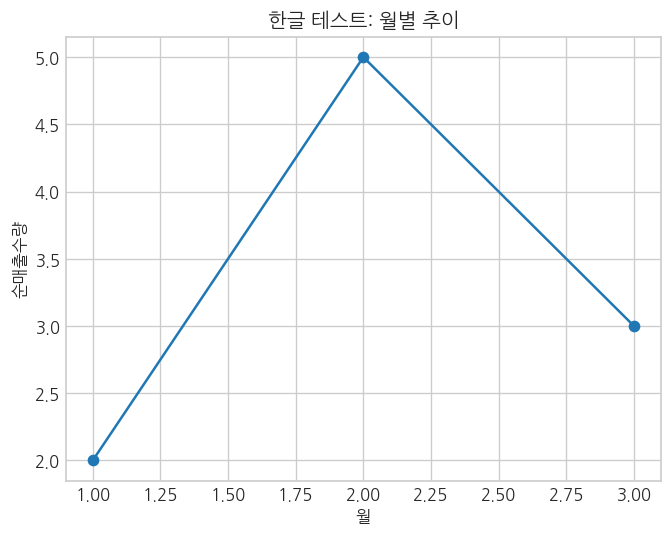

In [ ]:
# -*- coding: utf-8 -*-
# Colab 전용: 나눔/노토 폰트 설치 → Matplotlib에 전역 한글폰트 적용 → 테스트 플롯
import subprocess, sys, os, shutil, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def install_fonts_on_colab():
    # 1) apt로 한글 폰트 설치 (나눔 + 노토 CJK KR)
    cmds = [
        ["apt-get", "update", "-y"],
        ["apt-get", "install", "-y", "fonts-nanum", "fonts-noto-cjk"]
    ]
    for cmd in cmds:
        print(">>", " ".join(cmd))
        p = subprocess.run(["sudo"] + cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(p.stdout)
        if p.returncode != 0:
            print("STDERR:", p.stderr)
            raise RuntimeError(f"Command failed: {' '.join(cmd)}")

    # 2) 설치 경로 확인
    candidates = [
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansKR-Regular.otf",
    ]
    found = [p for p in candidates if os.path.exists(p) and os.path.getsize(p) > 50_000]
    if not found:
        raise FileNotFoundError("설치 후 나눔/노토 폰트 파일을 찾지 못했습니다. 경로를 확인해주세요.")
    print("✅ 설치된 폰트 파일:", found)
    return found

def register_and_set_font(font_paths):
    # 3) Matplotlib에 폰트 등록 + 캐시 리로드
    for p in font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception as e:
            print("addfont error:", e)

    # 캐시 새로고침
    try:
        fm._load_fontmanager(try_read_cache=False)  # mpl 3.6+
    except Exception:
        pass

    # 4) 실제 패밀리명 얻어서 rcParams 전역 설정
    family_names = []
    for p in font_paths:
        try:
            fam = fm.FontProperties(fname=p).get_name()
            if fam not in family_names:
                family_names.append(fam)
        except Exception:
            pass

    # 스타일이 폰트를 덮어쓰는 걸 방지: 스타일 먼저 적용 → 그 다음 폰트 지정
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        try:
            plt.style.use("seaborn-whitegrid")
        except Exception:
            pass

    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.sans-serif"] = family_names + [
        "NanumGothic", "Noto Sans CJK KR", "Apple SD Gothic Neo", "Malgun Gothic", "DejaVu Sans"
    ]
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["figure.dpi"] = 120
    mpl.rcParams["savefig.dpi"] = 320

    print("✅ 적용된 font.sans-serif =", mpl.rcParams["font.sans-serif"])

def korean_smoke_test():
    plt.figure()
    plt.plot([1,2,3],[2,5,3], marker="o")
    plt.title("한글 테스트: 월별 추이")
    plt.xlabel("월")
    plt.ylabel("순매출수량")
    plt.show()

# === 실행 순서 ===
paths = install_fonts_on_colab()
register_and_set_font(paths)
korean_smoke_test()


>> apt-get update -y
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...

>> apt-get install -y fonts-nanum fonts-noto-cjk
Reading package lists...
Building dependency tree...
Reading state information...
fonts-noto-cjk is already the newest version (1:2022012

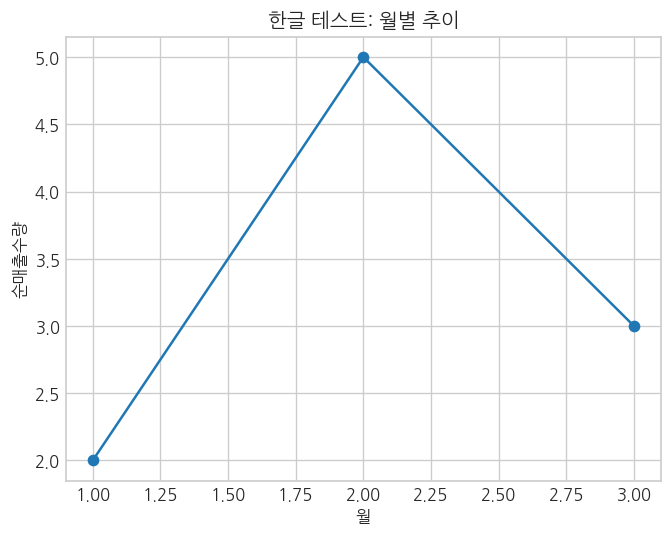

In [ ]:
# -*- coding: utf-8 -*-
# Colab 전용: 나눔/노토 폰트 설치 → Matplotlib에 전역 한글폰트 적용 → 테스트 플롯
import subprocess, sys, os, shutil, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def install_fonts_on_colab():
    # 1) apt로 한글 폰트 설치 (나눔 + 노토 CJK KR)
    cmds = [
        ["apt-get", "update", "-y"],
        ["apt-get", "install", "-y", "fonts-nanum", "fonts-noto-cjk"]
    ]
    for cmd in cmds:
        print(">>", " ".join(cmd))
        p = subprocess.run(["sudo"] + cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(p.stdout)
        if p.returncode != 0:
            print("STDERR:", p.stderr)
            raise RuntimeError(f"Command failed: {' '.join(cmd)}")

    # 2) 설치 경로 확인
    candidates = [
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansKR-Regular.otf",
    ]
    found = [p for p in candidates if os.path.exists(p) and os.path.getsize(p) > 50_000]
    if not found:
        raise FileNotFoundError("설치 후 나눔/노토 폰트 파일을 찾지 못했습니다. 경로를 확인해주세요.")
    print("✅ 설치된 폰트 파일:", found)
    return found

def register_and_set_font(font_paths):
    # 3) Matplotlib에 폰트 등록 + 캐시 리로드
    for p in font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception as e:
            print("addfont error:", e)

    # 캐시 새로고침
    try:
        fm._load_fontmanager(try_read_cache=False)  # mpl 3.6+
    except Exception:
        pass

    # 4) 실제 패밀리명 얻어서 rcParams 전역 설정
    family_names = []
    for p in font_paths:
        try:
            fam = fm.FontProperties(fname=p).get_name()
            if fam not in family_names:
                family_names.append(fam)
        except Exception:
            pass

    # 스타일이 폰트를 덮어쓰는 걸 방지: 스타일 먼저 적용 → 그 다음 폰트 지정
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        try:
            plt.style.use("seaborn-whitegrid")
        except Exception:
            pass

    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.sans-serif"] = family_names + [
        "NanumGothic", "Noto Sans CJK KR", "Apple SD Gothic Neo", "Malgun Gothic", "DejaVu Sans"
    ]
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["figure.dpi"] = 120
    mpl.rcParams["savefig.dpi"] = 320

    print("✅ 적용된 font.sans-serif =", mpl.rcParams["font.sans-serif"])

def korean_smoke_test():
    plt.figure()
    plt.plot([1,2,3],[2,5,3], marker="o")
    plt.title("한글 테스트: 월별 추이")
    plt.xlabel("월")
    plt.ylabel("순매출수량")
    plt.show()

# === 실행 순서 ===
paths = install_fonts_on_colab()
register_and_set_font(paths)
korean_smoke_test()


In [ ]:
# 데이터 상위 5개 확인
weekly_A.head()
# 데이터 기본 정보 확인
weekly_A.info()
# 수치형 컬럼 기본 통계
weekly_A.describe()


NameError: name 'weekly_A' is not defined

In [ ]:
# 결측치 확인
weekly_A.isnull().sum()


##순매출/순매입 분포

In [ ]:
# 순매출수량/순매입수량 분포 시각화 (박스플롯)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=combined[['순매출수량','순매입수량']])
plt.title("순매출수량 vs 순매입수량 분포")
plt.show()


KeyError: "None of [Index(['순매출수량', '순매입수량'], dtype='object')] are in the [columns]"

<Figure size 1200x600 with 0 Axes>

##공휴일 여부 매출,매입수량

In [ ]:
# 공휴일 여부별 평균 순매출수량
holiday_effect = weekly_final.groupby('공휴일여부')[['순매출수량','순매입수량']].mean().reset_index()
holiday_effect


NameError: name 'weekly_final' is not defined

In [ ]:
# 시각화
plt.figure(figsize=(6,4))
sns.barplot(data=holiday_effect, x='공휴일여부', y='순매출수량')
plt.title("공휴일 여부에 따른 평균 순매출수량")
plt.show()


NameError: name 'holiday_effect' is not defined

<Figure size 720x480 with 0 Axes>

In [ ]:
# 시각화
plt.figure(figsize=(6,4))
sns.barplot(data=holiday_effect, x='공휴일여부', y='순매입수량')
plt.title("공휴일 여부에 따른 평균 순매입수량")
plt.show()

##매출·매입 vs 외부 변수 상관관계


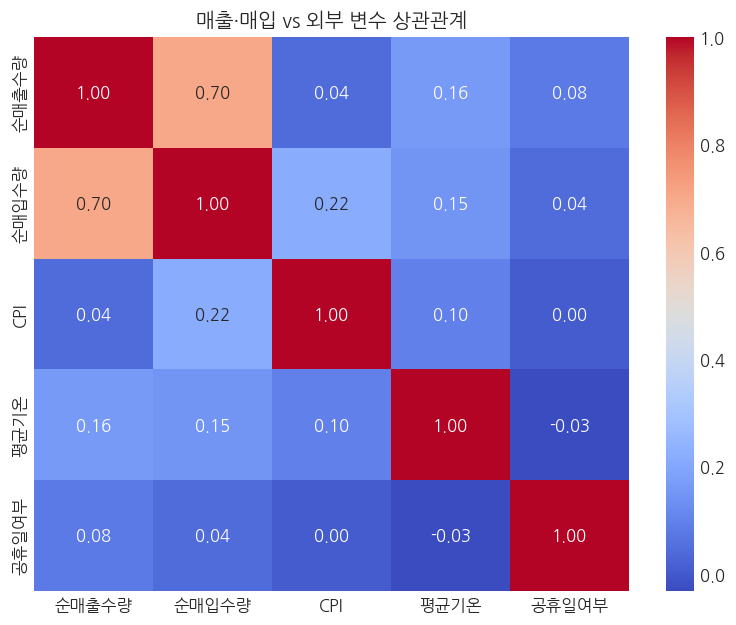

In [ ]:
external_cols = ['CPI','평균기온','공휴일여부']
if set(external_cols).issubset(weekly_A.columns):
    corr_cols = ['순매출수량','순매입수량'] + external_cols
    corr = weekly_A[corr_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("매출·매입 vs 외부 변수 상관관계")
    plt.show()
else:
    print(":경고: CPI/평균기온/공휴일여부 컬럼이 없어서 상관분석 생략됨")

##풀필먼트 차이

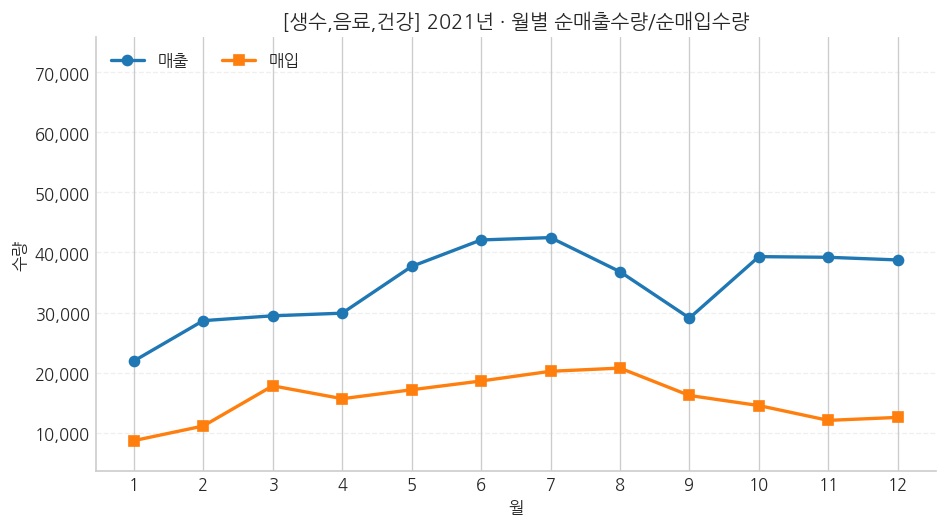

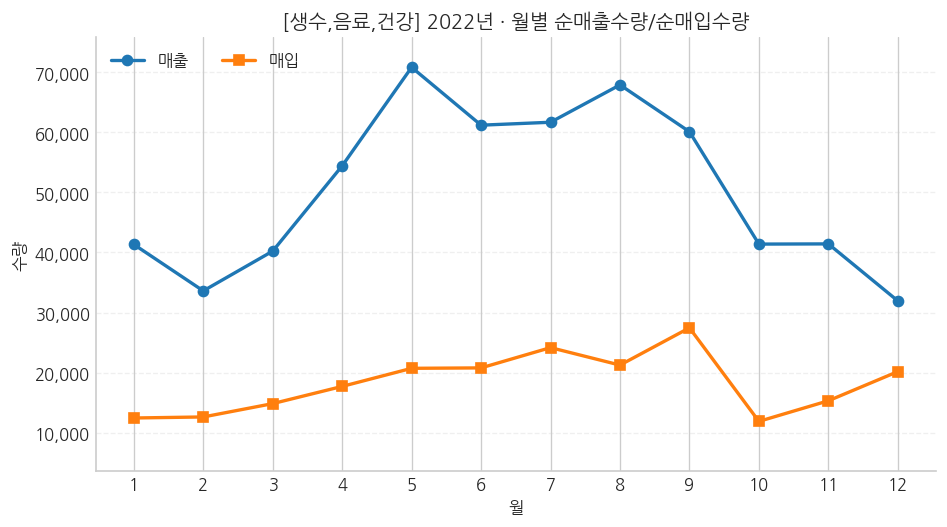

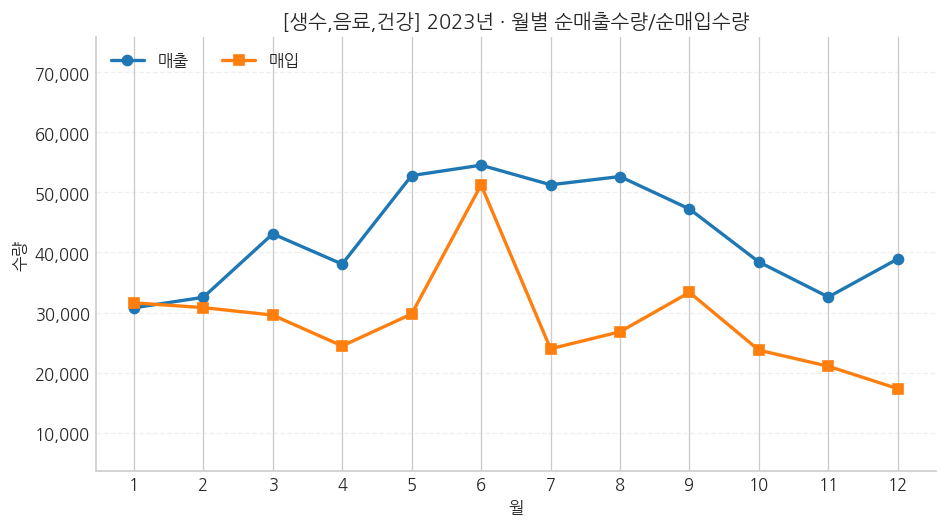

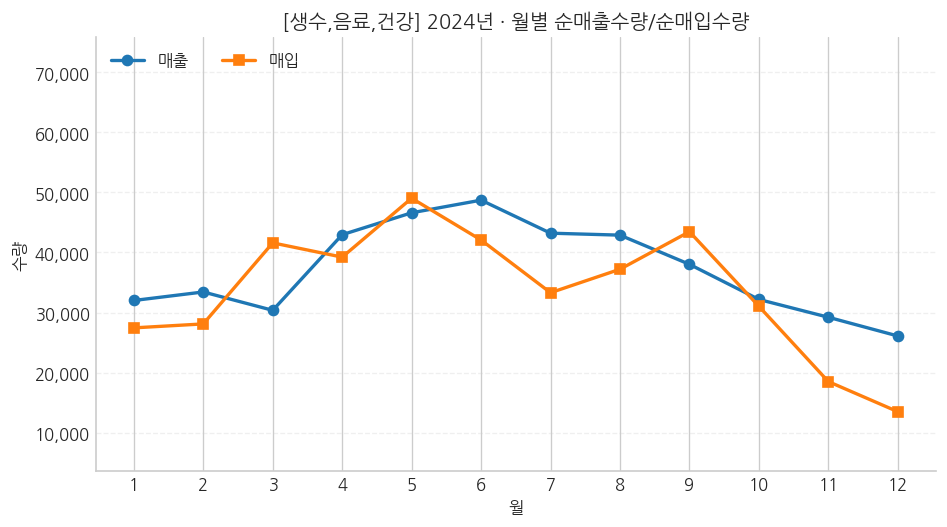

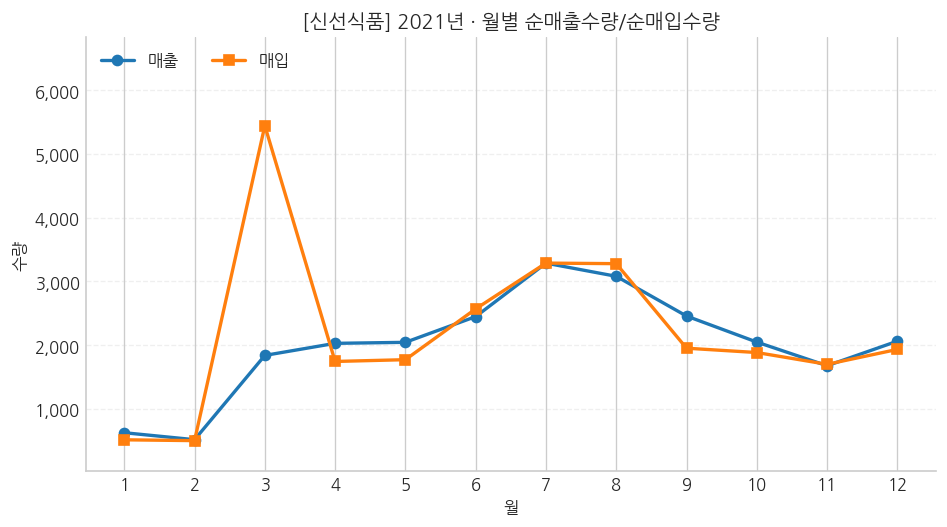

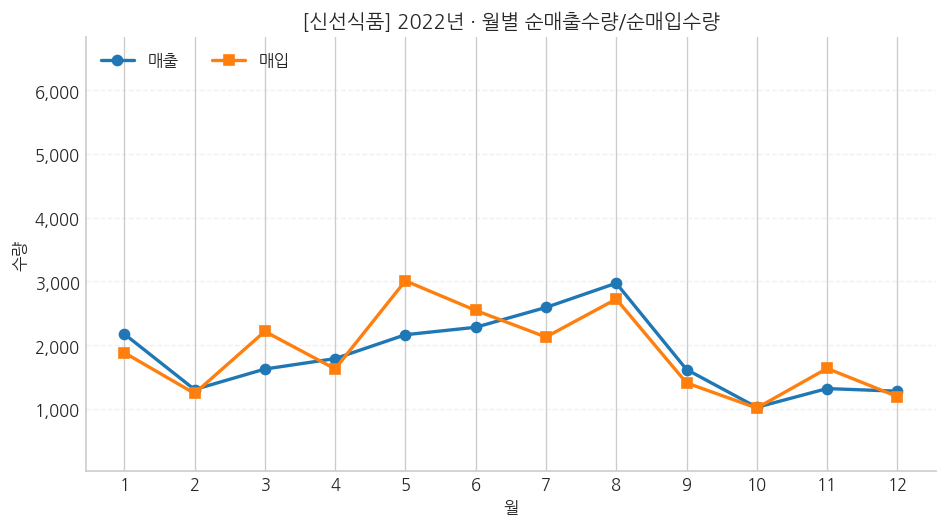

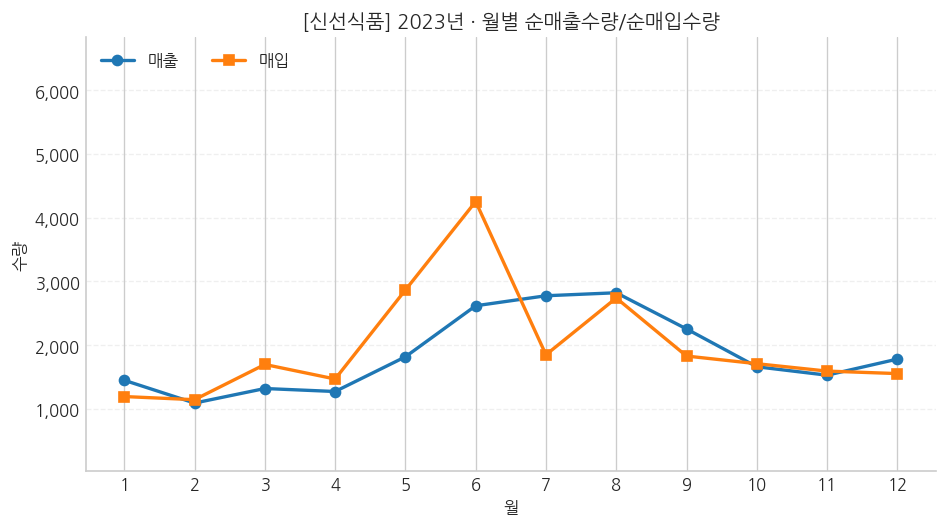

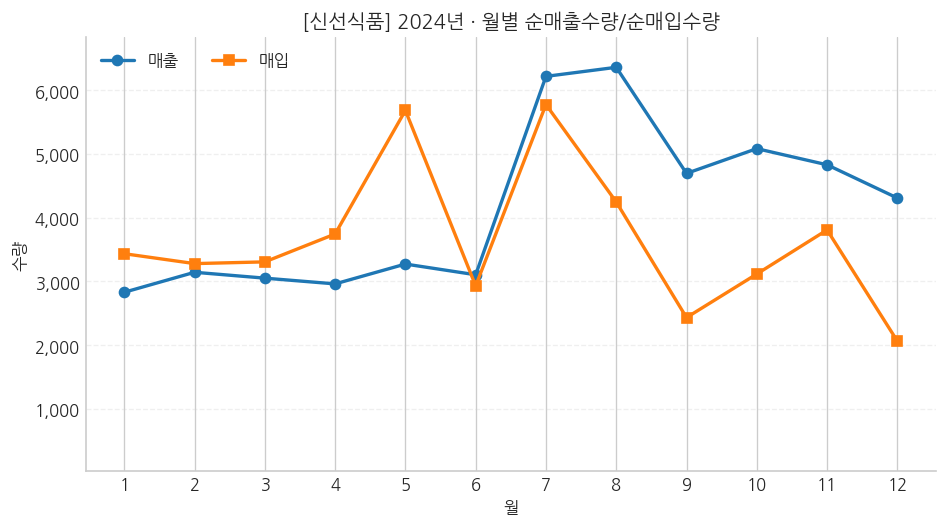

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = weekly_A.copy()

num_cols = ["순매출수량","순매입수량","CPI","평균기온","주총강수량","주최대적설","공휴일여부"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
df["연도"] = pd.to_numeric(df["연도"], errors="coerce").astype("Int64")
df["월"]   = pd.to_numeric(df["월"],   errors="coerce").astype("Int64")
df["월_날짜"] = pd.to_datetime(df["연도"].astype(str) + "-" + df["월"].astype(str) + "-01", errors="coerce")

def _agg_month(sub, year, sales_col, buys_col, agg="sum"):
    month_idx = pd.Index(range(1,13), name="월")
    dd = sub[sub["연도"] == year]
    if dd.empty:
        g = pd.DataFrame(index=month_idx, columns=[sales_col, buys_col], dtype=float)
    else:
        if agg == "sum":
            g = dd.groupby("월", as_index=True)[[sales_col, buys_col]].sum()
        else:
            g = dd.groupby("월", as_index=True)[[sales_col, buys_col]].mean()
        g = g.reindex(month_idx)
    return g[sales_col], g[buys_col]

def _category_ylim(sub, years, sales_col, buys_col, agg="sum"):
    # 해당 카테고리 내 모든 연도 데이터를 모아 공통 y축 범위 계산
    arr = []
    for y in years:
        s, b = _agg_month(sub, y, sales_col, buys_col, agg=agg)
        arr.append(s.values); arr.append(b.values)
    vals = np.concatenate([a[~np.isnan(a)] for a in arr]) if len(arr) else np.array([])
    if vals.size == 0:
        return (0.0, 1.0)
    vmin, vmax = vals.min(), vals.max()
    pad = (vmax - vmin) * 0.08 if (vmax - vmin) > 0 else 1.0
    return (vmin - pad, vmax + pad)

def plot_year_single(
    data: pd.DataFrame, category: str, year: int,
    y_lim=None, sales_col="순매출수량", buys_col="순매입수량",
    agg="sum"
):
    sub = data[data["중분류"] == category].copy()
    sub = sub.dropna(subset=["연도","월"])
    month_idx = np.arange(1, 13)

    s, b = _agg_month(sub, year, sales_col, buys_col, agg=agg)

    fig, ax = plt.subplots(figsize=(8, 4.5))
    # 선 + 마커 (숫자 주석 없음)
    ln1, = ax.plot(month_idx, s.values, marker="o", linewidth=2, label="매출")
    ln2, = ax.plot(month_idx, b.values, marker="s", linewidth=2, label="매입")

    # 깔끔한 스타일
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, linestyle="--", alpha=0.3, axis="y")
    ax.set_xticks(range(1,13))
    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.set_title(f"[{category}] {int(year)}년 · 월별 {sales_col}/{buys_col}", fontsize=12)
    ax.set_xlabel("월", fontsize=10)
    ax.set_ylabel("수량", fontsize=10)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
    ax.legend(ncol=2, frameon=False, loc="upper left")
    plt.tight_layout()
    plt.show()

# ===== 실행: 각 카테고리×연도 → 한 장씩 =====
target_categories = ["생수,음료,건강", "신선식품"]   # 필요 시 수정
years = (2021, 2022, 2023, 2024)

for cat in target_categories:
    sub_cat = df[df["중분류"] == cat].copy()
    y_lim_cat = _category_ylim(sub_cat, years, "순매출수량", "순매입수량", agg="sum")
    for y in years:
        plot_year_single(
            df, category=cat, year=y,
            y_lim=y_lim_cat,                # 같은 카테고리 내 연도별 공통 y축
            sales_col="순매출수량", buys_col="순매입수량",
            agg="sum"
        )


#지역별 비율(매입,매출)

###매입 지역별 비율

In [ ]:
import pandas as pd
import numpy as np
import re

# 원본 복사 & 컬럼 이름 정리(연속 공백 -> 1칸, 앞뒤 공백 제거)
df = df_A_maip.copy()
df.columns = (
    pd.Index(df.columns)
      .map(lambda c: re.sub(r'\s+', ' ', str(c)).strip())
)

# 사용할 원천 컬럼 이름들(여러 표기 방어)
col_zip_prefix = None
for cand in ['우편번호 앞두자리', '우편번호 앞 두자리', '우편번호앞두자리']:
    if cand in df.columns:
        col_zip_prefix = cand
        break

col_zip_full = None
for cand in ['공급업체 우편번호', '우편번호', '우편 번호']:
    if cand in df.columns:
        col_zip_full = cand
        break

col_cnt = None
for cand in ['공급 출처수', '공급출처수', '출처수', '건수']:
    if cand in df.columns:
        col_cnt = cand
        break

# 1) 앞두자리 생성: 우선 '우편번호 앞두자리' 사용, 없으면 '공급업체 우편번호'에서 파생
if col_zip_prefix is not None:
    df['앞두자리'] = (
        df[col_zip_prefix]
          .astype(str)
          .str.extract(r'(\d{2})', expand=False)  # 숫자 2자리 추출
          .fillna('00')
          .str.zfill(2)
    )
elif col_zip_full is not None:
    df['앞두자리'] = (
        df[col_zip_full]
          .astype(str)
          .str.extract(r'(\d{2})', expand=False)
          .fillna('00')
          .str.zfill(2)
    )
else:
    raise ValueError("우편번호 정보를 찾을 수 없습니다. ('우편번호 앞두자리' 또는 '공급업체 우편번호' 필요)")

# 2) 공급출처수 컬럼 준비: 있으면 사용, 없으면 1로 대체(행당 1건)
if col_cnt is not None:
    df['공급출처수'] = pd.to_numeric(df[col_cnt], errors='coerce').fillna(0).astype(int)
else:
    # 공급업체 단위로 1건 처리 (필요시 고유 코드 기준으로 중복 제거 가능)
    df['공급출처수'] = 1

# (선택) 중복 제거가 필요하면 아래 주석 해제:
# if '공급업체 코드' in df.columns:
#     df = df.drop_duplicates(subset=['공급업체 코드', '앞두자리'])

# 3) 지역(앞두자리) 기준 합산
grouped = (
    df.groupby('앞두자리', as_index=False)['공급출처수']
      .sum()
      .sort_values('공급출처수', ascending=False)
      .reset_index(drop=True)
)

# 4) 전체 대비 매출처비율(%) 계산 → 요구 컬럼명은 '매출처비율'이므로 퍼센트 값(0~100)을 저장
total = grouped['공급출처수'].sum()
if total == 0:
    grouped['매출처비율'] = 0.0
else:
    grouped['매출처비율'] = (grouped['공급출처수'] / total * 100).round(2)

# 결과 미리보기
print(grouped.head())


  앞두자리  공급출처수     매출처비율
0   37  11203 36.400000
1   41  10532 34.220000
2   75   2516  8.170000
3   10   1764  5.730000
4   65   1334  4.330000


[grouped 미리보기]
  앞두자리  공급출처수     매출처비율
0   37  11203 36.400000
1   41  10532 34.220000
2   75   2516  8.170000
3   10   1764  5.730000
4   65   1334  4.330000


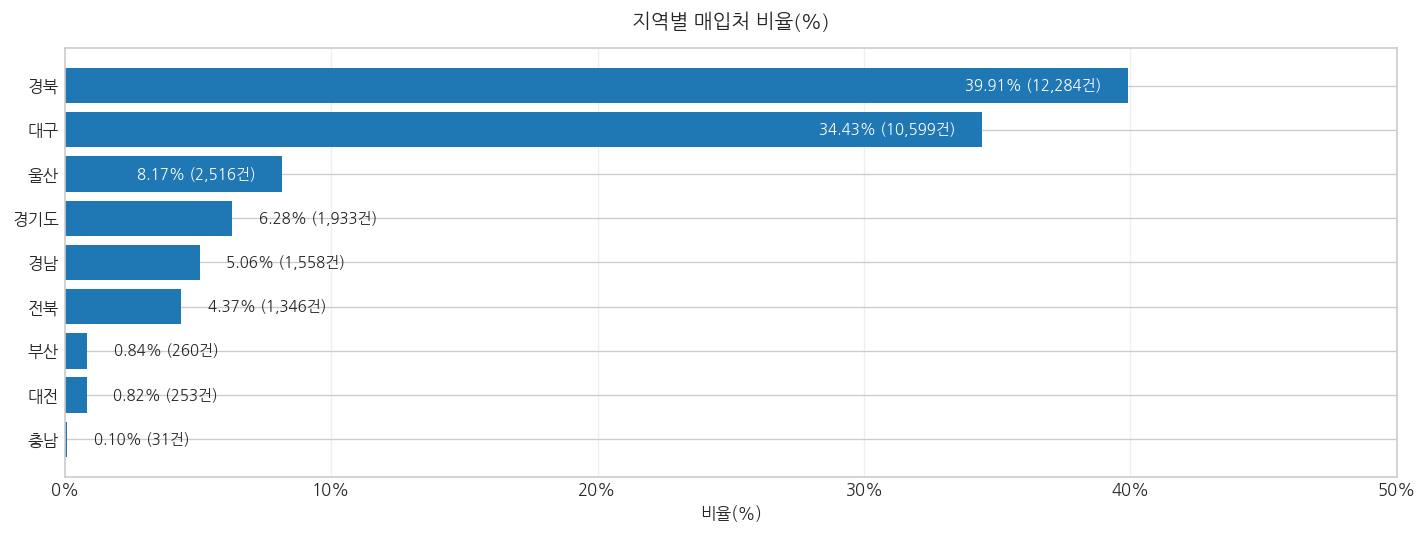


[지역 합산 agg]
지역명  공급출처수  매출처비율(%)
 경북  12284 39.910000
 대구  10599 34.430000
 울산   2516  8.170000
경기도   1933  6.280000
 경남   1558  5.060000
 전북   1346  4.370000
 부산    260  0.840000
 대전    253  0.820000
 충남     31  0.100000


In [ ]:
import pandas as pd
import numpy as np
import re

# =========================
# 0) df_A_maip → grouped 생성
# =========================
df = df_A_maip.copy()

# 컬럼 공백/표기 정리
df.columns = (
    pd.Index(df.columns)
      .map(lambda c: re.sub(r'\s+', ' ', str(c)).strip())
)

# 후보 컬럼 자동 인식
col_zip_prefix = next((c for c in ['우편번호 앞두자리','우편번호 앞 두자리','우편번호앞두자리'] if c in df.columns), None)
col_zip_full   = next((c for c in ['공급업체 우편번호','우편번호','우편 번호'] if c in df.columns), None)
col_cnt        = next((c for c in ['공급 출처수','공급출처수','출처수','건수'] if c in df.columns), None)

# 앞두자리 만들기
if col_zip_prefix is not None:
    df['앞두자리'] = (
        df[col_zip_prefix].astype(str).str.extract(r'(\d{2})', expand=False)
          .fillna('00').str.zfill(2)
    )
elif col_zip_full is not None:
    df['앞두자리'] = (
        df[col_zip_full].astype(str).str.extract(r'(\d{2})', expand=False)
          .fillna('00').str.zfill(2)
    )
else:
    raise ValueError("우편번호 정보를 찾을 수 없습니다. ('우편번호 앞두자리' 또는 '공급업체 우편번호')")

# 공급출처수 만들기(없으면 1로 간주)
if col_cnt is not None:
    df['공급출처수'] = pd.to_numeric(df[col_cnt], errors='coerce').fillna(0).astype(int)
else:
    df['공급출처수'] = 1

# (선택) 업체-앞두자리 중복 제거가 필요하면 해제
# if '공급업체 코드' in df.columns:
#     df = df.drop_duplicates(subset=['공급업체 코드','앞두자리'])

# 앞두자리 기준 합산
grouped = (
    df.groupby('앞두자리', as_index=False)['공급출처수']
      .sum()
      .sort_values('공급출처수', ascending=False)
      .reset_index(drop=True)
)

# 비율(%) 계산 — 컬럼명은 요구사항대로 '매출처비율'
total_cnt = grouped['공급출처수'].sum()
grouped['매출처비율'] = 0.0 if total_cnt == 0 else (grouped['공급출처수'] / total_cnt * 100).round(2)

print("[grouped 미리보기]")
print(grouped.head())


# =========================
# 1) 앞두자리 → 지역명 매핑 함수
# =========================
def prefix_to_region(prefix):
    p = int(str(prefix).zfill(2)[:2])

    # 서울/수도권/강원
    if 1 <= p <= 7:      return '서울'
    if 21 <= p <= 23:    return '인천'
    if 10 <= p <= 18:    return '경기도'
    if p in (24, 25):    return '경기도'   # 중복구간 → 기본값: 경기도
    if p == 26:          return '강원도'

    # 충청권
    if p == 30:          return '세종시'
    if 27 <= p <= 29:    return '충북'
    if 31 <= p <= 33:    return '충남'
    if p in (34, 35):    return '대전'

    # 대구/경북
    if 36 <= p <= 39:    return '경북'
    if 41 <= p <= 44:    return '대구'     # 44가 울산과 중복 → 기본값: 대구

    # 부산/울산/경남
    if 46 <= p <= 49:    return '부산'
    if p == 45:          return '울산'     # 44는 위에서 대구로 처리
    if p == 75:          return '울산'
    if 50 <= p <= 53:    return '경남'

    # 호남/제주
    if 54 <= p <= 56:    return '전북'
    if p in (57, 58, 59):return '전남'
    if p == 61:          return '광주'
    if p == 62:          return '전남'
    if p == 63:          return '제주'     # 전남·제주 중복 → 기본값: 제주
    if p == 65:          return '전북'
    if p == 79:          return '경남'
    if p == 72:          return '경북'
    if p == 40:          return '대전'
    # 그 외: 앞두자리 그대로 권역 표기
    return f'{str(p).zfill(2)}권'


# =========================
# 2) 지역명 부여
# =========================
tbl = grouped.copy()
tbl['앞두자리'] = tbl['앞두자리'].astype(str).str.zfill(2)
tbl['지역명'] = tbl['앞두자리'].apply(prefix_to_region)

# =========================
# 3) 같은 지역끼리 합산 & 비율 재계산
# =========================
agg = (
    tbl.groupby('지역명', as_index=False)['공급출처수'].sum()
       .sort_values('공급출처수', ascending=False)
       .reset_index(drop=True)
)
total_region = agg['공급출처수'].sum()
agg['매출처비율(%)'] = 0.0 if total_region == 0 else (agg['공급출처수'] / total_region * 100).round(2)

# ==== 시각화 (agg 사용) ====
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plot_df = agg.sort_values('매출처비율(%)', ascending=False).reset_index(drop=True)

regions = plot_df['지역명'].astype(str)
pct     = plot_df['매출처비율(%)'].astype(float)
counts  = plot_df['공급출처수'].astype(int)

# 항목 수에 따라 높이 자동
h = 0.5 + 0.45 * len(plot_df)
fig, ax = plt.subplots(figsize=(12, h))

bars = ax.barh(regions, pct)  # 색상 지정 X (기본값)

# 막대 위쪽이 최댓값
ax.invert_yaxis()

# 제목/축/그리드
ax.set_title('지역별 매입처 비율(%)', pad=12)
ax.set_xlabel('비율(%)')
ax.set_xlim(0, 50)  # 퍼센트 축 0~100 고정
ax.xaxis.set_major_formatter(mtick.PercentFormatter(100))  # 눈금에 % 표시
ax.grid(axis='x', alpha=0.3)

# 레이블: 막대 길이에 따라 안/밖 배치
# (임계값 8%: 그 이상이면 막대 안쪽 흰 글자, 아니면 바깥)
for i, rect in enumerate(bars):
    w = rect.get_width()
    label = f"{pct.iat[i]:.2f}% ({counts.iat[i]:,}건)"
    if w >= 8:
        ax.text(w - 1, rect.get_y() + rect.get_height()/2, label,
                va='center', ha='right', fontsize=9, color='white')
    else:
        ax.text(w + 1, rect.get_y() + rect.get_height()/2, label,
                va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


# =========================
# 4) 보기 좋게 출력
# =========================
print("\n[지역 합산 agg]")
print(agg.to_string(index=False))


In [ ]:
import matplotlib.pyplot as plt

# agg: ['지역명','공급출처수','매출처비율(%)'] 가 들어있다고 가정
tbl = agg.copy().sort_values('매출처비율(%)', ascending=False).reset_index(drop=True)

regions = tbl['지역명']
pct = tbl['매출처비율(%)'].astype(float)
counts = tbl['공급출처수'].astype(int)

fig, ax = plt.subplots(figsize=(10, 0.5 + 0.45*len(tbl)))  # 항목 수에 따라 높이 자동
bars = ax.barh(regions, pct)  # 색상 지정 X (기본값)

# 상단이 최댓값 오도록 뒤집기
ax.invert_yaxis()

# 제목/축 라벨
ax.set_title('지역별 매입처 비율(%)', pad=12)
ax.set_xlabel('비율(%)')

# 퍼센트 + 건수 레이블
for i, rect in enumerate(bars):
    w = rect.get_width()
    label = f"{pct[i]:.2f}% ({counts[i]:,}건)"
    # 막대가 짧으면 막대 밖, 길면 안쪽에 흰색 테두리 없이 표시
    x_pos = w + (max(pct)*0.01)
    ha = 'left'
    ax.text(x_pos, rect.get_y() + rect.get_height()/2, label,
            va='center', ha=ha, fontsize=9)

# 여유 공간
ax.set_xlim(0, max(pct)*1.15)
plt.tight_layout()
plt.show()


###매출 지역별 비율


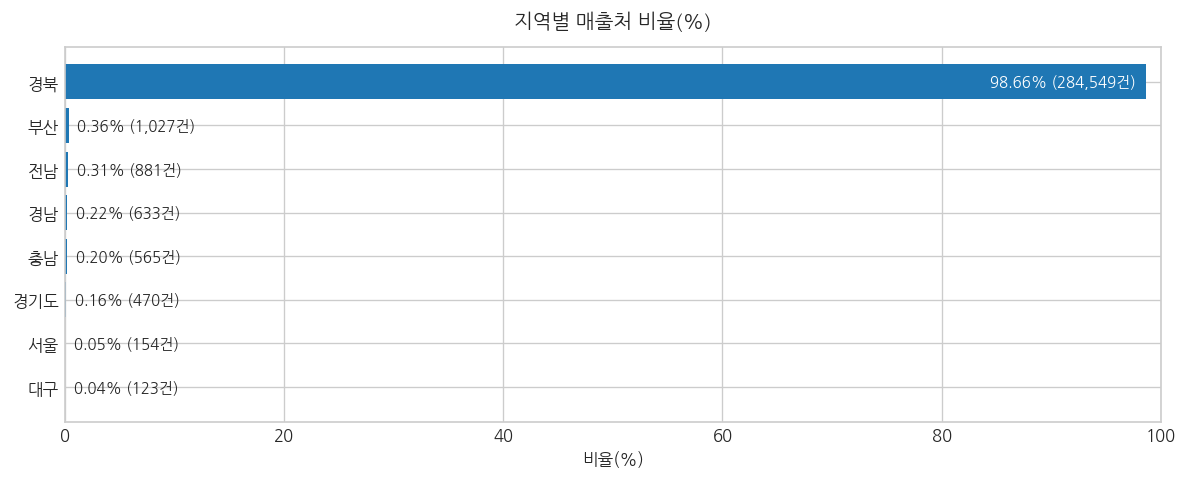

지역명   공급출처수  매출처비율(%)
 경북 284,549     98.66
 부산   1,027      0.36
 전남     881      0.31
 경남     633      0.22
 충남     565      0.20
경기도     470      0.16
 서울     154      0.05
 대구     123      0.04


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1) 앞두자리 → 지역명 매핑 (이전 규칙 그대로) =====
def prefix_to_region(prefix):
    p = int(str(prefix).zfill(2)[:2])
    if 1 <= p <= 7:    return '서울'
    if 21 <= p <= 23:  return '인천'
    if 10 <= p <= 18:  return '경기도'
    if p in (24,25):   return '경기도'
    if p == 26:        return '강원도'
    if p == 30:        return '세종시'
    if 27 <= p <= 29:  return '충북'
    if 31 <= p <= 33:  return '충남'
    if p in (34,35):   return '대전'
    if 36 <= p <= 39:  return '경북'
    if 41 <= p <= 44:  return '대구'   # 44 중복 구간은 기본값: 대구
    if 46 <= p <= 49:  return '부산'
    if p == 45:        return '울산'
    if 50 <= p <= 53:  return '경남'
    if 54 <= p <= 56:  return '전북'
    if p in (57,58,59):return '전남'
    if p == 61:        return '광주'
    if p == 62:        return '전남'
    if p == 63:        return '제주'
    return f'{str(p).zfill(2)}권'

# ===== 2) df_machul_final 전용 집계 + 시각화 =====
def visualize_regions_from_df_machul_final(df_machul_final, postal_col=None):
    d = df_A_maip.copy()
    d.columns = d.columns.str.strip()

    # 우편번호 컬럼 자동 탐색(필요시 직접 지정 가능)
    if postal_col is None:
        candidates = ['공급업체 우편번호','공급업체 우편코드','매출처 우편번호','우편번호','배송지 우편번호']
        postal_col = next((c for c in candidates if c in d.columns), None)
        if postal_col is None:
            hits = [c for c in d.columns if ('우편' in c) or ('우편번호' in c)]
            if hits:
                postal_col = hits[0]
            else:
                raise KeyError("우편번호 컬럼을 찾을 수 없습니다. postal_col을 직접 지정하세요.")

    # 우편번호 정규화 & 앞두자리
    d[postal_col] = (
        d[postal_col].astype('string')
                      .str.replace(r'\.0$', '', regex=True)
                      .str.strip()
                      .str.zfill(5)
    )
    d['앞두자리'] = d[postal_col].str[:2]

    # 앞두자리 → 지역명
    d['지역명'] = d['앞두자리'].apply(prefix_to_region)

    # 지역 단위 집계
    agg = (d.groupby('지역명', as_index=False)
             .size()
             .rename(columns={'size':'공급출처수'})
             .sort_values('공급출처수', ascending=False)
          )
    total = agg['공급출처수'].sum()
    agg['매출처비율(%)'] = (agg['공급출처수'] / total * 100).round(2)

    # ---------- 시각화(가로 막대, x축 0–100% 고정) ----------
    tbl = agg.sort_values('매출처비율(%)', ascending=False).reset_index(drop=True)
    regions = tbl['지역명']
    pct = pd.to_numeric(tbl['매출처비율(%)'], errors='coerce')
    counts = pd.to_numeric(tbl['공급출처수'], errors='coerce').fillna(0).astype(int)

    fig, ax = plt.subplots(figsize=(10, 0.5 + 0.45*len(tbl)))
    bars = ax.barh(regions, pct)   # 색상 지정하지 않음
    ax.invert_yaxis()
    ax.set_xlim(0, 100)            # 퍼센트 축 고정
    ax.set_title('지역별 매출처 비율(%)', pad=12)
    ax.set_xlabel('비율(%)')

    # 레이블: 긴 막대는 안쪽, 짧은 막대는 바깥에
    for i, rect in enumerate(bars):
        w = rect.get_width()
        label = f"{pct.iloc[i]:.2f}% ({counts.iloc[i]:,}건)"
        if w >= 8:
            ax.text(w - 1.0, rect.get_y() + rect.get_height()/2,
                    label, ha='right', va='center', fontsize=9, color='white')
        else:
            ax.text(w + 0.8, rect.get_y() + rect.get_height()/2,
                    label, ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # 표도 함께 출력
    view = tbl.copy()
    view['공급출처수'] = view['공급출처수'].map('{:,}'.format)
    print(view.to_string(index=False))
    return view

# ===== 3) 호출 =====
_ = visualize_regions_from_df_machul_final(df_machul_final)
# 필요하면 우편번호 컬럼 명시:
# _ = visualize_regions_from_df_machul_final(df_machul_final, postal_col='매출처 우편번호')


#중분류 중 생음건 ,신선식품 비율


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) 전체 카테고리 집계 ---
total = len(df1_filtered)

by_cat = (
    df1_filtered['중분류']
    .fillna('미분류')                       # NaN은 '미분류' 처리
    .value_counts(dropna=False)
    .rename_axis('카테고리')
    .reset_index(name='건수')
)
by_cat['비율(%)'] = (by_cat['건수'] / total * 100)

# 내림차순 정렬
by_cat = by_cat.sort_values('건수', ascending=True)  # 가로 막대이므로 오름차순으로 뒤집어 그리기

# --- 2) 표 출력 ---
print(by_cat.assign(**{'비율(%)': by_cat['비율(%)'].round(2)}).to_string(index=False))

# --- 3) 막대그래프 (가로형) ---
labels = by_cat['카테고리'].tolist()
counts = by_cat['건수'].tolist()
pct     = by_cat['비율(%)'].tolist()

# 카테고리 수에 따라 자동으로 높이 조절
fig_h = max(6, 0.4 * len(by_cat))
fig, ax = plt.subplots(figsize=(10, fig_h))

ax.barh(labels, counts)  # 색상 기본값 사용

ax.set_title("중분류별 매출 건수 (df1_filtered)")
ax.set_xlabel("건수")
ax.set_ylabel("카테고리")

# 퍼센트 주석(오른쪽 끝)
for i, (c, p) in enumerate(zip(counts, pct)):
    ax.text(c, i, f"  {p:.1f}%", va='center', ha='left')

# x축을 여유 있게 (라벨 겹침 방지)
ax.set_xlim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

# --- 4) 퍼센트 기준 막대그래프가 필요하면(선택) ---
fig, ax = plt.subplots(figsize=(10, fig_h))
ax.barh(labels, pct)
ax.set_title("A 중분류별 매출 비중 (%)")
ax.set_xlabel("비율(%)")
ax.set_ylabel("카테고리")
for i, (p, c) in enumerate(zip(pct, counts)):
    ax.text(p, i, f"  {p:.1f}% ({c:,}건)", va='center', ha='left')
ax.set_xlim(0, max(pct) * 1.15)
plt.tight_layout()
plt.show()


#상품별 판매량 추이

##중분류별 판매량

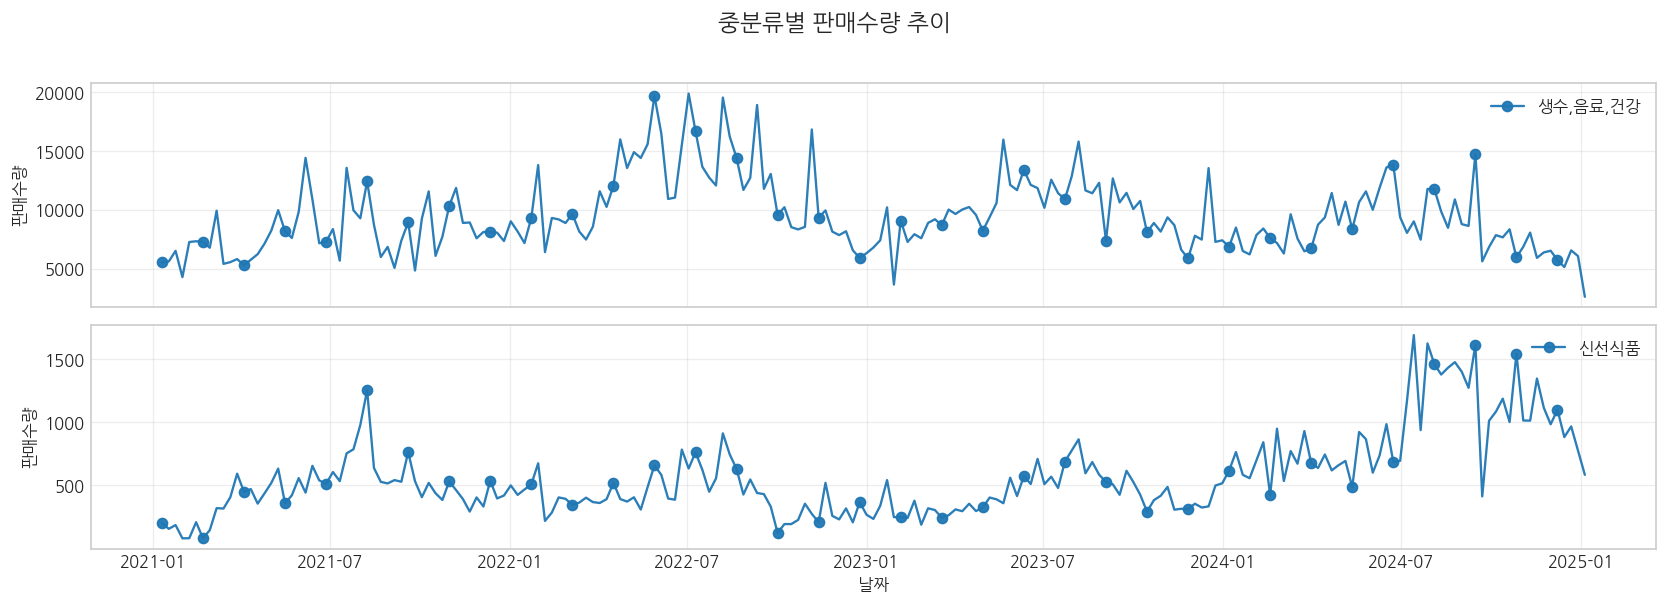

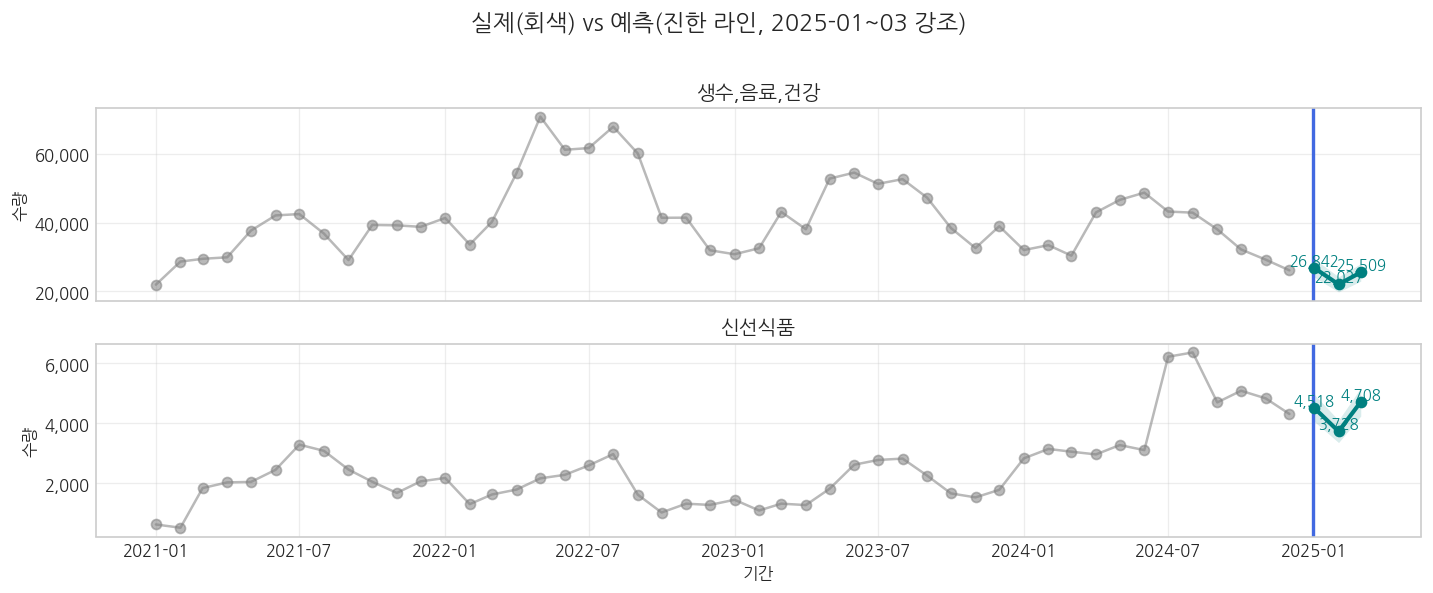

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ---------------------------
# 1) 사용자 예측값(2025-01~03)
# ---------------------------
pred_2025 = {
    ('생수,음료,건강', 1): 26842.50,
    ('생수,음료,건강', 2): 22027.21,
    ('생수,음료,건강', 3): 25509.33,
    ('신선식품', 1): 4518.38,
    ('신선식품', 2): 3727.55,
    ('신선식품', 3): 4708.13,
}
PRED_YEAR = 2025
CUTOFF = '2024-12-31'  # 실제값은 여기까지로 간주

# ---------------------------
# 2) 함수: 실제 + 예측 플롯
# ---------------------------
def plot_actual_forecast(df, grp='중분류', date_col='판매일', qty='판매수량',
                         cutoff=CUTOFF, pred_map=pred_2025, pred_year=PRED_YEAR,
                         band_pct=0.1):
    """실제(회색) vs 예측(진한 라인) 강조 플롯. band_pct는 예측 구간 ±퍼센트 밴드(가시화용)."""
    # 날짜 보정
    if date_col not in df.columns:
        # 연/월/주차로부터 생성 시도(없으면 오류)
        base = pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1))
        df = df.assign(**{date_col: base})
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # 월별 집계(중분류 × 월)
    m = (df.assign(ym=df[date_col].dt.to_period('M').dt.to_timestamp())
            .groupby([grp, 'ym'], as_index=False)[qty].sum()
            .rename(columns={'ym':'날짜', qty:'실제'}))

    # 실제/컷오프 분리
    cutoff_ts = pd.to_datetime(cutoff)
    hist = m[m['날짜'] <= cutoff_ts]
    cats = hist[grp].unique().tolist()

    # 예측 DF 구성(사용자 맵 → 날짜)
    rows = []
    for (cat, mon), val in pred_map.items():
        rows.append({grp: str(cat),
                     '날짜': pd.Timestamp(year=pred_year, month=int(mon), day=1),
                     '예측': float(val)})
    pred = pd.DataFrame(rows)

    # 카테고리 루프
    n = len(cats) or 1
    fig, axes = plt.subplots(n, 1, figsize=(12, max(3.2, 2.5*n)), sharex=True)
    if n == 1: axes = [axes]

    for ax, cat in zip(axes, cats):
        h = hist[hist[grp] == cat].sort_values('날짜')
        p = pred[pred[grp] == cat].sort_values('날짜')

        # 실제(회색)
        ax.plot(h['날짜'], h['실제'], color='gray', alpha=0.55, linewidth=1.5, marker='o')

        # 컷라인
        ax.axvline(cutoff_ts, color='royalblue', linewidth=2)

        # 예측(진한 청록) + 밴드(±band_pct)
        if not p.empty:
            ax.plot(p['날짜'], p['예측'], color='teal', linewidth=2.5, marker='o')
            if band_pct and band_pct > 0:
                lo = p['예측'] * (1 - band_pct)
                hi = p['예측'] * (1 + band_pct)
                ax.fill_between(p['날짜'], lo, hi, color='teal', alpha=0.15, linewidth=0)

            # 포인트 라벨(예측)
            for x, y in zip(p['날짜'], p['예측']):
                ax.text(x, y, f"{y:,.0f}", va='bottom', ha='center', fontsize=9, color='teal')

        ax.set_title(cat)
        ax.grid(True, alpha=0.35)
        ax.set_ylabel('수량')

    axes[-1].set_xlabel('기간')
    fig.suptitle('실제(회색) vs 예측(진한 라인, 2025-01~03 강조)', fontsize=14)
    fig.tight_layout(rect=[0,0,1,0.96])

    # 천단위 콤마
    for ax in axes:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
    plt.show()

# ---------------------------
# 3) 사용 예시
# ---------------------------
#df_machul_final: (중분류, 판매일, 판매수량) 보유라고 가정

plot_actual_forecast(df_machul_final)


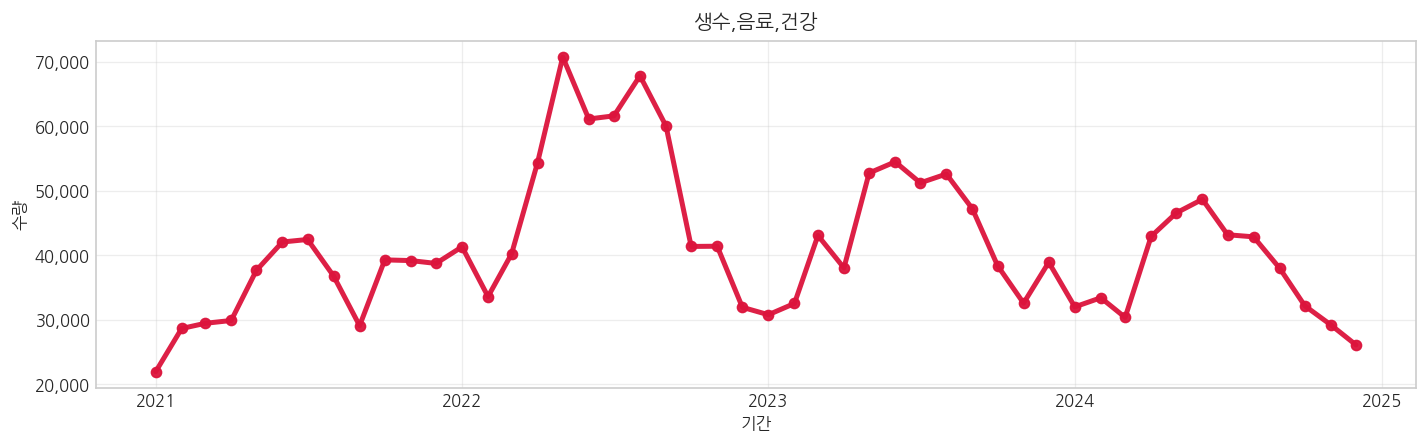

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

TARGET = '생수, 음료, 건강'      # 표준 표기
START, END = '2021-01-01', '2024-12-31'

def _canon(label: str) -> str:
    s = str(label).replace(' ', '')
    if s in ['생수,음료,건강', '생수음료건강', '생수·음료·건강']:
        return '생수, 음료, 건강'
    return label

def plot_bev_21_24(df, grp='중분류', date_col='판매일', qty='판매수량'):
    d = df.copy()

    # 날짜열 보정 (없으면 연/월로 생성)
    if date_col not in d.columns:
        if not {'연도','월'}.issubset(d.columns):
            raise ValueError("판매일 또는 (연도,월) 컬럼이 필요합니다.")
        d[date_col] = pd.to_datetime(dict(year=d['연도'], month=d['월'], day=1))
    else:
        d[date_col] = pd.to_datetime(d[date_col])

    # 카테고리 통일
    d[grp] = d[grp].map(_canon)

    # 대상만 월 집계
    sub = d[d[grp] == _canon(TARGET)].copy()
    sub['월'] = sub[date_col].dt.to_period('M').dt.to_timestamp()
    m = (sub.groupby('월', as_index=False)[qty].sum()
             .rename(columns={qty: '값'}))

    # 기간 필터: 2021-01 ~ 2024-12
    m = m[(m['월'] >= pd.Timestamp(START)) & (m['월'] <= pd.Timestamp(END))].sort_values('월')

    # ===== plot =====
    fig, ax = plt.subplots(figsize=(12, 3.8))
    ax.plot(m['월'], m['값'], color='crimson', linewidth=3.0, marker='o', alpha=0.95)

    ax.set_title('생수,음료,건강', pad=8)
    ax.set_ylabel('수량')
    ax.set_xlabel('기간')
    ax.grid(True, alpha=0.35)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))

    # x축: 해 단위 라벨
    ticks = pd.date_range('2021-01-01', '2025-01-01', freq='YS')
    ax.set_xticks(ticks)
    ax.set_xticklabels([t.strftime('%Y') for t in ticks])

    fig.tight_layout()
    plt.show()

# 사용:
plot_bev_21_24(df_machul_final)


##월별 상품별 판매량 변화

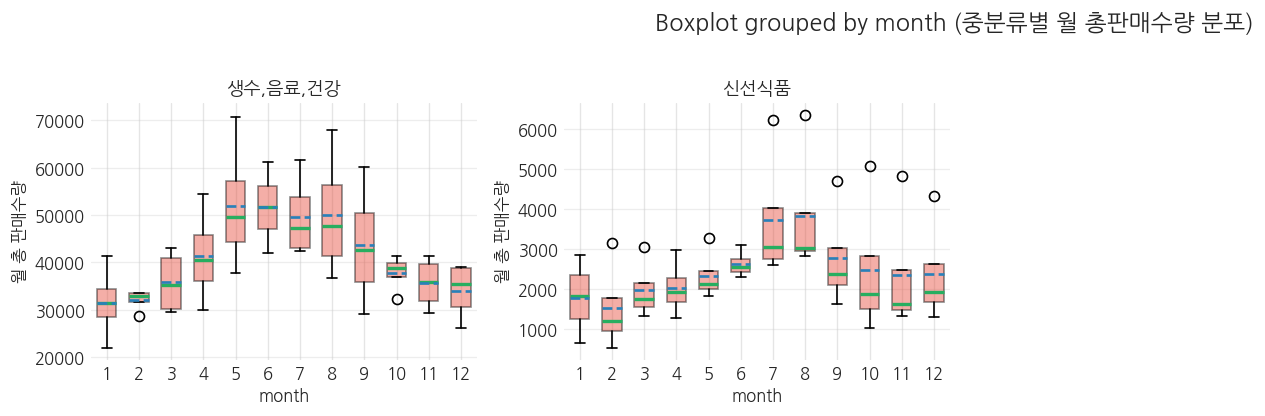

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math

# ===== 옵션 =====
END_DATE = '2024-12-31'   # 24년 12월까지
TOP_K = None              # 상위 N개 중분류만 그릴 때 정수, 전체면 None
FIG_W, COLS = 16, 4
Y_CLIP_PCTL = 99.5        # 축 상단을 이 분위수로 클립(이상치 완화)
SHOW_MEAN = True          # 박스플롯에 평균 표시

df = df_machul_final.copy()

# 1) 날짜열 확보
if '판매일' in df.columns:
    df['판매일'] = pd.to_datetime(df['판매일'])
else:
    for c in ['연도','월','주차']:
        if c not in df.columns:
            raise ValueError(f"'{c}' 컬럼이 필요합니다.")
    base = pd.to_datetime(dict(year=df['연도'].astype(int),
                               month=df['월'].astype(int), day=1))
    df['판매일'] = base + pd.to_timedelta((df['주차'].astype(int)-1)*7, unit='D')

# 2) 기간 제한 + 연/월 컬럼 생성
if END_DATE:
    df = df[df['판매일'] <= pd.to_datetime(END_DATE)]
df['연도'] = df['판매일'].dt.year
df['월'] = df['판매일'].dt.month

# 3) 옵션 단위 중복 가능성 대비: 월합으로 표준화
#    (중분류-연도-월 기준 총판매량)
monthly = (df.groupby(['중분류','연도','월'], as_index=False)['판매수량']
             .sum()
             .sort_values(['중분류','연도','월']))

# 4) 상위 N개 중분류 선택(총합 기준)
if TOP_K is not None:
    top_cats = (monthly.groupby('중분류')['판매수량'].sum()
                        .sort_values(ascending=False).head(TOP_K).index)
    monthly = monthly[monthly['중분류'].isin(top_cats)]

cats = monthly['중분류'].unique().tolist()
n = len(cats)
rows = math.ceil(n / COLS)
fig_h = max(3.6, 3.2 * rows)
fig, axes = plt.subplots(rows, COLS, figsize=(FIG_W, fig_h), squeeze=False)
axes = axes.flat

for ax, cat in zip(axes, cats):
    sub = monthly[monthly['중분류'] == cat]

    # 월별(1..12)로 '연도별 월합' 값들의 리스트 만들기
    data, positions = [], []
    for m in range(1, 13):
        arr = sub.loc[sub['월'] == m, '판매수량'].values
        if arr.size > 0:   # 데이터 있는 월만 그림
            data.append(arr)
            positions.append(m)

    if not data:  # 해당 중분류에 데이터가 없으면 skip
        ax.set_visible(False)
        continue

    bp = ax.boxplot(
        data,
        positions=positions,
        widths=0.6,
        patch_artist=True,
        showfliers=True,
        showmeans=SHOW_MEAN,   # 평균도 점/선으로 표시
        meanline=True
    )

    # 약간만 스타일 만짐(색 지정 없이 투명도/선두께)
    for box in bp['boxes']:
        box.set_alpha(0.45)
    for median in bp['medians']:
        median.set_linewidth(2)
    if SHOW_MEAN:
        for ml in bp['means']:
            ml.set_linewidth(1.6)

    # 축/레이블
    ax.set_title(str(cat), fontsize=11)
    ax.set_xlabel('month')
    ax.set_ylabel('월 총 판매수량')
    ax.set_xticks(range(1, 13))
    ax.grid(True, which='both', alpha=0.35, axis='y')

    # 이상치로 축이 눌리면 상단을 분위수로 클립
    try:
        ymax = np.nanpercentile(np.concatenate(data), Y_CLIP_PCTL)
        if np.isfinite(ymax) and ymax > 0:
            ax.set_ylim(top=ymax * 1.05)
    except Exception:
        pass

# 남는 축 제거
for i in range(len(cats), rows * COLS):
    fig.delaxes(axes[i])

fig.suptitle('Boxplot grouped by month (중분류별 월 총판매수량 분포)', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


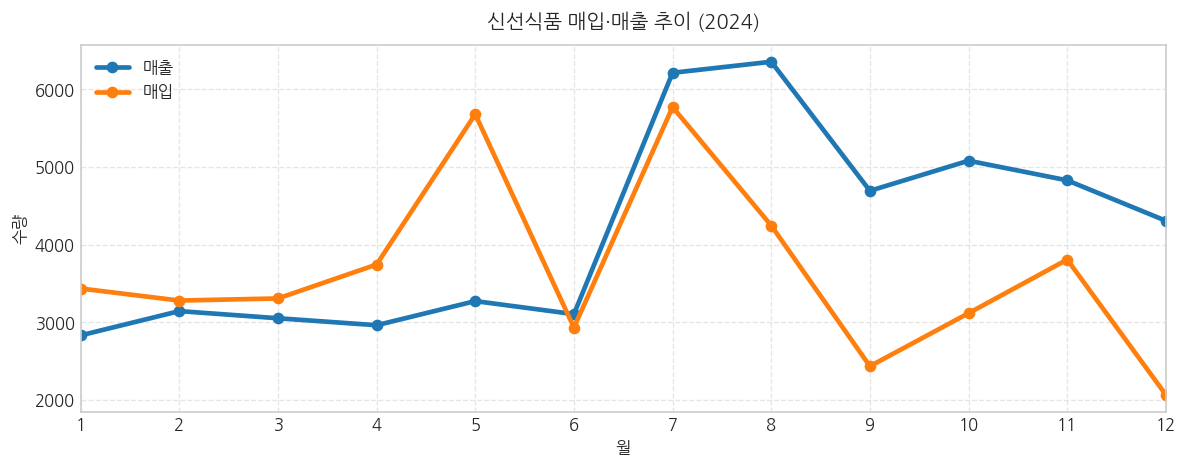

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ✅ CSV 경로 (그대로)
path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/weekly_A_final.csv"
if not os.path.exists(path):
    raise FileNotFoundError(f"파일이 존재하지 않습니다: {path}")

# ✅ 파일 읽기
df = pd.read_csv(path, encoding="utf-8", low_memory=False)


TARGET_CAT = '신선식품'
YEAR = 2024

# df가 이미 로드되어 있다고 가정 (weekly_A_final.csv)
# 필요한 컬럼 숫자화(안전)
df['연도'] = pd.to_numeric(df['연도'], errors='coerce').astype('Int64')
df['월']   = pd.to_numeric(df['월'], errors='coerce').astype('Int64')
df['순매출수량'] = pd.to_numeric(df['순매출수량'], errors='coerce').fillna(0)
df['순매입수량'] = pd.to_numeric(df['순매입수량'], errors='coerce').fillna(0)

# 2024 & 신선식품 필터
sub = df[(df['중분류'] == TARGET_CAT) & (df['연도'] == YEAR)].copy()

# 월별 집계(같은 달에 여러 행 있으면 합계)
m = (sub.groupby('월', as_index=False)
        .agg(월별_매출=('순매출수량', 'sum'),
             월별_매입=('순매입수량', 'sum')))

# 1~12월 누락 채움(0)
XTICKS = np.arange(1, 13)
m = (m.set_index('월')
       .reindex(XTICKS)
       .fillna(0)
       .rename_axis('월')
       .reset_index())

# ---- Plot ----
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(m['월'], m['월별_매출'], linewidth=2.8, marker='o', label='매출')
ax.plot(m['월'], m['월별_매입'], linewidth=2.8, marker='o', label='매입')

ax.set_title(f'{TARGET_CAT} 매입·매출 추이 ({YEAR})', pad=10)
ax.set_xlabel('월'); ax.set_ylabel('수량')
ax.set_xticks(XTICKS); ax.set_xlim(1, 12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


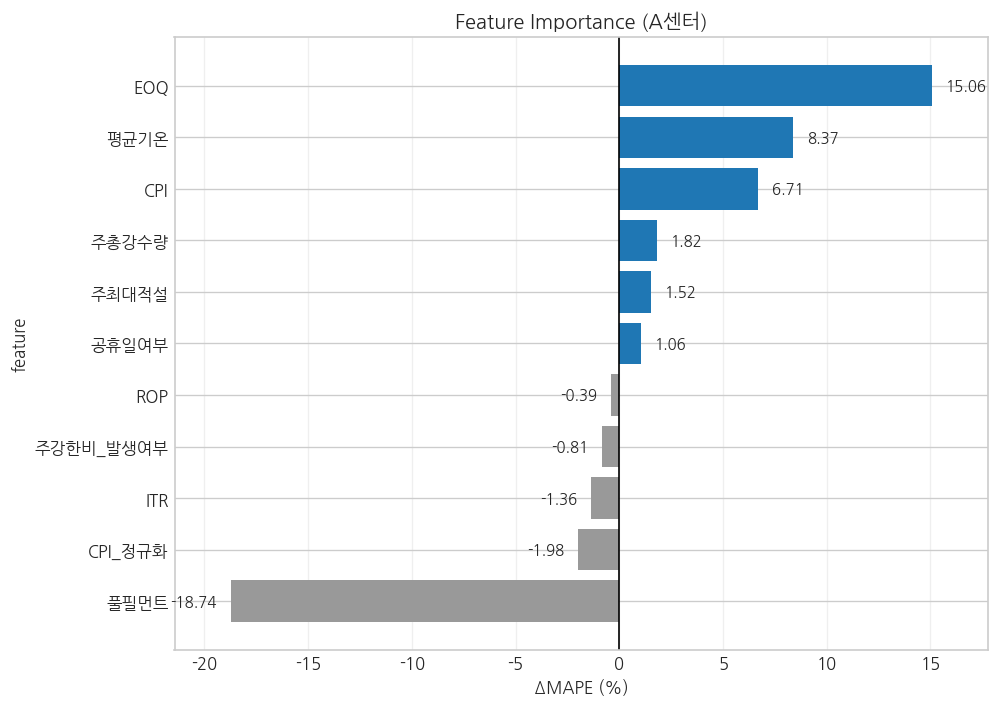

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

imp = {
    "EOQ": 15.06, "평균기온": 8.37, "CPI": 6.71, "주총강수량": 1.82, "주최대적설": 1.52,
    "공휴일여부": 1.06, "ROP": -0.39, "주강한비_발생여부": -0.81, "ITR": -1.36,
    "CPI_정규화": -1.98, "풀필먼트": -18.74,
}

df = pd.Series(imp, name="ΔMAPE(%)").sort_values().to_frame()
df["feature"] = df.index

# ... 위 코드 동일 ...

fig, ax = plt.subplots(figsize=(8.5, 6))

# 음수는 회색, 양수는 기본색(C0)
vals = df["ΔMAPE(%)"].values
colors = ['0.6' if v < 0 else 'C0' for v in vals]  # '0.6'은 회색 톤

bars = ax.barh(df["feature"], df["ΔMAPE(%)"], color=colors)

# 0 기준선
ax.axvline(0, color="black", linewidth=1)

# === 여백/라벨 겹침 방지 포인트 ===
xmin, xmax = df["ΔMAPE(%)"].min(), df["ΔMAPE(%)"].max()
pad = 0.08 * (xmax - xmin if xmax != xmin else 1)
ax.set_xlim(xmin - pad, xmax + pad)

plt.subplots_adjust(left=0.28)

# 값 라벨
for y, v in zip(df["feature"], df["ΔMAPE(%)"]):
    if v >= 0:
        ax.text(v + pad*0.25, y, f"{v:.2f}", va="center", ha="left",
                fontsize=9, clip_on=False)
    else:
        ax.text(v - pad*0.25, y, f"{v:.2f}", va="center", ha="right",
                fontsize=9, clip_on=False)

ax.set_title("Feature Importance (A센터)")
ax.set_xlabel("ΔMAPE (%)")
ax.set_ylabel("feature")
ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


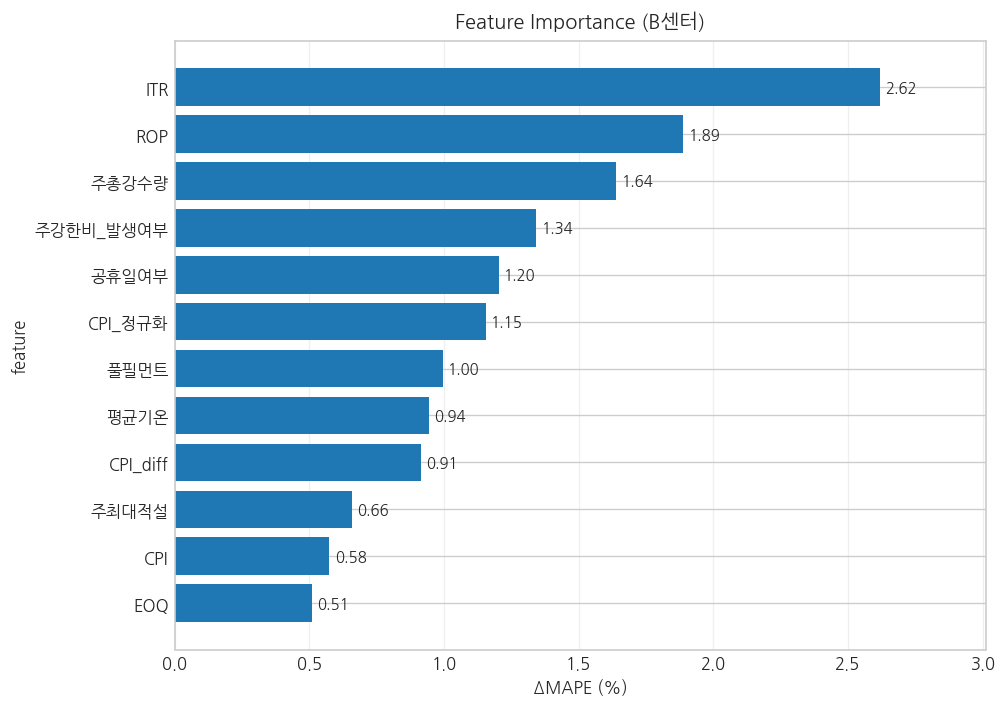

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ΔMAPE(%) 값 (이미지 기준)
imp = {
    "ITR": 2.619666,
    "ROP": 1.888158,
    "주총강수량": 1.639068,
    "주강한비_발생여부": 1.343041,
    "공휴일여부": 1.203322,
    "CPI_정규화": 1.154401,
    "풀필먼트": 0.995058,
    "평균기온": 0.944399,
    "CPI_diff": 0.914140,
    "주최대적설": 0.659270,
    "CPI": 0.575308,
    "EOQ": 0.508725,
}

# 데이터프레임 (내림차순 정렬)
df = pd.Series(imp, name="ΔMAPE(%)").sort_values(ascending=True).to_frame()
df["feature"] = df.index

# 그리기
fig, ax = plt.subplots(figsize=(8.5, 6))
bars = ax.barh(df["feature"], df["ΔMAPE(%)"])  # 단색 막대

# x축 범위 & 격자
xmax = df["ΔMAPE(%)"].max()
pad = xmax * 0.15
ax.set_xlim(0, xmax + pad)
ax.grid(axis="x", alpha=0.3)

# 값 라벨(막대 끝 바깥쪽)
for y, v in zip(df["feature"], df["ΔMAPE(%)"]):
    ax.text(v + pad*0.05, y, f"{v:.2f}", va="center", ha="left", fontsize=9)

ax.set_title("Feature Importance (B센터)", pad=8)
ax.set_xlabel("ΔMAPE (%)")
ax.set_ylabel("feature")

# 왼쪽 라벨 겹침 방지
plt.subplots_adjust(left=0.28)
plt.tight_layout()
plt.show()
